In [ ]:
pip install matplotlib seaborn wordcloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#Lectura de Comentarios
coments= pd.read_excel('COMENTARIOS PUBLICACIONES VF.xlsx')
print(coments.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                                Link          author  \
0  https://www.instagram.com/p/DAj76PKMeOE/c/1785...      correodebu   
1  https://www.instagram.com/p/DAj76PKMeOE/c/1804...  carolaalvarezv   
2  https://www.instagram.com/p/DAj76PKMeOE/c/1806...    oscargon2022   
3  https://www.instagram.com/p/DAj76PKMeOE/c/1800...    clubcolombia   
4  https://www.instagram.com/p/DAj76PKMeOE/c/1802...    clubcolombia   

                comment                date     source  test  
0                    🔥👏 2024-10-01 00:47:50  instagram     0  
1                🙌🙌🙌🙌❤️ 2024-10-01 01:33:14  instagram     0  
2            👍👍👍👍👍🍻🍻🍻🍻🍻 2024-10-02 19:54:14  instagram     0  
3      @correodebu, 🍻🌾. 2024-10-04 13:51:27  instagram     0  
4  @carolaalvarezv, 🌾✨. 2024-10-04 13:51:42  instagram     0  


In [ ]:
#tipo de dato de cada columna de comments
print(coments.dtypes)

Link               object
author             object
comment            object
date       datetime64[ns]
source             object
test                int64
dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
coments.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(83741, 6)

In [ ]:
#Lectura de Post
post= pd.read_excel('CONSOLIDADO PUBLICACIONES VF.xlsx')
print(post.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


       account_name       date  \
0  bavaria_colombia 2024-10-12   
1  bavaria_colombia 2024-10-11   
2  bavaria_colombia 2024-10-11   
3  bavaria_colombia 2024-10-11   
4  bavaria_colombia 2024-10-10   

                                             content  \
0  🌞🏖️ En este fin de semana festivo recuerda ser...   
1   #ValeLaPenaLeer 🇨🇴 | Andrés Ospina - @af_ospi...   
2  🍻🎉👭¡Cerveza, amigas y muchas risas! Recuerda e...   
3  🍻Hoy nuestro brindis va por Andrés Ospina, dir...   
4  ¡Así vivimos la semana pasada la experiencia #...   

                                                link  likes     source  
0           https://www.instagram.com/p/DBBssgYpnVJ/     72  instagram  
1  https://www.instagram.com/p/DBADbRKScYe/?img_i...    711  instagram  
2           https://www.instagram.com/p/DA_-1URJxxD/     59  instagram  
3           https://www.instagram.com/p/DA_dKbjp8Jf/    475  instagram  
4           https://www.instagram.com/p/DA91MIxpe39/     65  instagram  


In [ ]:
#tipo de dato de cada columna de comments
print(post.dtypes)

account_name            object
date            datetime64[ns]
content                 object
link                    object
likes                    int64
source                  object
dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
post.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2623, 6)

In [ ]:
#Eliminar arrobas cuando necesario
post['account_name'] = post['account_name'].str.replace('@', '', regex=False)
coments['author'] = coments['author'].str.replace('@', '', regex=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Eliminar los usuario (@xxxxxxxx) de la columna 'comment'
coments['comment'] = coments['comment'].str.replace(r'@\w+', '', regex=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Crear la nueva base de datos eliminando los autocomentarios de las cuentas de la compañia
new_coments = coments[~coments['author'].isin(['BAVARIA_OFICIAL', 'CervezaAguila', 'CervezaPoker', 'Club_Colombia', 'bavaria_colombia', 'cervezaaguila', 'cervezapoker', 'clubcolombia'])]

# Imprimir la nueva base de datos
print(new_coments.head())

                                                Link          author  \
0  https://www.instagram.com/p/DAj76PKMeOE/c/1785...      correodebu   
1  https://www.instagram.com/p/DAj76PKMeOE/c/1804...  carolaalvarezv   
2  https://www.instagram.com/p/DAj76PKMeOE/c/1806...    oscargon2022   
6  https://www.instagram.com/p/DAZ2Fi9MYtU/c/1802...      correodebu   
7  https://www.instagram.com/p/DAZ2Fi9MYtU/c/1818...       andres66m   

                         comment                date     source  test  
0                             🔥👏 2024-10-01 00:47:50  instagram     0  
1                         🙌🙌🙌🙌❤️ 2024-10-01 01:33:14  instagram     0  
2                     👍👍👍👍👍🍻🍻🍻🍻🍻 2024-10-02 19:54:14  instagram     0  
6                             🔥🔥 2024-09-27 03:08:37  instagram     0  
7  Y en medellín nada que está 😂 2024-09-27 05:06:26  instagram     0  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
new_coments.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(67092, 6)

In [ ]:
# Crear la nueva base de datos de post filtrando solo las que son de las cuentas de la compañía
new_post = post[post['account_name'].isin(['BAVARIA_OFICIAL', 'CervezaAguila', 'CervezaPoker', 'Club_Colombia', 'bavaria_colombia', 'cervezaaguila', 'cervezapoker', 'clubcolombia'])]

# Imprimir la nueva base de datos
print(new_post.head())
new_post.shape

       account_name       date  \
0  bavaria_colombia 2024-10-12   
1  bavaria_colombia 2024-10-11   
2  bavaria_colombia 2024-10-11   
3  bavaria_colombia 2024-10-11   
4  bavaria_colombia 2024-10-10   

                                             content  \
0  🌞🏖️ En este fin de semana festivo recuerda ser...   
1   #ValeLaPenaLeer 🇨🇴 | Andrés Ospina - @af_ospi...   
2  🍻🎉👭¡Cerveza, amigas y muchas risas! Recuerda e...   
3  🍻Hoy nuestro brindis va por Andrés Ospina, dir...   
4  ¡Así vivimos la semana pasada la experiencia #...   

                                                link  likes     source  
0           https://www.instagram.com/p/DBBssgYpnVJ/     72  instagram  
1  https://www.instagram.com/p/DBADbRKScYe/?img_i...    711  instagram  
2           https://www.instagram.com/p/DA_-1URJxxD/     59  instagram  
3           https://www.instagram.com/p/DA_dKbjp8Jf/    475  instagram  
4           https://www.instagram.com/p/DA91MIxpe39/     65  instagram  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2609, 6)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


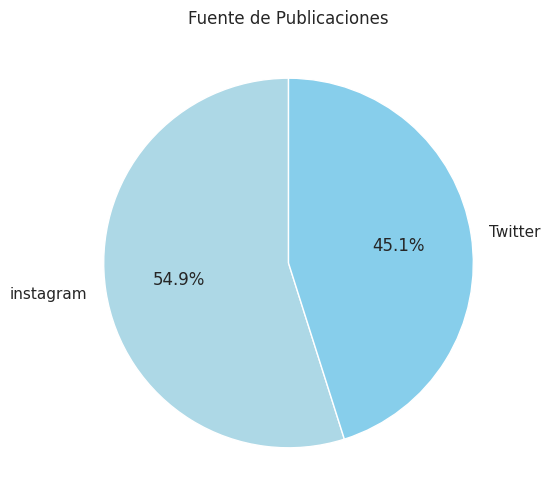

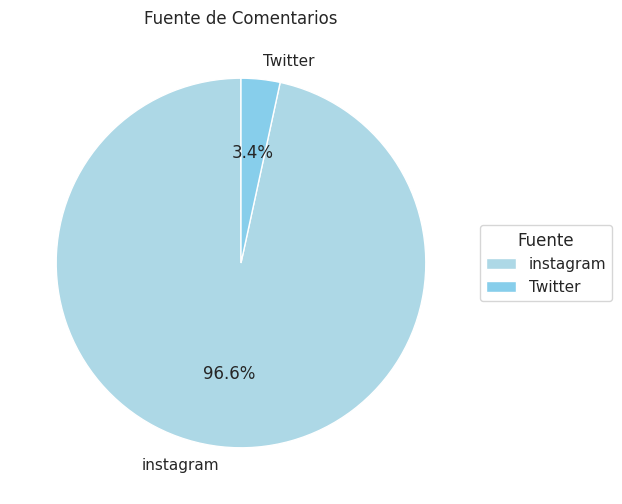

In [ ]:
# prompt: grafica un diagrama de torta para el source de la base de new_post y otro para el source de la base de new_coments en escala de azules

import matplotlib.pyplot as plt

# Diagrama de torta para la fuente de new_post
plt.figure(figsize=(8, 6))
source_counts_post = new_post['source'].value_counts()
plt.pie(source_counts_post, labels=source_counts_post.index, autopct='%1.1f%%', startangle=90, colors=['#ADD8E6', '#87CEEB', '#6495ED', '#4682B4', '#0000FF'])
plt.title('Fuente de Publicaciones')
plt.show()

# Diagrama de torta para la fuente de new_coments
plt.figure(figsize=(8, 6))
source_counts_coments = new_coments['source'].value_counts()
plt.pie(source_counts_coments, labels=source_counts_coments.index, autopct='%1.1f%%', startangle=90, colors=['#ADD8E6', '#87CEEB', '#6495ED', '#4682B4', '#0000FF'])
plt.title('Fuente de Comentarios')
plt.legend(title="Fuente", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


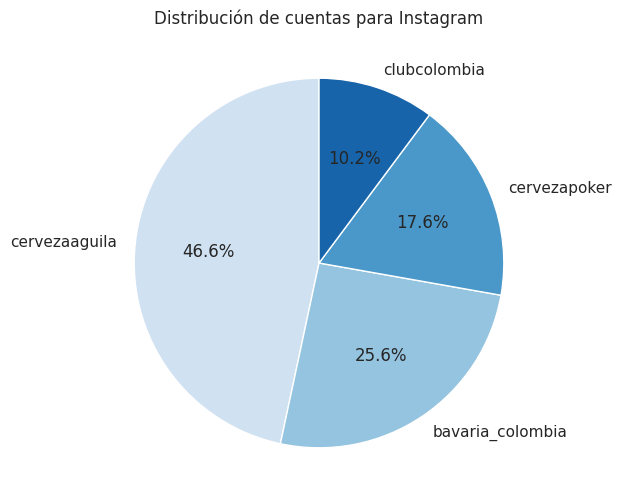

In [ ]:
# prompt: grafica un diagrama de torta para el account_name de la base de new_post para el soruce instagram en escala de azules

# Filtrar por la fuente 'instagram'
new_post_instagram = new_post[new_post['source'] == 'instagram']

# Contar la frecuencia de cada account_name para Instagram
account_name_counts = new_post_instagram['account_name'].value_counts()

# Crear el diagrama de torta
plt.figure(figsize=(8, 6))
plt.pie(account_name_counts, labels=account_name_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Blues", len(account_name_counts)))
plt.title('Distribución de cuentas para Instagram')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


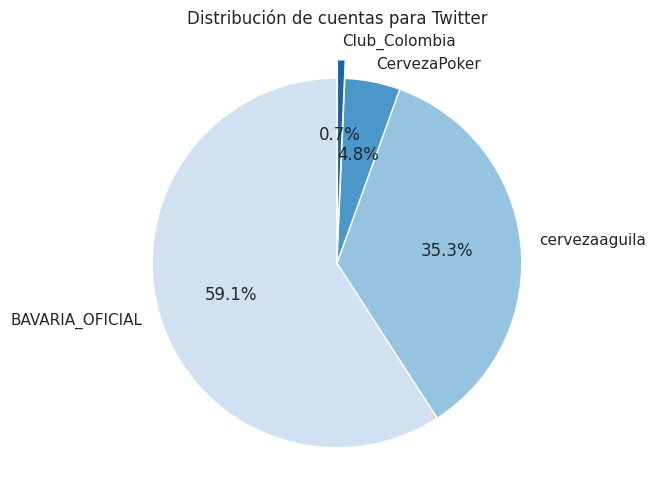

In [ ]:
# prompt: grafica un diagrama de torta para el account_name de la base de new_post para el source Twitter en escala de azules con leyenda y ubicando el valor de club colombia por fuera

# Filtrar por la fuente 'Twitter'
new_post_twitter = new_post[new_post['source'] == 'Twitter']

# Contar la frecuencia de cada account_name para Twitter
account_name_counts_twitter = new_post_twitter['account_name'].value_counts()

# Crear el diagrama de torta
plt.figure(figsize=(8, 6))

# Definir colores en escala de azules
colors = sns.color_palette("Blues", len(account_name_counts_twitter))

# Extraer el valor de Club Colombia
club_colombia_value = account_name_counts_twitter.get('Club_Colombia', 0)

# Crear la lista de etiquetas y valores para el diagrama
labels = account_name_counts_twitter.index.tolist()
sizes = account_name_counts_twitter.values.tolist()

# Separar el valor de Club Colombia del resto de los valores
explode = [0] * len(labels)
if 'Club_Colombia' in labels:
  explode[labels.index('Club_Colombia')] = 0.1

# Generar el diagrama de torta con la separación de Club Colombia
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)

# Ajustar el título
plt.title('Distribución de cuentas para Twitter')

# Mostrar el diagrama
plt.show()

In [ ]:
# Crear la columna 'conteo_post' con valor 1 para cada fila
new_post['conteo_post'] = 1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-195-267a2294f844>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_post['conteo_post'] = 1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-196-965301b5cd43>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_post_instagram['date'] = pd.to_datetime(new_post_instagram['date'])
<ipython-input-196-965301b5cd43>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  new_post_instagram_grouped = new_post_instagram.groupby([pd.Grouper(key='date', freq='M'), 'account_name'])['

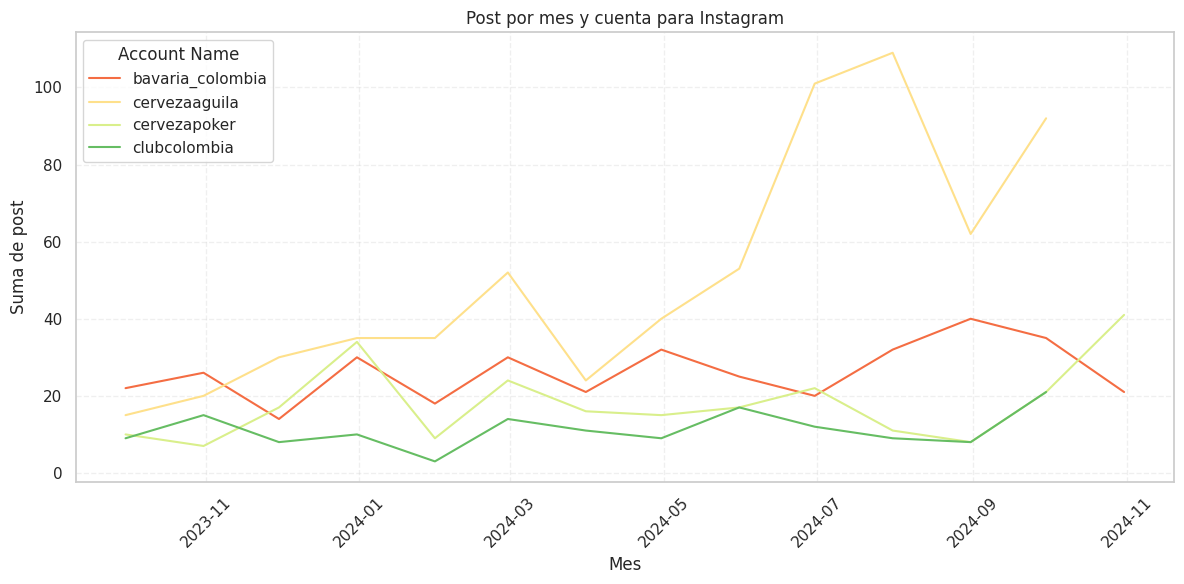

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar por la fuente 'instagram'
new_post_instagram = new_post[new_post['source'] == 'instagram']

# Convertir la columna 'date' a tipo datetime si no lo está ya
new_post_instagram['date'] = pd.to_datetime(new_post_instagram['date'])

# Agrupar por mes y account_name y sumar los posts
new_post_instagram_grouped = new_post_instagram.groupby([pd.Grouper(key='date', freq='M'), 'account_name'])['conteo_post'].sum().unstack()

# Crear la gráfica de línea
plt.figure(figsize=(12, 6))
for account_name in new_post_instagram_grouped.columns:
    plt.plot(new_post_instagram_grouped.index,
             new_post_instagram_grouped[account_name],
             label=account_name,
             color=sns.color_palette("RdYlGn", len(new_post_instagram_grouped.columns))[list(new_post_instagram_grouped.columns).index(account_name)])

plt.xlabel('Mes')
plt.ylabel('Suma de post')
plt.title('Post por mes y cuenta para Instagram')
plt.legend(title='Account Name')

# Ajustar la grilla para que sea más suave
plt.grid(True, linestyle='--', alpha=0.3)  # Hacer la grilla más suave
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-197-e0295483a938>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  new_post_twitter_grouped = new_post_twitter.groupby([pd.Grouper(key='date', freq='M'), 'account_name'])['conteo_post'].sum().unstack()


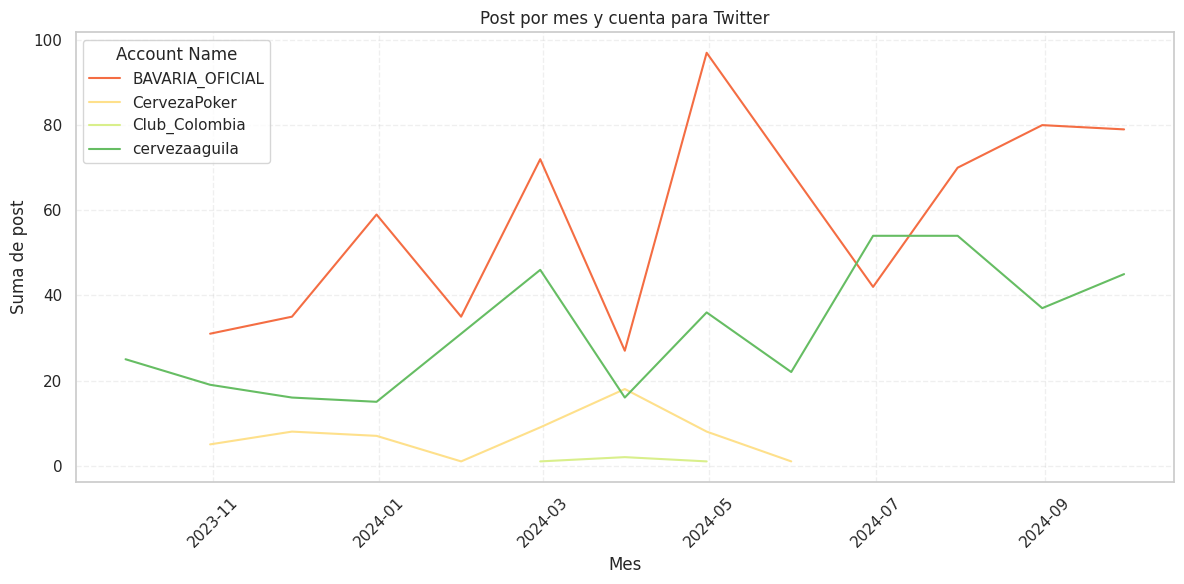

In [ ]:
# prompt: grafico de linea de suma de conteo_post por mes (date) para Twiteer

# Filtrar por la fuente 'Twitter'
new_post_twitter = new_post[new_post['source'] == 'Twitter']

# Convertir la columna 'date' a tipo datetime si no lo está ya
#new_post_twitter['date'] = pd.to_datetime(new_post_twitter['date'])

# Agrupar por mes y account_name y sumar los posts
new_post_twitter_grouped = new_post_twitter.groupby([pd.Grouper(key='date', freq='M'), 'account_name'])['conteo_post'].sum().unstack()

# Crear la gráfica de línea
plt.figure(figsize=(12, 6))
for account_name in new_post_twitter_grouped.columns:
  plt.plot(new_post_twitter_grouped.index, new_post_twitter_grouped[account_name], label=account_name, color=sns.color_palette("RdYlGn", len(new_post_twitter_grouped.columns))[list(new_post_twitter_grouped.columns).index(account_name)])

plt.xlabel('Mes')
plt.ylabel('Suma de post')
plt.title('Post por mes y cuenta para Twitter')
plt.legend(title='Account Name')
plt.grid(True, linestyle='--', alpha=0.3)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


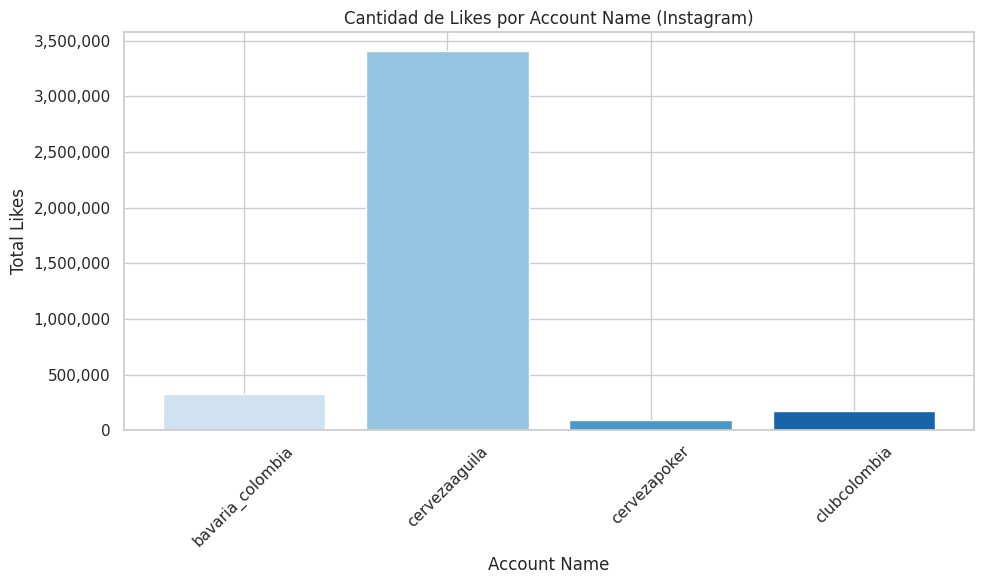

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Filtrar por la fuente 'instagram'
new_post_instagram = new_post[new_post['source'] == 'instagram']

# Agrupar por account_name y sumar los likes
likes_by_account = new_post_instagram.groupby('account_name')['likes'].sum()

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))

# Usar la paleta RdYlBu
colors = sns.color_palette("Blues", len(likes_by_account))
plt.bar(likes_by_account.index, likes_by_account.values, color=colors)

# Etiquetas y título
plt.xlabel('Account Name')
plt.ylabel('Total Likes')
plt.title('Cantidad de Likes por Account Name (Instagram)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para una mejor legibilidad

# Formatear el eje Y con puntos de miles
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


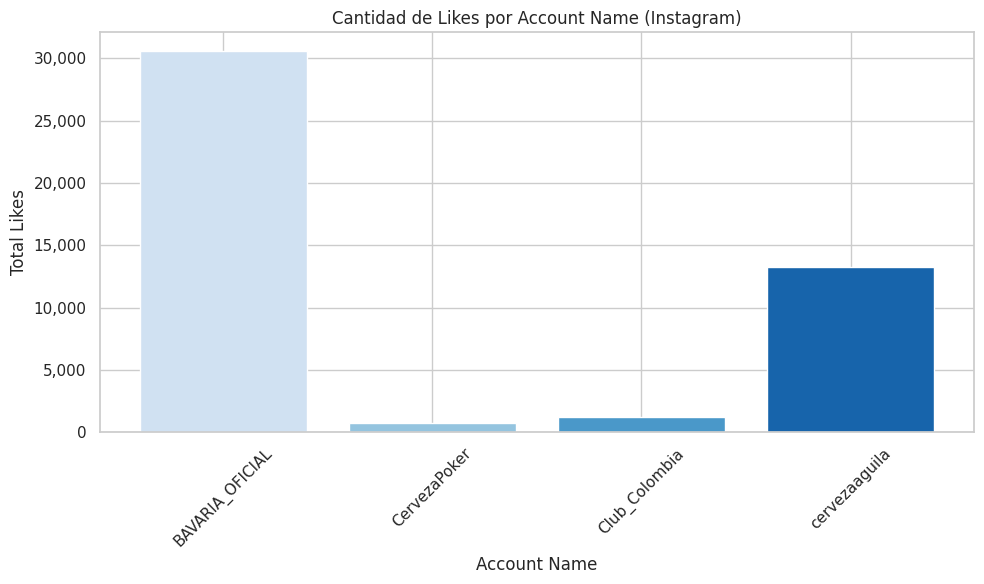

In [ ]:

# Filtrar por la fuente 'twitter'
new_post_instagram = new_post[new_post['source'] == 'Twitter']

# Agrupar por account_name y sumar los likes
likes_by_account = new_post_instagram.groupby('account_name')['likes'].sum()

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))

# Usar la paleta RdYlBu
colors = sns.color_palette("Blues", len(likes_by_account))
plt.bar(likes_by_account.index, likes_by_account.values, color=colors)

# Etiquetas y título
plt.xlabel('Account Name')
plt.ylabel('Total Likes')
plt.title('Cantidad de Likes por Account Name (Instagram)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para una mejor legibilidad

# Formatear el eje Y con puntos de miles
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


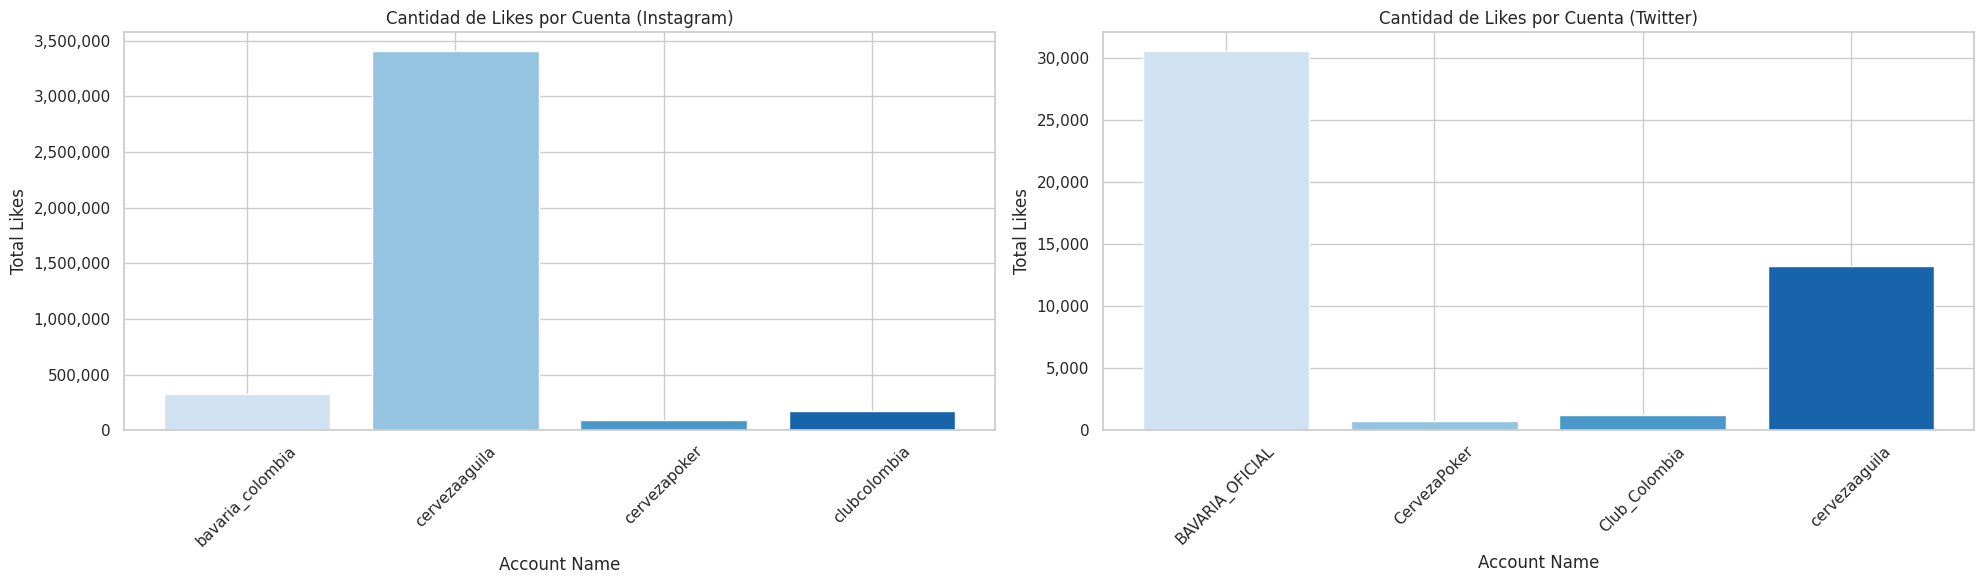

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Filtrar por la fuente 'instagram'
new_post_instagram = new_post[new_post['source'] == 'instagram']
# Agrupar por account_name y sumar los likes
likes_by_account_instagram = new_post_instagram.groupby('account_name')['likes'].sum()

# Filtrar por la fuente 'twitter'
new_post_twitter = new_post[new_post['source'] == 'Twitter']
# Agrupar por account_name y sumar los likes
likes_by_account_twitter = new_post_twitter.groupby('account_name')['likes'].sum()

# Crear un lienzo con dos gráficos en una fila
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Gráfico de Instagram
colors_instagram = sns.color_palette("Blues", len(likes_by_account_instagram))
axes[0].bar(likes_by_account_instagram.index, likes_by_account_instagram.values, color=colors_instagram)
axes[0].set_xlabel('Account Name')
axes[0].set_ylabel('Total Likes')
axes[0].set_title('Cantidad de Likes por Cuenta (Instagram)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))  # Formatear eje Y

# Gráfico de Twitter
colors_twitter = sns.color_palette("Blues", len(likes_by_account_twitter))
axes[1].bar(likes_by_account_twitter.index, likes_by_account_twitter.values, color=colors_twitter)
axes[1].set_xlabel('Account Name')
axes[1].set_ylabel('Total Likes')
axes[1].set_title('Cantidad de Likes por Cuenta (Twitter)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))  # Formatear eje Y

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


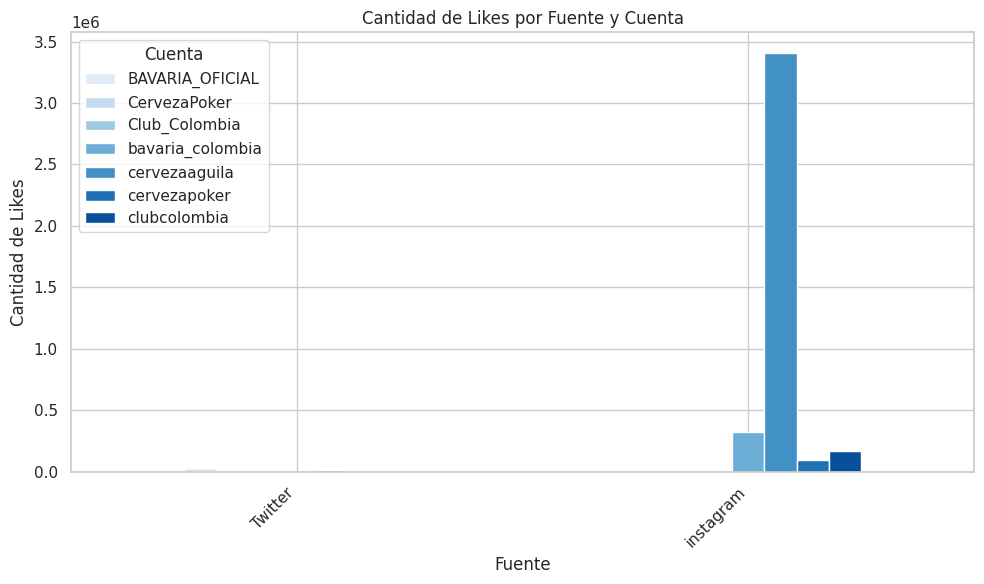

In [ ]:
# prompt: grafica cantidad de likes de new_post por surce y cuenta en barras agrupadas en escala de azules

import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar los datos por 'source' y 'account_name', y sumar los 'likes'
likes_by_source_account = new_post.groupby(['source', 'account_name'])['likes'].sum().unstack()

# Crear un gráfico de barras agrupadas
ax = likes_by_source_account.plot(kind='bar', figsize=(10, 6), color=sns.color_palette("Blues", len(likes_by_source_account.columns)))

# Configurar el título y las etiquetas de los ejes
plt.title('Cantidad de Likes por Fuente y Cuenta')
plt.xlabel('Fuente')
plt.ylabel('Cantidad de Likes')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar la leyenda
plt.legend(title='Cuenta')

# Ajustar el espaciado entre las barras
plt.tight_layout()

# Mostrar el gráfico
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-202-f63ce54443c9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_post_instagram['date'] = pd.to_datetime(new_post_instagram['date'])
<ipython-input-202-f63ce54443c9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

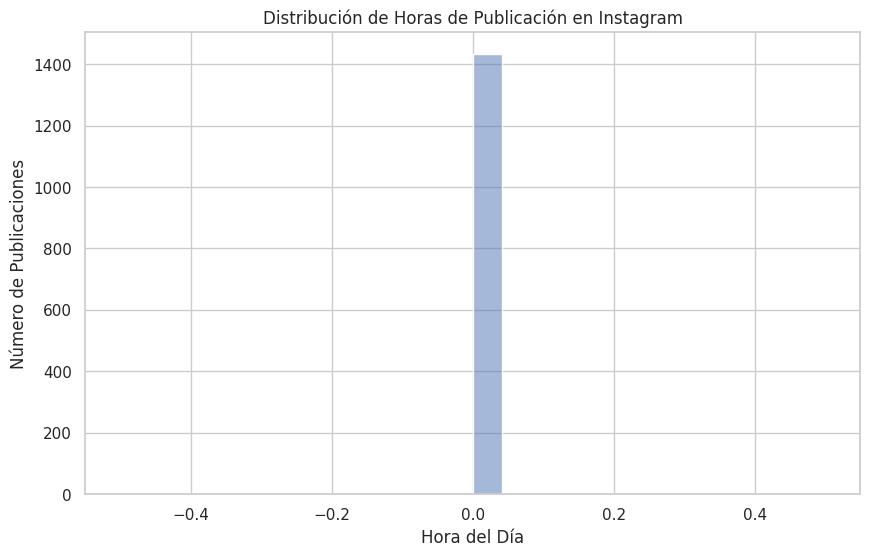

In [ ]:
# prompt: Histograma con la distribucion de horas para new_post en source instagram

# Convertir la columna 'date' a tipo datetime si no lo está ya
new_post_instagram['date'] = pd.to_datetime(new_post_instagram['date'])

# Extraer la hora de la columna 'date'
new_post_instagram['hour'] = new_post_instagram['date'].dt.hour

# Crear el histograma de la distribución de horas
plt.figure(figsize=(10, 6))
sns.histplot(new_post_instagram['hour'], bins=24, kde=True)
plt.title('Distribución de Horas de Publicación en Instagram')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Publicaciones')
plt.show()

In [ ]:
import pandas as pd
# Convertir la columna 'fecha_hora' a formato datetime
new_coments['date'] = pd.to_datetime(new_coments['date'], format='%Y-%m-%d %I:%M:%S %p')

# Restar 5 horas a la hora incorrecta
new_coments['date'] = new_coments['date'] - pd.DateOffset(hours=5)

print(new_coments)


                                                    Link          author  \
0      https://www.instagram.com/p/DAj76PKMeOE/c/1785...      correodebu   
1      https://www.instagram.com/p/DAj76PKMeOE/c/1804...  carolaalvarezv   
2      https://www.instagram.com/p/DAj76PKMeOE/c/1806...    oscargon2022   
6      https://www.instagram.com/p/DAZ2Fi9MYtU/c/1802...      correodebu   
7      https://www.instagram.com/p/DAZ2Fi9MYtU/c/1818...       andres66m   
...                                                  ...             ...   
83730  https://x.com/CervezaPoker/status/171003915938...   AdriiRolita13   
83732  https://x.com/CervezaPoker/status/171003915938...     capaternina   
83734  https://x.com/CervezaPoker/status/171003915938...  lindamafaldita   
83736  https://x.com/CervezaPoker/status/171003915938...   GallegoEdilma   
83739  https://x.com/CervezaPoker/status/170959806762...       Stephyc24   

                                                 comment                date  \
0      

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-203-3dbb2a1768c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_coments['date'] = pd.to_datetime(new_coments['date'], format='%Y-%m-%d %I:%M:%S %p')
<ipython-input-203-3dbb2a1768c3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-204-18735c2fcbe1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_coments['date'] = pd.to_datetime(new_coments['date'])
<ipython-input-204-18735c2fcbe1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

    hour  comment
0      0     1393
1      1      654
2      2      401
3      3      293
4      4      348
5      5      555
6      6     1210
7      7     1848
8      8     2203
9      9     2589
10    10     2788
11    11     3727
12    12     4353
13    13     3846
14    14     2946
15    15     3025
16    16     3565
17    17     5987
18    18     4722
19    19     5168
20    20     4421
21    21     4186
22    22     3510
23    23     2669


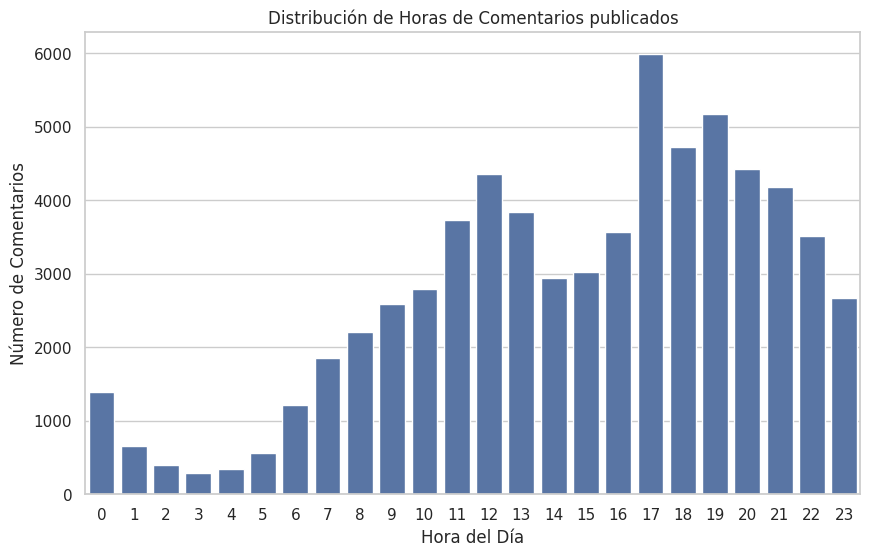

In [ ]:
# prompt: has una tabla que muestre las diferentes horas en que se publica con la base new_coments

# Convertir la columna 'date' a tipo datetime si no lo está ya
new_coments['date'] = pd.to_datetime(new_coments['date'])

# Extraer la hora de la columna 'date'
new_coments['hour'] = new_coments['date'].dt.hour

# Crear una tabla de frecuencia de las horas de publicación
hour_counts = new_coments.groupby('hour')['comment'].count().reset_index()

# Mostrar la tabla
print(hour_counts)

# Crear un gráfico de barras para visualizar la distribución de horas
plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='comment', data=hour_counts)
plt.title('Distribución de Horas de Comentarios publicados')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Comentarios')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-205-378230196a33>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_post_twitter['date'] = pd.to_datetime(new_post_twitter['date'])
<ipython-input-205-378230196a33>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

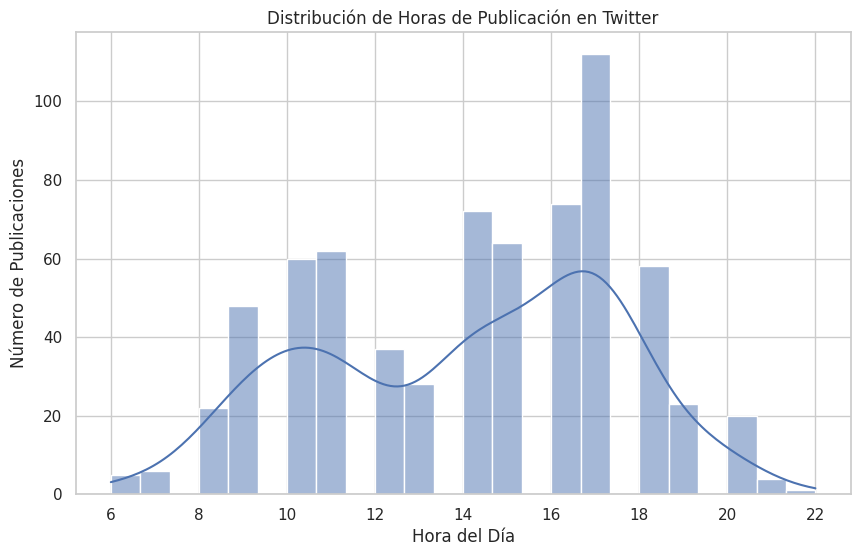

In [ ]:
# prompt: Histograma con la distribucion de horas para new_post en source Twitter sin cero

# Filtrar por la fuente 'Twitter' y eliminar las horas 0
new_post_twitter = new_post[(new_post['source'] == 'Twitter') & (new_post['date'].dt.hour != 0)]

# Convertir la columna 'date' a tipo datetime si no lo está ya
new_post_twitter['date'] = pd.to_datetime(new_post_twitter['date'])

# Extraer la hora de la columna 'date'
new_post_twitter['hour'] = new_post_twitter['date'].dt.hour

# Crear el histograma de la distribución de horas
plt.figure(figsize=(10, 6))
sns.histplot(new_post_twitter['hour'], bins=24, kde=True)
plt.title('Distribución de Horas de Publicación en Twitter')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Publicaciones')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


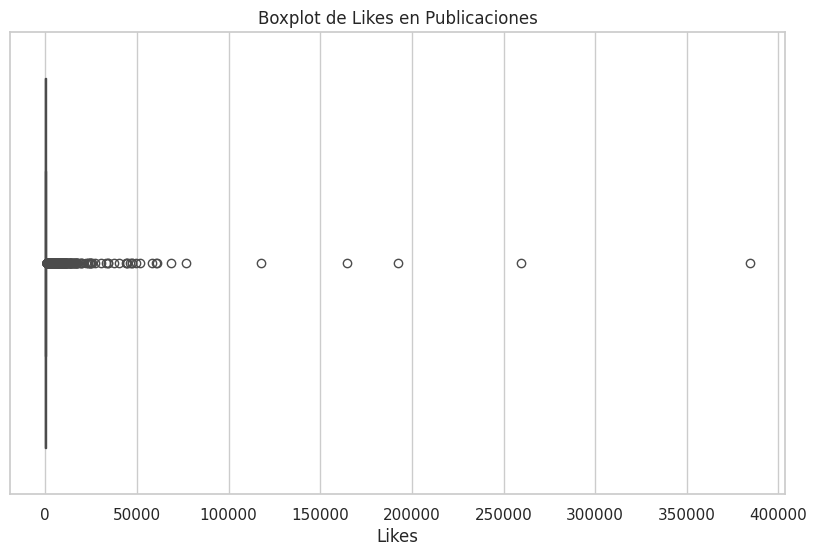

In [ ]:
# prompt: Grafica de caja y bigotes con la variable likes en new_post

# Crear un boxplot de la variable 'likes' en new_post
plt.figure(figsize=(10, 6))
sns.boxplot(x='likes', data=new_post)
plt.title('Boxplot de Likes en Publicaciones')
plt.xlabel('Likes')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


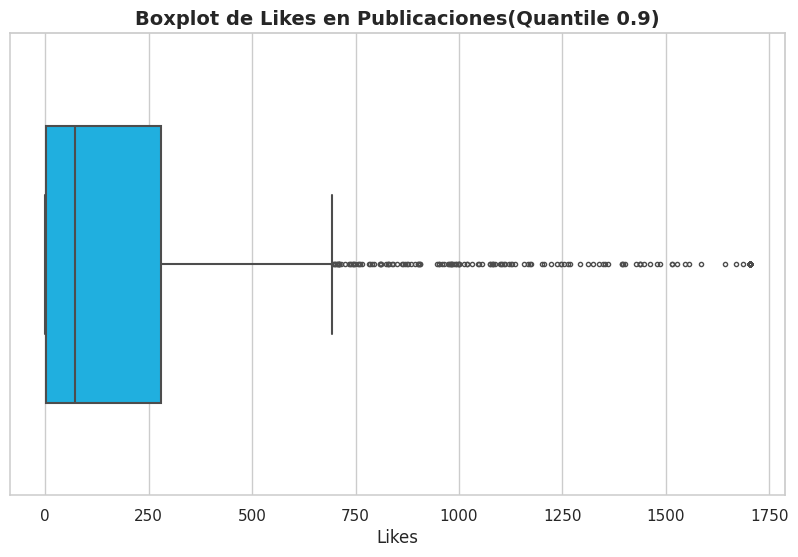

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un boxplot de la variable 'likes' en new_post, omitiendo los valores más extremos
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Estilo de fondo más claro

# Limitar el rango de 'likes' para omitir valores extremos usando `clip`
likes_clipped = new_post['likes'].clip(lower=new_post['likes'].quantile(0.05),
                                       upper=new_post['likes'].quantile(0.9))

# Crear el gráfico de caja con una paleta de color y ajuste de tamaño de valores atípicos
sns.boxplot(x=likes_clipped, color='deepskyblue', fliersize=3, linewidth=1.5, width=0.6)

# Etiquetas y título
plt.title('Boxplot de Likes en Publicaciones(Quantile 0.9)', fontsize=14, fontweight='bold')
plt.xlabel('Likes', fontsize=12)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_linewidth(1.1)
plt.gca().spines['left'].set_linewidth(1.1)

plt.show()


In [ ]:
# prompt: genera una tabla con las principales medidas de tendencia central de la columna "likes" de la base new_post y separalo por source

# Agrupar los datos por 'source' y calcular las medidas de tendencia central para 'likes'
likes_stats_by_source = new_post.groupby('source')['likes'].agg(['mean', 'median', 'std'])

# Mostrar la tabla
likes_stats_by_source


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,mean,median,std
source,,,
Twitter,38.878505,3.0,212.195391
instagram,2793.129888,218.0,15580.631538


In [ ]:
# prompt: unir base new post y new_comments mediante Link

# Unir las bases de datos new_post y new_coments mediante la columna 'Link'
merged_df = pd.merge(new_coments, new_post, left_on= "Link", right_on='link', how='left')

# Imprimir la nueva base de datos
print(merged_df.head())
merged_df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                                Link          author  \
0  https://www.instagram.com/p/DAj76PKMeOE/c/1785...      correodebu   
1  https://www.instagram.com/p/DAj76PKMeOE/c/1804...  carolaalvarezv   
2  https://www.instagram.com/p/DAj76PKMeOE/c/1806...    oscargon2022   
3  https://www.instagram.com/p/DAZ2Fi9MYtU/c/1802...      correodebu   
4  https://www.instagram.com/p/DAZ2Fi9MYtU/c/1818...       andres66m   

                         comment              date_x   source_x  test  hour  \
0                             🔥👏 2024-09-30 19:47:50  instagram     0    19   
1                         🙌🙌🙌🙌❤️ 2024-09-30 20:33:14  instagram     0    20   
2                     👍👍👍👍👍🍻🍻🍻🍻🍻 2024-10-02 14:54:14  instagram     0    14   
3                             🔥🔥 2024-09-26 22:08:37  instagram     0    22   
4  Y en medellín nada que está 😂 2024-09-27 00:06:26  instagram     0     0   

  account_name date_y content link  likes source_y  conteo_post  
0          NaN    NaT     

(68871, 14)

In [ ]:
merged_df. columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Link', 'author', 'comment', 'date_x', 'source_x', 'test', 'hour',
       'account_name', 'date_y', 'content', 'link', 'likes', 'source_y',
       'conteo_post'],
      dtype='object')

In [ ]:
# prompt: hacer un conteo de cuantas bases sale cada Link de la base new_commnets en el link de la base new_post

# Agrupar por 'link' y 'account_name' y contar la cantidad de comentarios
comment_counts = merged_df.groupby(['link', 'account_name'])['comment'].count().reset_index()

# Renombrar la columna 'comment' a 'conteo_comentarios'
comment_counts = comment_counts.rename(columns={'comment': 'conteo_comentarios'})

# Mostrar el resultado
comment_counts

# Puedes guardar el resultado en un archivo si lo deseas
# comment_counts.to_csv('conteo_comentarios_por_link_y_cuenta.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,link,account_name,conteo_comentarios
0,https://www.instagram.com/p/C-1PklZJsbe/,cervezaaguila,2
1,https://www.instagram.com/p/C-5j1-zJE9L/,cervezaaguila,3
2,https://www.instagram.com/p/C-6Gjl3pOko/,bavaria_colombia,16
3,https://www.instagram.com/p/C-6P3fhJBRp/,cervezaaguila,2
4,https://www.instagram.com/p/C-78llRJkAt/,bavaria_colombia,35
...,...,...,...
1140,https://x.com/CervezaPoker/status/177168888088...,CervezaPoker,1
1141,https://x.com/CervezaPoker/status/177489853003...,CervezaPoker,1
1142,https://x.com/CervezaPoker/status/177594719008...,CervezaPoker,1
1143,https://x.com/CervezaPoker/status/177635537983...,CervezaPoker,2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


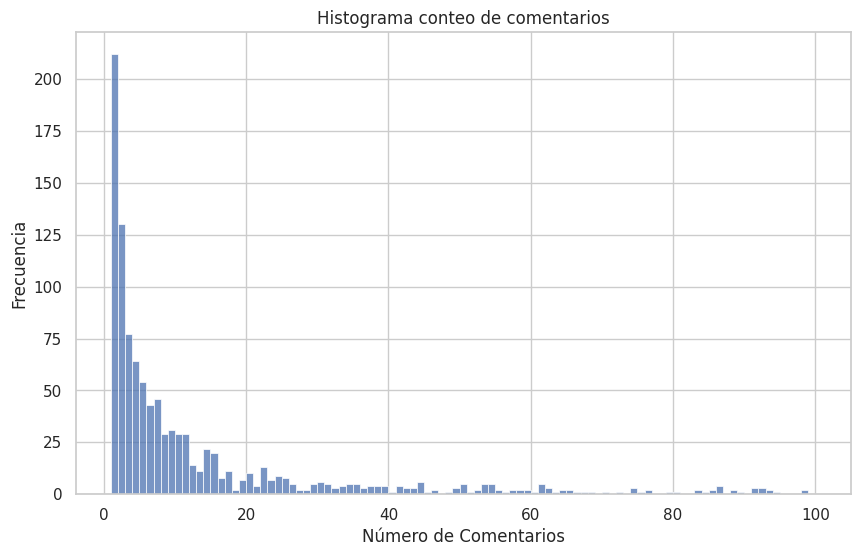

In [ ]:
# prompt: hacer un histograma con conteo_comentarios sin cero hasta100

# Crear el histograma de conteo_comentarios sin ceros hasta 100
plt.figure(figsize=(10, 6))
sns.histplot(comment_counts['conteo_comentarios'][comment_counts['conteo_comentarios'] > 0], bins=range(1, 101), kde=False)
plt.title('Histograma conteo de comentarios')
plt.xlabel('Número de Comentarios')
plt.ylabel('Frecuencia')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-213-51a326dfce26>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_coments['cantidad_palabras'] = new_coments['comment'].apply(lambda x: len(str(x).split()))


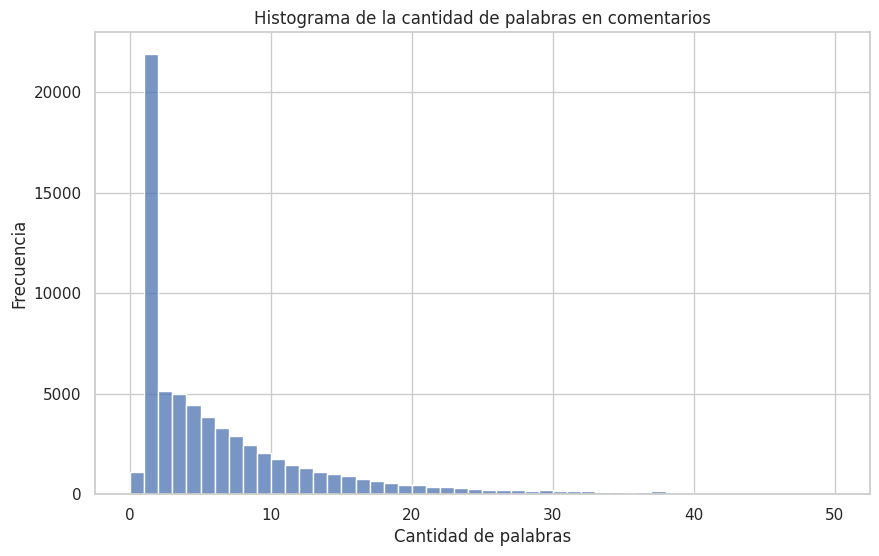

In [ ]:
# prompt: histograma con la cantidad de palabras en comment de la base new_coments

# Calcular la cantidad de palabras en cada comentario
new_coments['cantidad_palabras'] = new_coments['comment'].apply(lambda x: len(str(x).split()))

# Crear el histograma
plt.figure(figsize=(10, 6))
sns.histplot(new_coments['cantidad_palabras'], bins=range(0, 51), kde=False)  # Ajusta el rango según tus datos
plt.title('Histograma de la cantidad de palabras en comentarios')
plt.xlabel('Cantidad de palabras')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Inicializar lematizador
lemmatizer = WordNetLemmatizer()

# Stopwords en español
stop_words = set(stopwords.words('spanish'))

# Añadir tus palabras personalizadas a las stopwords
custom_stopwords = {'club', 'colombia', 'aguila', 'poker','águila','tada','si','hoy','pa','cerveza', 'ta da','jajaja','jajajaja','q'}
stop_words.update(custom_stopwords)

def limpiar_texto(texto):
    if isinstance(texto, str):  # Verificar si el texto es una cadena
        # Convertir a minúsculas
        texto = texto.lower()

        # Eliminar menciones, hashtags, y enlaces
        texto = re.sub(r'@\w+|#\w+|http\S+', '', texto)

        # Eliminar números y signos de puntuación
        texto = texto.translate(str.maketrans('', '', string.punctuation))
        texto = re.sub(r'\d+', '', texto)

        # Tokenizar el texto
        tokens = word_tokenize(texto)

        # Eliminar stopwords y lematizar
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

        # Unir palabras nuevamente
        return ' '.join(tokens)
    return ''  # Devolver una cadena vacía si el texto no es una cadena

# Aplicar la función de limpieza a la columna 'comment'
new_coments['cleaned_comment'] = new_coments['comment'].apply(limpiar_texto)

# Ver los resultados
print(new_coments[['comment', 'cleaned_comment']].head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                         comment cleaned_comment
0                             🔥👏              🔥👏
1                         🙌🙌🙌🙌❤️          🙌🙌🙌🙌❤️
2                     👍👍👍👍👍🍻🍻🍻🍻🍻      👍👍👍👍👍🍻🍻🍻🍻🍻
6                             🔥🔥              🔥🔥
7  Y en medellín nada que está 😂      medellín 😂


<ipython-input-215-0d86f67d9e80>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_coments['cleaned_comment'] = new_coments['comment'].apply(limpiar_texto)


In [ ]:
# Reemplazar valores nulos con una cadena vacía
new_coments['comment'] = new_coments['comment'].fillna('')

# Aplicar la función de limpieza
new_coments['cleaned_comment'] = new_coments['comment'].apply(limpiar_texto)

# Ver los resultados
print(new_coments[['comment', 'cleaned_comment']].head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-216-594bac82e2d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_coments['comment'] = new_coments['comment'].fillna('')


                         comment cleaned_comment
0                             🔥👏              🔥👏
1                         🙌🙌🙌🙌❤️          🙌🙌🙌🙌❤️
2                     👍👍👍👍👍🍻🍻🍻🍻🍻      👍👍👍👍👍🍻🍻🍻🍻🍻
6                             🔥🔥              🔥🔥
7  Y en medellín nada que está 😂      medellín 😂


<ipython-input-216-594bac82e2d6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_coments['cleaned_comment'] = new_coments['comment'].apply(limpiar_texto)


In [ ]:
from collections import Counter

# Número de palabras por comentario
new_coments['word_count'] = new_coments['cleaned_comment'].apply(lambda x: len(x.split()))

# Longitud promedio de los comentarios
longitud_promedio = new_coments['word_count'].mean()

# Palabras más frecuentes
all_words = ' '.join(new_coments['cleaned_comment']).split()
palabras_frecuentes = Counter(all_words).most_common(10)

# Imprimir resultados
print(f'Longitud promedio de los comentarios: {longitud_promedio}')
print('Palabras más frecuentes:', palabras_frecuentes)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-217-6bebea72cb7e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_coments['word_count'] = new_coments['cleaned_comment'].apply(lambda x: len(x.split()))


Longitud promedio de los comentarios: 3.846494365945269
Palabras más frecuentes: [('vamos', 2070), ('🇨🇴', 1671), ('mejor', 1621), ('quiero', 1494), ('🔥', 1470), ('amo', 1461), ('😂', 1299), ('predicción', 1189), ('gracias', 1130), ('❤️', 1102)]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


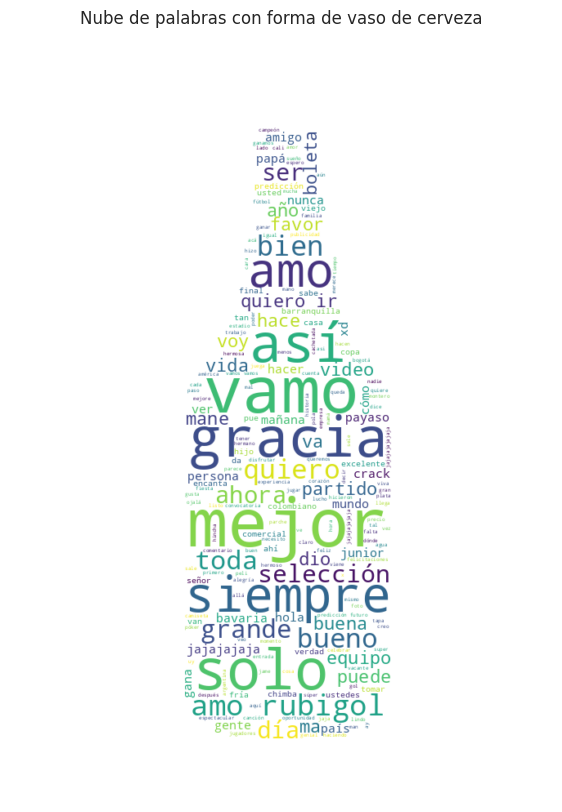

In [ ]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Cargar los datos de la columna 'cleaned_comment'
all_words = ' '.join(new_coments['cleaned_comment'])

# Ruta local de la imagen descargada
beer_mask = np.array(Image.open('/content/drive/MyDrive/Proyecto de grado/cervezax3.png'))  # Asegúrate de actualizar esta ruta

# Crear la nube de palabras con la máscara
wordcloud = WordCloud(width=800, height=400, background_color='white', mask=beer_mask, contour_color='orange').generate(all_words)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras con forma de vaso de cerveza')
plt.show()

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import re
import string

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Inicializar lematizador
lemmatizer = WordNetLemmatizer()

# Stopwords en español
stop_words = set(stopwords.words('spanish'))

# Añadir tus palabras personalizadas a las stopwords
custom_stopwords = {'club', 'colombia', 'bavaria', 'aguila', 'poker', 'águila', 'tada', 'si', 'hoy', 'pa', 'cerveza', 'ta da', 'jajaja', 'jajajaja', 'q', 'xd', 'xd', 'xd', 'XD'}
stop_words.update(custom_stopwords)

# Función para mapear el POS-tag de NLTK a uno que WordNetLemmatizer entienda
def map_pos_to_wordnet(pos_tag):
    if pos_tag.startswith('V'):  # Verbos
        return 'v'
    elif pos_tag.startswith('N'):  # Sustantivos
        return 'n'
    elif pos_tag.startswith('J'):  # Adjetivos
        return 'a'
    else:  # Otros (generalmente sustantivos)
        return 'n'

# Función de limpieza
def limpiar_texto(texto):
    if isinstance(texto, str):  # Verificar si el texto es una cadena
        # Convertir a minúsculas
        texto = texto.lower()

        # Eliminar menciones, hashtags, y enlaces
        texto = re.sub(r'@\w+|#\w+|http\S+', '', texto)

        # Eliminar números y signos de puntuación
        texto = texto.translate(str.maketrans('', '', string.punctuation + '¡¿“’”'))
        texto = re.sub(r'\d+', '', texto)

        # Tokenizar el texto
        tokens = word_tokenize(texto)

        # Etiquetar las palabras con su POS-tag
        tagged_tokens = pos_tag(tokens)

        # Eliminar stopwords y lematizar con POS-tag
        tokens = [lemmatizer.lemmatize(word, pos=map_pos_to_wordnet(tag))
                  for word, tag in tagged_tokens if word not in stop_words]

        # Unir palabras nuevamente
        return ' '.join(tokens)
    return ''  # Devolver una cadena vacía si el texto no es una cadena

# Aplicar la función de limpieza a la columna 'comment'
new_post['cleaned_content'] = new_post['content'].apply(limpiar_texto)

# Ver los resultados
print(new_post[['content', 'cleaned_content']].head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                             content  \
0  🌞🏖️ En este fin de semana festivo recuerda ser...   
1   #ValeLaPenaLeer 🇨🇴 | Andrés Ospina - @af_ospi...   
2  🍻🎉👭¡Cerveza, amigas y muchas risas! Recuerda e...   
3  🍻Hoy nuestro brindis va por Andrés Ospina, dir...   
4  ¡Así vivimos la semana pasada la experiencia #...   

                                     cleaned_content  
0  🌞🏖️ fin semana festivo recuerda ser buen actor...  
1  🇨🇴 andrés ospina head of draftline innovation ...  
2  🍻🎉👭cerveza amigas muchas risas recuerda fin se...  
3  🍻hoy brindis va andrés ospina director equipo ...  
4  así vivimos semana pasada experiencia 🎉🍻 tip m...  


<ipython-input-221-453070b2eb88>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_post['cleaned_content'] = new_post['content'].apply(limpiar_texto)


In [ ]:

# Número de palabras por comentario
new_post['word_count'] = new_post['cleaned_content'].apply(lambda x: len(x.split()))

# Longitud promedio de los comentarios
longitud_promedio = new_post['word_count'].mean()

# Palabras más frecuentes
all_words = ' '.join(new_post['cleaned_content']).split()
palabras_frecuentes = Counter(all_words).most_common(50)

# Imprimir resultados
print(f'Longitud promedio de los comentarios: {longitud_promedio}')
print('Palabras más frecuentes:', palabras_frecuentes)


Longitud promedio de los comentarios: 13.530471444998083
Palabras más frecuentes: [('vamos', 190), ('parche', 181), ('junto', 160), ('sele', 159), ('ahora', 153), ('aquí', 152), ('mejor', 143), ('así', 141), ('nueva', 141), ('unidos', 135), ('millones', 134), ('cómo', 133), ('ser', 128), ('frías', 126), ('conoce', 124), ('cada', 118), ('país', 115), ('futuro', 114), ('años', 112), ('año', 106), ('goles', 106), ('premios', 105), ('cervezas', 103), ('partido', 101), ('tapa', 96), ('cuál', 96), ('equipo', 95), ('brindar', 95), ('fútbol', 95), ('toda', 95), ('parte', 94), ('comentarios', 93), ('día', 92), ('gran', 90), ('solo', 89), ('convocatoria', 87), ('ganar', 87), ('gracias', 86), ('celebrar', 85), ('peso', 81), ('semana', 79), ('sabor', 79), ('parceros', 79), ('motivos', 78), ('seguir', 76), ('va', 75), ('boletas', 73), ('tiburón', 73), ('link', 72), ('programa', 72)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-222-0f568db8d789>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_post['word_count'] = new_post['cleaned_content'].apply(lambda x: len(x.split()))


In [ ]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

# Cargar los datos de la columna 'cleaned_content'
all_words = ' '.join(new_post['cleaned_content'])

# Ruta local de la imagen descargada
beer_mask = np.array(Image.open('/content/drive/MyDrive/Proyecto de grado/cervezax3.png'))  # Asegúrate de actualizar esta ruta

# Crear la nube de palabras con la máscara
wordcloud = WordCloud(width=800, height=400, background_color='white', mask=beer_mask, contour_color='orange').generate(all_words)

# Extraer las palabras y sus frecuencias
word_frequencies = wordcloud.words_

# Mostrar las 10 palabras más grandes (más frecuentes)
top_words = {word: freq for word, freq in sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True)[:10]}

print("Top 10 palabras más frecuentes:")
print(top_words)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top 10 palabras más frecuentes:
{'xd': 1.0, 'parche': 0.5743243243243243, 'año': 0.5675675675675675, 'vamo': 0.5472972972972973, 'así': 0.3952702702702703, 'país': 0.38175675675675674, 'conoce': 0.38175675675675674, 'fría': 0.3716216216216216, 'junto': 0.34121621621621623, 'día': 0.32094594594594594}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


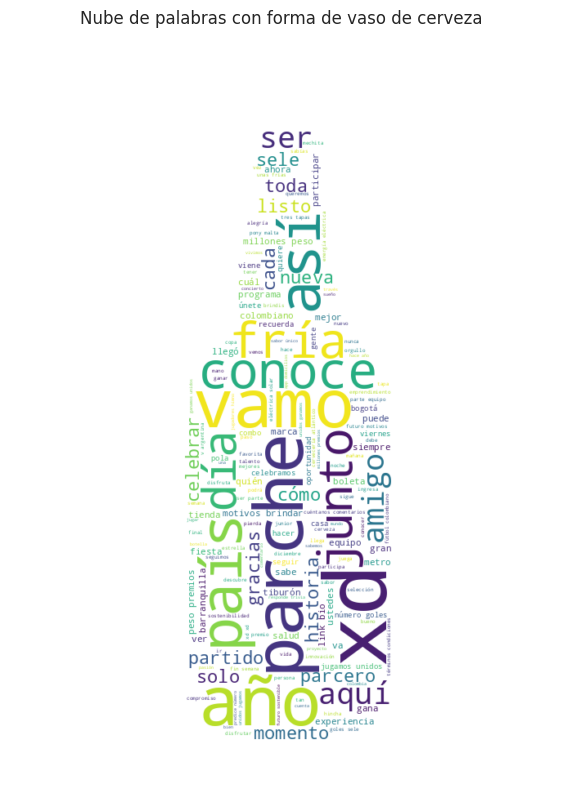

In [ ]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

# Cargar los datos de la columna 'cleaned_content'
all_words = ' '.join(new_post['cleaned_content'])

# Ruta local de la imagen descargada
beer_mask = np.array(Image.open('/content/drive/MyDrive/Proyecto de grado/cervezax3.png'))  # Asegúrate de actualizar esta ruta

# Crear la nube de palabras con la máscara
wordcloud = WordCloud(width=800, height=400, background_color='white', mask=beer_mask, contour_color='orange').generate(all_words)

# Eliminar la palabra "xd" de las frecuencias
if 'xd' in wordcloud.words_:
    del wordcloud.words_['xd']

# Mostrar la nube de palabras
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras con forma de vaso de cerveza')
plt.show()


### Modelamiento de los sentimientos

In [ ]:
from textblob import TextBlob

def obtener_sentimiento(texto):
    blob = TextBlob(texto)
    polaridad = blob.sentiment.polarity
    if polaridad > 0:
        return 'positivo'
    elif polaridad < 0:
        return 'negativo'
    else:
        return 'neutro'

# Aplicar la función de análisis de sentimiento
new_coments['sentimiento'] = new_coments['cleaned_comment'].apply(obtener_sentimiento)

# Ver los resultados
print(new_coments[['cleaned_comment', 'sentimiento']].head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  cleaned_comment sentimiento
0              🔥👏      neutro
1          🙌🙌🙌🙌❤️      neutro
2      👍👍👍👍👍🍻🍻🍻🍻🍻      neutro
6              🔥🔥      neutro
7      medellín 😂      neutro


<ipython-input-225-cc43461a5687>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_coments['sentimiento'] = new_coments['cleaned_comment'].apply(obtener_sentimiento)


In [ ]:
new_coments['sentimiento'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
sentimiento,
neutro,65802
positivo,947
negativo,343


In [ ]:
sentimiento_counts = new_coments['sentimiento'].value_counts()
print(sentimiento_counts)

# Crear una tabla resumen
resumen_sentimientos = pd.DataFrame({'Sentimiento': sentimiento_counts.index, 'Cantidad': sentimiento_counts.values})
print(resumen_sentimientos)


sentimiento
neutro      65802
positivo      947
negativo      343
Name: count, dtype: int64
  Sentimiento  Cantidad
0      neutro     65802
1    positivo       947
2    negativo       343


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-228-29446dc0e316>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ngram_counts.values, y=ngram_counts.index, palette="viridis")


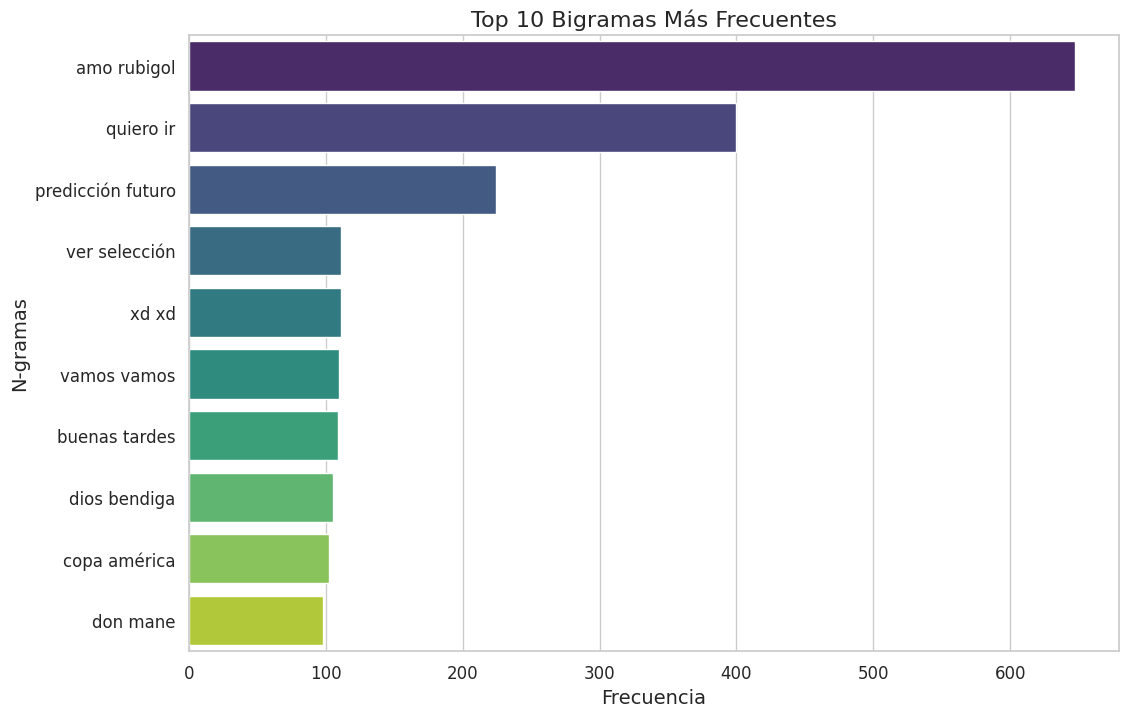

<ipython-input-228-29446dc0e316>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ngram_counts.values, y=ngram_counts.index, palette="viridis")


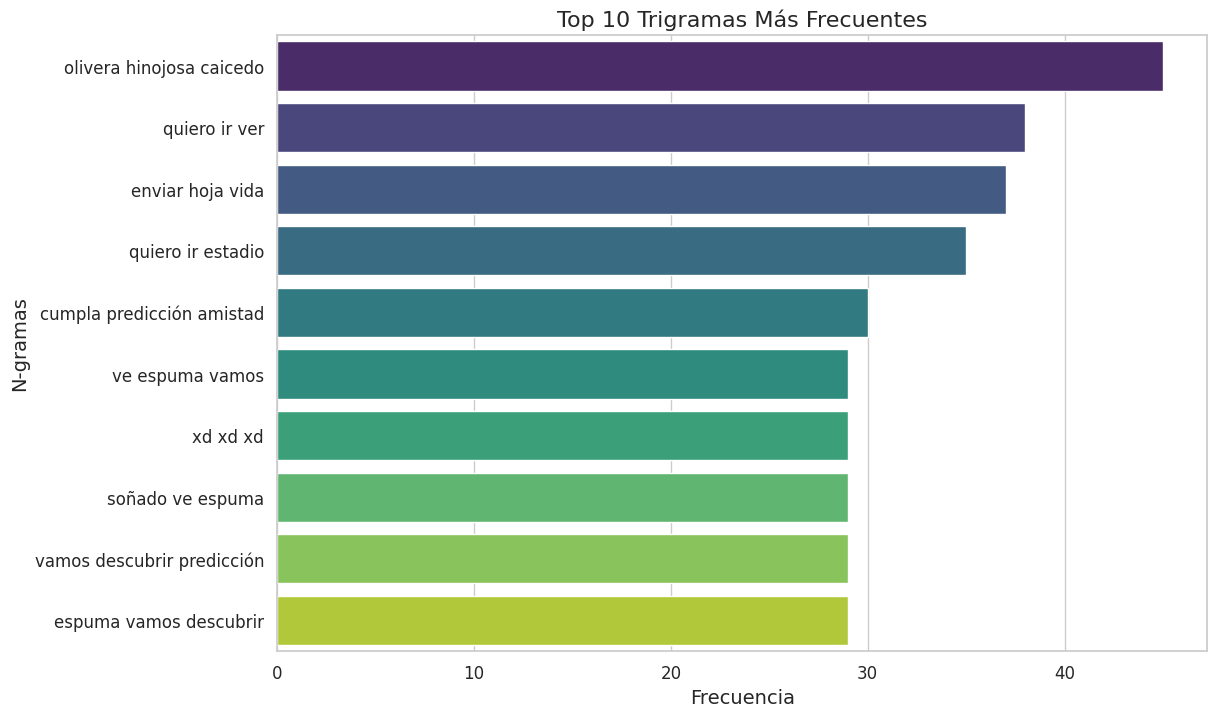

<ipython-input-228-29446dc0e316>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ngram_counts.values, y=ngram_counts.index, palette="viridis")


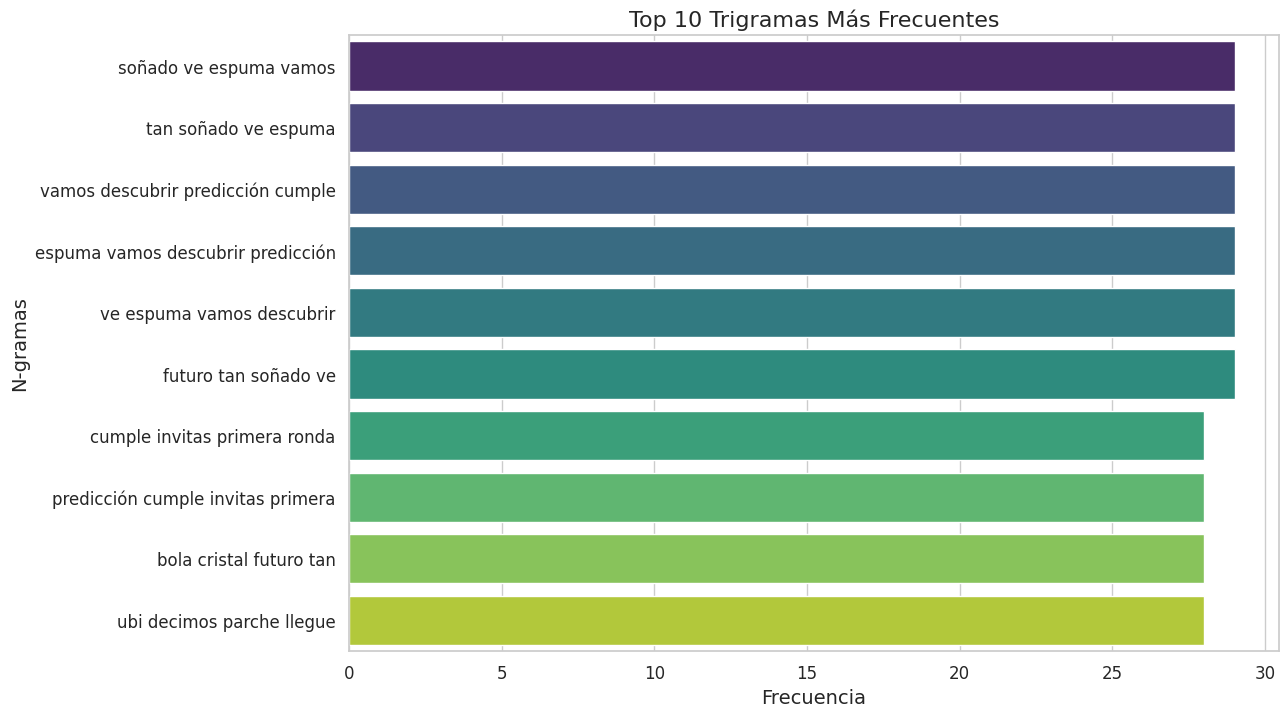

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from nltk.corpus import stopwords
import nltk

# Asegúrate de haber descargado las stopwords de nltk
nltk.download('stopwords')
stop_words_spanish = stopwords.words('spanish')

# Función para visualizar n-gramas
def plot_ngrams(data, ngram_range, top_n=10, title=""):
    # Configuración del vectorizador de n-gramas
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words=stop_words_spanish)
    ngrams = vectorizer.fit_transform(data)
    ngram_counts = pd.DataFrame(ngrams.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False).head(top_n)

    # Visualización del gráfico de barras horizontales
    plt.figure(figsize=(12, 8))
    sns.barplot(x=ngram_counts.values, y=ngram_counts.index, palette="viridis")
    plt.title(title, fontsize=16)
    plt.xlabel('Frecuencia', fontsize=14)
    plt.ylabel('N-gramas', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# Visualización de Bigramas
plot_ngrams(new_coments['cleaned_comment'], ngram_range=(2, 2), top_n=10, title="Top 10 Bigramas Más Frecuentes")

# Visualización de Trigramas
plot_ngrams(new_coments['cleaned_comment'], ngram_range=(3, 3), top_n=10, title="Top 10 Trigramas Más Frecuentes")


# Visualización de Cuatrigramas
plot_ngrams(new_coments['cleaned_comment'], ngram_range=(4, 4), top_n=10, title="Top 10 Trigramas Más Frecuentes")


In [ ]:
!pip install emoji

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
import emoji
from collections import Counter

# Extraer la columna de comentarios
comments = new_coments['cleaned_comment'].astype(str)

# Función para extraer emojis de un texto
def extract_emojis(text):
    return [char for char in text if char in emoji.EMOJI_DATA]

# Aplicar la función de extracción a cada comentario y juntar todos los emojis en una lista
all_emojis = []
for comment in comments:
    all_emojis.extend(extract_emojis(comment))

# Contar la frecuencia de cada emoji
emoji_counts = Counter(all_emojis)

# Obtener los 10 emojis más comentados
top_emojis = emoji_counts.most_common(10)

# Mostrar los emojis y sus frecuencias
print("Emojis más comentados:")
for emoji_char, count in top_emojis:
    print(f"{emoji_char}: {count}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Emojis más comentados:
😂: 19885
🔥: 13434
👏: 11700
❤: 9699
😍: 7921
🤣: 6457
🙌: 3996
🍻: 2152
🙏: 1367
💛: 1294


In [ ]:
import pandas as pd
from tabulate import tabulate

# Crear DataFrame con los emojis y sus frecuencias
df_top_emojis = pd.DataFrame(top_emojis, columns=['Emoji', 'Frecuencia'])

# Imprimir la tabla en un formato simple y limpio
print(tabulate(df_top_emojis, headers='keys', tablefmt='plain', showindex=False))


Emoji      Frecuencia
😂              19885
🔥              13434
👏              11700
❤                9699
😍               7921
🤣               6457
🙌               3996
🍻               2152
🙏               1367
💛               1294


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
## SE FILTRA LA BASE SIN LOS "TEST" PARA PROBAR el modelo de sentimientos
new_coments_train = new_coments[new_coments['test'] != 1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
new_coments_train.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(60769, 11)

  ## Latent Dirichlet Allocation (LDA)

In [ ]:
import random

# Establecer una semilla
random.seed(1234555)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# Fijar la semilla para todas las operaciones estocásticas
np.random.seed(123455)

# Cargar la base de datos
comments = new_post['cleaned_content'].astype(str)

# Preprocesamiento - Crear un documento de términos con CountVectorizer
stop_words = stopwords.words('spanish')
vectorizer = CountVectorizer(stop_words=stop_words, token_pattern=r'\b\w+\b')
X = vectorizer.fit_transform(comments)
terms = vectorizer.get_feature_names_out()

# Crear diccionario y corpus en el formato correcto para gensim
dictionary = corpora.Dictionary([comment.split() for comment in comments])
corpus = [dictionary.doc2bow(comment.split()) for comment in comments]

# Rango de parámetros para la búsqueda de hiperparámetros
num_topics_range = [5,6,7,9,10,12,15,20]
passes_range = [10,15,20,25,30,35,40]

# Variables para almacenar el mejor modelo y parámetros
best_coherence = 0
best_model = None
best_params = {'num_topics': None, 'passes': None}

# Iterar sobre los parámetros
for num_topics in num_topics_range:
    for passes in passes_range:
        # Entrenar el modelo LDA
        lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=passes,alpha="asymmetric",eta="auto")

        # Calcular la coherencia C_v
        coherence_model_lda = CoherenceModel(model=lda_model, texts=[comment.split() for comment in comments],
                                             dictionary=dictionary, coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()

        # Guardar el mejor modelo basado en la coherencia
        if coherence_lda > best_coherence:
            best_coherence = coherence_lda
            best_model = lda_model
            best_params['num_topics'] = num_topics
            best_params['passes'] = passes

        print(f'num_topics: {num_topics}, passes: {passes}, coherence: {coherence_lda}')

# Resultados óptimos
print(f'\nMejor coherencia: {best_coherence}')
print(f'Mejor número de temas: {best_params["num_topics"]}')
print(f'Mejor número de passes: {best_params["passes"]}')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


num_topics: 5, passes: 10, coherence: 0.39776978207144564
num_topics: 5, passes: 15, coherence: 0.41684721195742347
num_topics: 5, passes: 20, coherence: 0.44178229925921836
num_topics: 5, passes: 25, coherence: 0.36566025641347294
num_topics: 5, passes: 30, coherence: 0.36887421650525826
num_topics: 5, passes: 35, coherence: 0.4443026997206285
num_topics: 5, passes: 40, coherence: 0.37059694018169803
num_topics: 6, passes: 10, coherence: 0.3891142754619186
num_topics: 6, passes: 15, coherence: 0.4158465594147183
num_topics: 6, passes: 20, coherence: 0.4289036007471045
num_topics: 6, passes: 25, coherence: 0.3649916205087063
num_topics: 6, passes: 30, coherence: 0.4135440240034853
num_topics: 6, passes: 35, coherence: 0.439379261719199
num_topics: 6, passes: 40, coherence: 0.36158927289404663
num_topics: 7, passes: 10, coherence: 0.3484326599277508
num_topics: 7, passes: 15, coherence: 0.39378855377352473
num_topics: 7, passes: 20, coherence: 0.4029698039149034
num_topics: 7, passes: 2

In [ ]:
# Mostrar los temas del mejor modelo
print(f'\nMejor coherencia: {best_coherence}')
print(f'Mejor número de temas: {best_params["num_topics"]}')
print(f'Mejor número de passes: {best_params["passes"]}')
print("\nTemas óptimos:")

# Mostrar cada tema y sus palabras clave
for i, topic in best_model.print_topics(num_words=5):  # Cambia num_words para ver más o menos palabras por tema
    print(f'Tema {i + 1}: {topic}')



Mejor coherencia: 0.48928209381262694
Mejor número de temas: 20
Mejor número de passes: 35

Temas óptimos:
Tema 1: 0.024*"frías" + 0.013*"gente" + 0.012*"ustedes" + 0.010*"chimba" + 0.010*"aquí"
Tema 2: 0.059*"parceros" + 0.029*"parche" + 0.013*"cuál" + 0.011*"fría" + 0.010*"saben"
Tema 3: 0.013*"vamos" + 0.012*"feria" + 0.011*"diciembre" + 0.011*"pasión" + 0.011*"gran"
Tema 4: 0.018*"futuro" + 0.015*"brindar" + 0.013*"junto" + 0.012*"motivos" + 0.011*"cervezas"
Tema 5: 0.012*"sabroso" + 0.009*"igual" + 0.008*"grupo" + 0.008*"suerte" + 0.007*"🦈⚽️"
Tema 6: 0.012*"concurso" + 0.011*"partidoxd" + 0.011*"día" + 0.010*"felicitaciones" + 0.010*"mañana"
Tema 7: 0.030*"cali" + 0.027*"frías" + 0.023*"viene" + 0.015*"experiencia" + 0.013*"unas"
Tema 8: 0.016*"espero" + 0.013*"semana" + 0.011*"cuál" + 0.011*"sele" + 0.011*"bailar"
Tema 9: 0.164*"parche" + 0.056*"así" + 0.034*"boletas" + 0.016*"movistar" + 0.016*"pal"
Tema 10: 0.086*"unidos" + 0.034*"jugamos" + 0.024*"ganamos" + 0.020*"cervecería

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
best_model.save("lda_model_best.gensim")
dictionary.save("lda_dictionary.dict")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Cargar el diccionario
dictionary = Dictionary.load("lda_dictionary.dict")

# Cargar el modelo LDA
lda_model = LdaModel.load("lda_model_best.gensim")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_model.show_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.015*"vamos" + 0.010*"unidos" + 0.008*"frías" + 0.007*"sele" + 0.007*"gente" + 0.007*"así" + 0.006*"tiburón" + 0.006*"aquí" + 0.006*"partido" + 0.005*"junior"'),
 (1,
  '0.045*"parche" + 0.023*"parceros" + 0.013*"así" + 0.011*"concierto" + 0.010*"vemos" + 0.009*"ustedes" + 0.009*"pola" + 0.008*"boletas" + 0.007*"ver" + 0.006*"diciembre"'),
 (2,
  '0.012*"junto" + 0.012*"mejor" + 0.007*"gratis" + 0.005*"futuro" + 0.005*"tenderos" + 0.005*"país" + 0.005*"gran" + 0.005*"cada" + 0.004*"unidos" + 0.004*"gracias"'),
 (3,
  '0.012*"conoce" + 0.010*"convocatoria" + 0.008*"parte" + 0.008*"equipo" + 0.008*"aquí" + 0.007*"futuro" + 0.007*"junto" + 0.007*"país" + 0.007*"cervecería" + 0.007*"programa"'),
 (4,
  '0.016*"frías" + 0.009*"cervezas" + 0.007*"fútbol" + 0.007*"\u200bxd" + 0.006*"combo" + 0.006*"sabe" + 0.005*"cuál" + 0.005*"va" + 0.005*"momentos" + 0.005*"unas"'),
 (5,
  '0.027*"millones" + 0.025*"premios" + 0.022*"tapa" + 0.018*"peso" + 0.017*"goles" + 0.017*"ganar" + 0.017*"sel

In [ ]:
# Crear una lista para almacenar el tema dominante de cada documento
document_topics = []

# Iterar sobre cada documento en tu conjunto de datos
for comment in new_post['cleaned_content']:
    # Convertir el documento al formato bow
    bow = dictionary.doc2bow(comment.split())
    # Obtener las probabilidades de los temas
    topics = best_model.get_document_topics(bow)
    # Encontrar el tema con la mayor probabilidad
    dominant_topic = max(topics, key=lambda x: x[1])[0]
    # Guardar el tema dominante
    document_topics.append(dominant_topic)

# Asignar los temas a una nueva columna en el DataFrame
new_post['topic'] = document_topics

# Ver el resultado
print(new_post[['cleaned_content', 'topic']])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                        cleaned_content  topic
0     🌞🏖️ fin semana festivo recuerda ser buen actor...      1
1     🇨🇴 andrés ospina head of draftline innovation ...      5
2     🍻🎉👭cerveza amigas muchas risas recuerda fin se...      4
3     🍻hoy brindis va andrés ospina director equipo ...      3
4     así vivimos semana pasada experiencia 🎉🍻 tip m...      1
...                                                 ...    ...
2618  breve vamos salvar parceros parche vayan medal...      1
2619  quién boleta rebelde tour faltan tiquetes avió...      2
2620  parceros ir rebelde tour demasiado fácil regís...      1
2621        boleta rebelde tour escríbanme unas regalar      2
2622               parceros sobreviviendo pura ansiedad      1

[2609 rows x 2 columns]


<ipython-input-241-42958be9bb6a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_post['topic'] = document_topics


In [ ]:
# Guardar el DataFrame como archivo Excel
new_post.to_excel("new_post_with_topics.xlsx", index=False, engine="openpyxl")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def calculate_topic_diversity(model, num_words=10):
    topics = lda_model.show_topics(num_topics=-1, num_words=num_words, formatted=False)
    unique_words = set()
    total_words = 0

    for topic in topics:
        words = [word for word, _ in topic[1]]
        unique_words.update(words)
        total_words += len(words)

    topic_diversity = len(unique_words) / total_words
    return topic_diversity

# Calcular la diversidad de tópicos para el mejor modelo
topic_diversity = calculate_topic_diversity(best_model, num_words=10)
print(f"Diversidad de Tópicos: {topic_diversity}")


Diversidad de Tópicos: 0.8714285714285714


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import numpy as np

def calculate_topic_entropy(model):
    topic_word_dist = model.get_topics()
    entropies = -np.sum(topic_word_dist * np.log(topic_word_dist + 1e-10), axis=1)
    return entropies

# Calcular entropía de los tópicos
topic_entropies = calculate_topic_entropy(best_model)
for idx, entropy in enumerate(topic_entropies):
    print(f"Entropía del Tópico {idx}: {entropy}")

Entropía del Tópico 0: 7.332414627075195
Entropía del Tópico 1: 6.917807579040527
Entropía del Tópico 2: 7.589437484741211
Entropía del Tópico 3: 7.252348899841309
Entropía del Tópico 4: 7.5038228034973145
Entropía del Tópico 5: 6.8308515548706055
Entropía del Tópico 6: 7.965996742248535


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import matplotlib.pyplot as plt

# Convertir los comentarios en una lista de listas de palabras (ya realizado anteriormente)
tokenized_comments = [comment.split() for comment in comments]

# Crear el diccionario y el corpus usando gensim.corpora.Dictionary
dictionary = Dictionary(tokenized_comments)
corpus = [dictionary.doc2bow(text) for text in tokenized_comments]

# Utilizar el mejor modelo LDA obtenido
lda_model = lda_model

# Calcular la coherencia de los tópicos para el mejor modelo
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_comments, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherencia de los Tópicos (C_v): {coherence_lda}')

# Calcular la perplejidad del mejor modelo
perplexity_lda = lda_model.log_perplexity(corpus)
print(f'Perplejidad del Modelo: {perplexity_lda}')

# Visualizar los tópicos con pyLDAvis
pyLDAvis.enable_notebook()
lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherencia de los Tópicos (C_v): 0.5064659860951142
Perplejidad del Modelo: -8.30496481065804


## EL LAMBDA:

Esta fórmula de relevancia mide cuán relevante es un término para un tema en comparación con su frecuencia global en el corpus. Al ajustar
𝜆
λ:

Si
𝜆
=
1
λ=1, la fórmula depende solo de
𝑝
(
𝑤
∣
𝑡
)
p(w∣t), es decir, cuán frecuente es el término dentro del tema. Esto hace que los términos más representativos de cada tema (es decir, los términos que son muy característicos de ese tema) sean más relevantes.

Si
𝜆
=
0
λ=0, la fórmula depende solo de
𝑝
(
𝑤
∣
𝑡
)
𝑝
(
𝑤
)
p(w)
p(w∣t)
​
 , lo que enfatiza los términos que son más específicos de cada tema en comparación con su frecuencia global. Esto es útil para identificar términos raros pero importantes en el contexto de un tema específico.

  ## Latent Dirichlet Allocation (LDA) para ÁGUILA

In [ ]:
# Fijar la semilla para todas las operaciones estocásticas
np.random.seed(123455)

# Cargar la base de datos
filtered_posts = new_post[new_post['account_name'].isin(['cervezaaguila'])]
comments = filtered_posts['cleaned_content'].astype(str)

# Preprocesamiento - Crear un documento de términos con CountVectorizer
stop_words = stopwords.words('spanish')
vectorizer = CountVectorizer(stop_words=stop_words, token_pattern=r'\b\w+\b')
X = vectorizer.fit_transform(comments)
terms = vectorizer.get_feature_names_out()

# Crear diccionario y corpus en el formato correcto para gensim
dictionary = corpora.Dictionary([comment.split() for comment in comments])
corpus = [dictionary.doc2bow(comment.split()) for comment in comments]

# Rango de parámetros para la búsqueda de hiperparámetros
num_topics_range = [5,7,10]
passes_range = [10,20,30]

# Variables para almacenar el mejor modelo y parámetros
best_coherence = 0
best_model = None
best_params = {'num_topics': None, 'passes': None}

# Iterar sobre los parámetros
for num_topics in num_topics_range:
    for passes in passes_range:
        # Entrenar el modelo LDA
        lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=passes)

        # Calcular la coherencia C_v
        coherence_model_lda = CoherenceModel(model=lda_model, texts=[comment.split() for comment in comments],
                                             dictionary=dictionary, coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()

        # Guardar el mejor modelo basado en la coherencia
        if coherence_lda > best_coherence:
            best_coherence = coherence_lda
            best_model = lda_model
            best_params['num_topics'] = num_topics
            best_params['passes'] = passes

        print(f'num_topics: {num_topics}, passes: {passes}, coherence: {coherence_lda}')

# Resultados óptimos
print(f'\nMejor coherencia: {best_coherence}')
print(f'Mejor número de temas: {best_params["num_topics"]}')
print(f'Mejor número de passes: {best_params["passes"]}')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


num_topics: 5, passes: 10, coherence: 0.38694066103688324
num_topics: 5, passes: 20, coherence: 0.4069643369400393
num_topics: 5, passes: 30, coherence: 0.4386110816227723
num_topics: 7, passes: 10, coherence: 0.45397417034017806
num_topics: 7, passes: 20, coherence: 0.4209291504581091
num_topics: 7, passes: 30, coherence: 0.4993934740301418
num_topics: 10, passes: 10, coherence: 0.4620856732706267
num_topics: 10, passes: 20, coherence: 0.4209963414752379
num_topics: 10, passes: 30, coherence: 0.4075048023877663

Mejor coherencia: 0.4993934740301418
Mejor número de temas: 7
Mejor número de passes: 30


In [ ]:
# Mostrar los temas del mejor modelo
print(f'\nMejor coherencia: {best_coherence}')
print(f'Mejor número de temas: {best_params["num_topics"]}')
print(f'Mejor número de passes: {best_params["passes"]}')
print("\nTemas óptimos:")

# Mostrar cada tema y sus palabras clave
for i, topic in best_model.print_topics(num_words=6):  # Cambia num_words para ver más o menos palabras por tema
    print(f'Tema {i + 1}: {topic}')


Mejor coherencia: 0.4993934740301418
Mejor número de temas: 7
Mejor número de passes: 30

Temas óptimos:
Tema 1: 0.017*"v" + 0.017*"tapas" + 0.016*"sele" + 0.015*"goles" + 0.014*"tres" + 0.014*"argentina"
Tema 2: 0.015*"tiburón" + 0.015*"vamos" + 0.010*"aplican" + 0.009*"junior" + 0.009*"fútbol" + 0.007*"términos"
Tema 3: 0.033*"millones" + 0.030*"premios" + 0.024*"peso" + 0.023*"tapa" + 0.016*"goles" + 0.014*"sele"
Tema 4: 0.033*"unidos" + 0.024*"vamos" + 0.014*"jugamos" + 0.011*"sele" + 0.009*"partido" + 0.008*"ganamos"
Tema 5: 0.014*"pasión" + 0.013*"felicitaciones" + 0.013*"partidoxd" + 0.012*"pueblo" + 0.009*"diablo" + 0.009*"grande"
Tema 6: 0.020*"unidos" + 0.019*"frías" + 0.015*"sele" + 0.009*"gente" + 0.009*"ganamos" + 0.008*"celebrar"
Tema 7: 0.016*"frías" + 0.007*"fría" + 0.007*"carnaval" + 0.007*"escuadrón" + 0.006*"aquí" + 0.006*"fútbol"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
best_model.save("lda_model_bestAGUILA.gensim")
dictionary.save("lda_dictionaryAGUILA.dict")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Crear una lista para almacenar el tema dominante solo para los comentarios de Águila
document_topics_aguila = []

# Iterar sobre los comentarios filtrados
for comment in filtered_posts['cleaned_content']:
    # Convertir el comentario al formato bow
    bow = dictionary.doc2bow(comment.split())
    # Obtener las probabilidades de los temas
    topics = best_model.get_document_topics(bow)
    # Encontrar el tema con mayor probabilidad
    dominant_topic = max(topics, key=lambda x: x[1])[0]
    # Guardar el tema dominante
    document_topics_aguila.append(dominant_topic)

# Asignar la columna `topicAguila` a `filtered_posts` usando .loc
filtered_posts.loc[:, 'topicAguila'] = document_topics_aguila

# Crear la columna `topicAguila` en `new_post` e inicializar con NaN
new_post['topicAguila'] = None

# Actualizar las filas de Águila con los tópicos calculados
new_post.loc[filtered_posts.index, 'topicAguila'] = filtered_posts['topicAguila']

# Verificar el resultado
print(new_post[['account_name', 'cleaned_content', 'topicAguila']])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


          account_name                                    cleaned_content  \
0     bavaria_colombia  🌞🏖️ fin semana festivo recuerda ser buen actor...   
1     bavaria_colombia  🇨🇴 andrés ospina head of draftline innovation ...   
2     bavaria_colombia  🍻🎉👭cerveza amigas muchas risas recuerda fin se...   
3     bavaria_colombia  🍻hoy brindis va andrés ospina director equipo ...   
4     bavaria_colombia  así vivimos semana pasada experiencia 🎉🍻 tip m...   
...                ...                                                ...   
2618      CervezaPoker  breve vamos salvar parceros parche vayan medal...   
2619      CervezaPoker  quién boleta rebelde tour faltan tiquetes avió...   
2620      CervezaPoker  parceros ir rebelde tour demasiado fácil regís...   
2621      CervezaPoker        boleta rebelde tour escríbanme unas regalar   
2622      CervezaPoker               parceros sobreviviendo pura ansiedad   

     topicAguila  
0           None  
1           None  
2           None  

<ipython-input-145-244c79dd416a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_posts.loc[:, 'topicAguila'] = document_topics_aguila
<ipython-input-145-244c79dd416a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_post['topicAguila'] = None


In [ ]:
# Guardar el DataFrame como archivo Excel
new_post.to_excel("new_post_with_topics.xlsx", index=False, engine="openpyxl")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def calculate_topic_diversity(model, num_words=10):
    topics = model.show_topics(num_topics=-1, num_words=num_words, formatted=False)
    unique_words = set()
    total_words = 0

    for topic in topics:
        words = [word for word, _ in topic[1]]
        unique_words.update(words)
        total_words += len(words)

    topic_diversity = len(unique_words) / total_words
    return topic_diversity

# Calcular la diversidad de tópicos para el mejor modelo
topic_diversity = calculate_topic_diversity(best_model, num_words=10)
print(f"Diversidad de Tópicos: {topic_diversity}")


Diversidad de Tópicos: 0.8142857142857143


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import numpy as np

def calculate_topic_entropy(model):
    topic_word_dist = model.get_topics()
    entropies = -np.sum(topic_word_dist * np.log(topic_word_dist + 1e-10), axis=1)
    return entropies

# Calcular entropía de los tópicos
topic_entropies = calculate_topic_entropy(best_model)
for idx, entropy in enumerate(topic_entropies):
    print(f"Entropía del Tópico {idx}: {entropy}")

Entropía del Tópico 0: 6.697901725769043
Entropía del Tópico 1: 7.113937854766846
Entropía del Tópico 2: 6.522782802581787
Entropía del Tópico 3: 7.061946868896484
Entropía del Tópico 4: 7.0613250732421875
Entropía del Tópico 5: 7.072752952575684
Entropía del Tópico 6: 7.151679992675781


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convertir los comentarios en una lista de listas de palabras (ya realizado anteriormente)
tokenized_comments = [comment.split() for comment in comments]

# Crear el diccionario y el corpus usando gensim.corpora.Dictionary
dictionary = Dictionary(tokenized_comments)
corpus = [dictionary.doc2bow(text) for text in tokenized_comments]

# Utilizar el mejor modelo LDA obtenido
lda_model = best_model

# Calcular la coherencia de los tópicos para el mejor modelo
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_comments, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherencia de los Tópicos (C_v): {coherence_lda}')

# Calcular la perplejidad del mejor modelo
perplexity_lda = lda_model.log_perplexity(corpus)
print(f'Perplejidad del Modelo: {perplexity_lda}')

# Visualizar los tópicos con pyLDAvis
pyLDAvis.enable_notebook()
lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherencia de los Tópicos (C_v): 0.4993934740301418
Perplejidad del Modelo: -7.779664527213474


  ## Latent Dirichlet Allocation (LDA) para POKER

In [ ]:
# Fijar la semilla para todas las operaciones estocásticas
np.random.seed(1124)

# Cargar la base de datos
filtered_posts = new_post[new_post['account_name'].isin(['CervezaPoker','cervezapoker'])]
comments = filtered_posts['cleaned_content'].astype(str)

# Preprocesamiento - Crear un documento de términos con CountVectorizer
stop_words = stopwords.words('spanish')
vectorizer = CountVectorizer(stop_words=stop_words, token_pattern=r'\b\w+\b')
X = vectorizer.fit_transform(comments)
terms = vectorizer.get_feature_names_out()

# Crear diccionario y corpus en el formato correcto para gensim
dictionary = corpora.Dictionary([comment.split() for comment in comments])
corpus = [dictionary.doc2bow(comment.split()) for comment in comments]

# Rango de parámetros para la búsqueda de hiperparámetros
num_topics_range = [5,7,10]
passes_range = [10,20,30]

# Variables para almacenar el mejor modelo y parámetros
best_coherence = 0
best_model = None
best_params = {'num_topics': None, 'passes': None}

# Iterar sobre los parámetros
for num_topics in num_topics_range:
    for passes in passes_range:
        # Entrenar el modelo LDA
        lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=passes)

        # Calcular la coherencia C_v
        coherence_model_lda = CoherenceModel(model=lda_model, texts=[comment.split() for comment in comments],
                                             dictionary=dictionary, coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()

        # Guardar el mejor modelo basado en la coherencia
        if coherence_lda > best_coherence:
            best_coherence = coherence_lda
            best_model = lda_model
            best_params['num_topics'] = num_topics
            best_params['passes'] = passes

        print(f'num_topics: {num_topics}, passes: {passes}, coherence: {coherence_lda}')

# Resultados óptimos
print(f'\nMejor coherencia: {best_coherence}')
print(f'Mejor número de temas: {best_params["num_topics"]}')
print(f'Mejor número de passes: {best_params["passes"]}')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


num_topics: 5, passes: 10, coherence: 0.35634422994915915
num_topics: 5, passes: 20, coherence: 0.36678260878838365
num_topics: 5, passes: 30, coherence: 0.4172946403562131
num_topics: 7, passes: 10, coherence: 0.3703703706886349
num_topics: 7, passes: 20, coherence: 0.37787730782766016
num_topics: 7, passes: 30, coherence: 0.3926176424678567
num_topics: 10, passes: 10, coherence: 0.39586778315834226
num_topics: 10, passes: 20, coherence: 0.3769987651112517
num_topics: 10, passes: 30, coherence: 0.35843328606019464

Mejor coherencia: 0.4172946403562131
Mejor número de temas: 5
Mejor número de passes: 30


In [ ]:
# Mostrar los temas del mejor modelo
print(f'\nMejor coherencia: {best_coherence}')
print(f'Mejor número de temas: {best_params["num_topics"]}')
print(f'Mejor número de passes: {best_params["passes"]}')
print("\nTemas óptimos:")

# Mostrar cada tema y sus palabras clave
for i, topic in best_model.print_topics(num_words=5):  # Cambia num_words para ver más o menos palabras por tema
    print(f'Tema {i + 1}: {topic}')


Mejor coherencia: 0.4172946403562131
Mejor número de temas: 5
Mejor número de passes: 30

Temas óptimos:
Tema 1: 0.037*"parche" + 0.023*"parceros" + 0.016*"vemos" + 0.013*"pola" + 0.010*"movistar"
Tema 2: 0.018*"parceros" + 0.010*"amigo" + 0.008*"parche" + 0.008*"vemos" + 0.008*"cali"
Tema 3: 0.022*"feria" + 0.021*"parche" + 0.019*"diciembre" + 0.018*"vip" + 0.017*"concierto"
Tema 4: 0.010*"parceros" + 0.008*"amistad" + 0.008*"ustedes" + 0.007*"así" + 0.007*"entrenar"
Tema 5: 0.082*"parche" + 0.025*"parceros" + 0.022*"así" + 0.019*"único" + 0.018*"sabor"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
best_model.save("lda_model_bestPOKER.gensim")
dictionary.save("lda_dictionaryPOKER.dict")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Crear una lista para almacenar el tema dominante solo para los comentarios de Águila
document_topics_aguila = []

# Iterar sobre los comentarios filtrados
for comment in filtered_posts['cleaned_content']:
    # Convertir el comentario al formato bow
    bow = dictionary.doc2bow(comment.split())
    # Obtener las probabilidades de los temas
    topics = best_model.get_document_topics(bow)
    # Encontrar el tema con mayor probabilidad
    dominant_topic = max(topics, key=lambda x: x[1])[0]
    # Guardar el tema dominante
    document_topics_aguila.append(dominant_topic)

# Asignar la columna `topicAguila` a `filtered_posts` usando .loc
filtered_posts.loc[:, 'topicPoker'] = document_topics_aguila

# Crear la columna `topicAguila` en `new_post` e inicializar con NaN
new_post['topicPoker'] = None

# Actualizar las filas de Águila con los tópicos calculados
new_post.loc[filtered_posts.index, 'topicPoker'] = filtered_posts['topicPoker']

# Verificar el resultado
print(new_post[['account_name', 'cleaned_content', 'topicPoker']])


          account_name                                    cleaned_content  \
0     bavaria_colombia  🌞🏖️ fin semana festivo recuerda ser buen actor...   
1     bavaria_colombia  🇨🇴 andrés ospina head of draftline innovation ...   
2     bavaria_colombia  🍻🎉👭cerveza amigas muchas risas recuerda fin se...   
3     bavaria_colombia  🍻hoy brindis va andrés ospina director equipo ...   
4     bavaria_colombia  así vivimos semana pasada experiencia 🎉🍻 tip m...   
...                ...                                                ...   
2618      CervezaPoker  breve vamos salvar parceros parche vayan medal...   
2619      CervezaPoker  quién boleta rebelde tour faltan tiquetes avió...   
2620      CervezaPoker  parceros ir rebelde tour demasiado fácil regís...   
2621      CervezaPoker        boleta rebelde tour escríbanme unas regalar   
2622      CervezaPoker               parceros sobreviviendo pura ansiedad   

     topicPoker  
0          None  
1          None  
2          None  
3  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-153-4194f1f2d35f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_posts.loc[:, 'topicPoker'] = document_topics_aguila
<ipython-input-153-4194f1f2d35f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [ ]:
# Guardar el DataFrame como archivo Excel
new_post.to_excel("new_post_with_topics.xlsx", index=False, engine="openpyxl")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def calculate_topic_diversity(model, num_words=10):
    topics = model.show_topics(num_topics=-1, num_words=num_words, formatted=False)
    unique_words = set()
    total_words = 0

    for topic in topics:
        words = [word for word, _ in topic[1]]
        unique_words.update(words)
        total_words += len(words)

    topic_diversity = len(unique_words) / total_words
    return topic_diversity

# Calcular la diversidad de tópicos para el mejor modelo
topic_diversity = calculate_topic_diversity(best_model, num_words=10)
print(f"Diversidad de Tópicos: {topic_diversity}")


Diversidad de Tópicos: 0.7


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import numpy as np

def calculate_topic_entropy(model):
    topic_word_dist = model.get_topics()
    entropies = -np.sum(topic_word_dist * np.log(topic_word_dist + 1e-10), axis=1)
    return entropies

# Calcular entropía de los tópicos
topic_entropies = calculate_topic_entropy(best_model)
for idx, entropy in enumerate(topic_entropies):
    print(f"Entropía del Tópico {idx}: {entropy}")

Entropía del Tópico 0: 6.261135101318359
Entropía del Tópico 1: 6.498964309692383
Entropía del Tópico 2: 6.190307140350342
Entropía del Tópico 3: 6.538479804992676
Entropía del Tópico 4: 5.972041130065918


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convertir los comentarios en una lista de listas de palabras (ya realizado anteriormente)
tokenized_comments = [comment.split() for comment in comments]

# Crear el diccionario y el corpus usando gensim.corpora.Dictionary
dictionary = Dictionary(tokenized_comments)
corpus = [dictionary.doc2bow(text) for text in tokenized_comments]

# Utilizar el mejor modelo LDA obtenido
lda_model = best_model

# Calcular la coherencia de los tópicos para el mejor modelo
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_comments, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherencia de los Tópicos (C_v): {coherence_lda}')

# Calcular la perplejidad del mejor modelo
perplexity_lda = lda_model.log_perplexity(corpus)
print(f'Perplejidad del Modelo: {perplexity_lda}')

# Visualizar los tópicos con pyLDAvis
pyLDAvis.enable_notebook()
lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherencia de los Tópicos (C_v): 0.4172946403562131
Perplejidad del Modelo: -6.996229585446605


  ## Latent Dirichlet Allocation (LDA) para CLUB COLOMBIA

In [ ]:
# Fijar la semilla para todas las operaciones estocásticas
np.random.seed(1124)

# Cargar la base de datos
filtered_posts = new_post[new_post['account_name'].isin(['clubcolombia','Club_Colombia'])]
comments = filtered_posts['cleaned_content'].astype(str)

# Preprocesamiento - Crear un documento de términos con CountVectorizer
stop_words = stopwords.words('spanish')
vectorizer = CountVectorizer(stop_words=stop_words, token_pattern=r'\b\w+\b')
X = vectorizer.fit_transform(comments)
terms = vectorizer.get_feature_names_out()

# Crear diccionario y corpus en el formato correcto para gensim
dictionary = corpora.Dictionary([comment.split() for comment in comments])
corpus = [dictionary.doc2bow(comment.split()) for comment in comments]

# Rango de parámetros para la búsqueda de hiperparámetros
num_topics_range = [5,7,10]
passes_range = [10,20,30]

# Variables para almacenar el mejor modelo y parámetros
best_coherence = 0
best_model = None
best_params = {'num_topics': None, 'passes': None}

# Iterar sobre los parámetros
for num_topics in num_topics_range:
    for passes in passes_range:
        # Entrenar el modelo LDA
        lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=passes)

        # Calcular la coherencia C_v
        coherence_model_lda = CoherenceModel(model=lda_model, texts=[comment.split() for comment in comments],
                                             dictionary=dictionary, coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()

        # Guardar el mejor modelo basado en la coherencia
        if coherence_lda > best_coherence:
            best_coherence = coherence_lda
            best_model = lda_model
            best_params['num_topics'] = num_topics
            best_params['passes'] = passes

        print(f'num_topics: {num_topics}, passes: {passes}, coherence: {coherence_lda}')

# Resultados óptimos
print(f'\nMejor coherencia: {best_coherence}')
print(f'Mejor número de temas: {best_params["num_topics"]}')
print(f'Mejor número de passes: {best_params["passes"]}')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


num_topics: 5, passes: 10, coherence: 0.4673393752738515
num_topics: 5, passes: 20, coherence: 0.4482025869251506
num_topics: 5, passes: 30, coherence: 0.48363590591598504
num_topics: 7, passes: 10, coherence: 0.47245181176851075
num_topics: 7, passes: 20, coherence: 0.4222414776735142
num_topics: 7, passes: 30, coherence: 0.47560424372764676
num_topics: 10, passes: 10, coherence: 0.41811422649905544
num_topics: 10, passes: 20, coherence: 0.4162164527013904
num_topics: 10, passes: 30, coherence: 0.4501363091259485

Mejor coherencia: 0.48363590591598504
Mejor número de temas: 5
Mejor número de passes: 30


In [ ]:
# Mostrar los temas del mejor modelo
print(f'\nMejor coherencia: {best_coherence}')
print(f'Mejor número de temas: {best_params["num_topics"]}')
print(f'Mejor número de passes: {best_params["passes"]}')
print("\nTemas óptimos:")

# Mostrar cada tema y sus palabras clave
for i, topic in best_model.print_topics(num_words=5):  # Cambia num_words para ver más o menos palabras por tema
    print(f'Tema {i + 1}: {topic}')


Mejor coherencia: 0.48363590591598504
Mejor número de temas: 5
Mejor número de passes: 30

Temas óptimos:
Tema 1: 0.018*"gr" + 0.015*"aquí" + 0.014*"junto" + 0.014*"maridaje" + 0.012*"•"
Tema 2: 0.013*"negra" + 0.008*"ingredientes" + 0.008*"cucharada" + 0.008*"conoce" + 0.007*"unicca"
Tema 3: 0.036*"nueva" + 0.025*"copa" + 0.022*"mejor" + 0.018*"ser" + 0.018*"anfitrión"
Tema 4: 0.007*"emprendimientos" + 0.007*"hamburguesa" + 0.007*"aquí" + 0.005*"festival" + 0.005*"combo"
Tema 5: 0.028*"gran" + 0.020*"emprendimientos" + 0.014*"–" + 0.013*"nueva" + 0.012*"unicca"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
best_model.save("lda_model_bestCCOLOMBIA.gensim")
dictionary.save("lda_dictionaryCCOLOMBIA.dict")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Crear una lista para almacenar el tema dominante solo para los comentarios de Águila
document_topics_aguila = []

# Iterar sobre los comentarios filtrados
for comment in filtered_posts['cleaned_content']:
    # Convertir el comentario al formato bow
    bow = dictionary.doc2bow(comment.split())
    # Obtener las probabilidades de los temas
    topics = best_model.get_document_topics(bow)
    # Encontrar el tema con mayor probabilidad
    dominant_topic = max(topics, key=lambda x: x[1])[0]
    # Guardar el tema dominante
    document_topics_aguila.append(dominant_topic)

# Asignar la columna `topicAguila` a `filtered_posts` usando .loc
filtered_posts.loc[:, 'topicCColombia'] = document_topics_aguila

# Crear la columna `topicAguila` en `new_post` e inicializar con NaN
new_post['topicCColombia'] = None

# Actualizar las filas de Águila con los tópicos calculados
new_post.loc[filtered_posts.index, 'topicCColombia'] = filtered_posts['topicCColombia']

# Verificar el resultado
print(new_post[['account_name', 'cleaned_content', 'topicCColombia']])


          account_name                                    cleaned_content  \
0     bavaria_colombia  🌞🏖️ fin semana festivo recuerda ser buen actor...   
1     bavaria_colombia  🇨🇴 andrés ospina head of draftline innovation ...   
2     bavaria_colombia  🍻🎉👭cerveza amigas muchas risas recuerda fin se...   
3     bavaria_colombia  🍻hoy brindis va andrés ospina director equipo ...   
4     bavaria_colombia  así vivimos semana pasada experiencia 🎉🍻 tip m...   
...                ...                                                ...   
2618      CervezaPoker  breve vamos salvar parceros parche vayan medal...   
2619      CervezaPoker  quién boleta rebelde tour faltan tiquetes avió...   
2620      CervezaPoker  parceros ir rebelde tour demasiado fácil regís...   
2621      CervezaPoker        boleta rebelde tour escríbanme unas regalar   
2622      CervezaPoker               parceros sobreviviendo pura ansiedad   

     topicCColombia  
0              None  
1              None  
2        

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-161-fdaaf38b516f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_posts.loc[:, 'topicCColombia'] = document_topics_aguila
<ipython-input-161-fdaaf38b516f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
# Guardar el DataFrame como archivo Excel
new_post.to_excel("new_post_with_topics.xlsx", index=False, engine="openpyxl")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def calculate_topic_diversity(model, num_words=10):
    topics = model.show_topics(num_topics=-1, num_words=num_words, formatted=False)
    unique_words = set()
    total_words = 0

    for topic in topics:
        words = [word for word, _ in topic[1]]
        unique_words.update(words)
        total_words += len(words)

    topic_diversity = len(unique_words) / total_words
    return topic_diversity

# Calcular la diversidad de tópicos para el mejor modelo
topic_diversity = calculate_topic_diversity(best_model, num_words=10)
print(f"Diversidad de Tópicos: {topic_diversity}")


Diversidad de Tópicos: 0.9


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import numpy as np

def calculate_topic_entropy(model):
    topic_word_dist = model.get_topics()
    entropies = -np.sum(topic_word_dist * np.log(topic_word_dist + 1e-10), axis=1)
    return entropies

# Calcular entropía de los tópicos
topic_entropies = calculate_topic_entropy(best_model)
for idx, entropy in enumerate(topic_entropies):
    print(f"Entropía del Tópico {idx}: {entropy}")

Entropía del Tópico 0: 6.285830497741699
Entropía del Tópico 1: 6.450592041015625
Entropía del Tópico 2: 6.2217254638671875
Entropía del Tópico 3: 6.5328779220581055
Entropía del Tópico 4: 6.2744646072387695


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convertir los comentarios en una lista de listas de palabras (ya realizado anteriormente)
tokenized_comments = [comment.split() for comment in comments]

# Crear el diccionario y el corpus usando gensim.corpora.Dictionary
dictionary = Dictionary(tokenized_comments)
corpus = [dictionary.doc2bow(text) for text in tokenized_comments]

# Utilizar el mejor modelo LDA obtenido
lda_model = best_model

# Calcular la coherencia de los tópicos para el mejor modelo
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_comments, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherencia de los Tópicos (C_v): {coherence_lda}')

# Calcular la perplejidad del mejor modelo
perplexity_lda = lda_model.log_perplexity(corpus)
print(f'Perplejidad del Modelo: {perplexity_lda}')

# Visualizar los tópicos con pyLDAvis
pyLDAvis.enable_notebook()
lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherencia de los Tópicos (C_v): 0.48363590591598504
Perplejidad del Modelo: -7.164791092796381


  ## Latent Dirichlet Allocation (LDA) para BAVARIA

In [ ]:
# Fijar la semilla para todas las operaciones estocásticas
np.random.seed(15)

# Cargar la base de datos
filtered_posts = new_post[new_post['account_name'].isin(['bavaria_colombia','BAVARIA_OFICIAL'])]
comments = filtered_posts['cleaned_content'].astype(str)

# Preprocesamiento - Crear un documento de términos con CountVectorizer
stop_words = stopwords.words('spanish')
vectorizer = CountVectorizer(stop_words=stop_words, token_pattern=r'\b\w+\b')
X = vectorizer.fit_transform(comments)
terms = vectorizer.get_feature_names_out()

# Crear diccionario y corpus en el formato correcto para gensim
dictionary = corpora.Dictionary([comment.split() for comment in comments])
corpus = [dictionary.doc2bow(comment.split()) for comment in comments]

# Rango de parámetros para la búsqueda de hiperparámetros
num_topics_range = [5,7,10]
passes_range = [10,20,30]

# Variables para almacenar el mejor modelo y parámetros
best_coherence = 0
best_model = None
best_params = {'num_topics': None, 'passes': None}

# Iterar sobre los parámetros
for num_topics in num_topics_range:
    for passes in passes_range:
        # Entrenar el modelo LDA
        lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=passes)

        # Calcular la coherencia C_v
        coherence_model_lda = CoherenceModel(model=lda_model, texts=[comment.split() for comment in comments],
                                             dictionary=dictionary, coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()

        # Guardar el mejor modelo basado en la coherencia
        if coherence_lda > best_coherence:
            best_coherence = coherence_lda
            best_model = lda_model
            best_params['num_topics'] = num_topics
            best_params['passes'] = passes

        print(f'num_topics: {num_topics}, passes: {passes}, coherence: {coherence_lda}')

# Resultados óptimos
print(f'\nMejor coherencia: {best_coherence}')
print(f'Mejor número de temas: {best_params["num_topics"]}')
print(f'Mejor número de passes: {best_params["passes"]}')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


num_topics: 5, passes: 10, coherence: 0.3148187161725243
num_topics: 5, passes: 20, coherence: 0.3098090522197974
num_topics: 5, passes: 30, coherence: 0.3502088382402886
num_topics: 7, passes: 10, coherence: 0.33584270255503534
num_topics: 7, passes: 20, coherence: 0.3233963664357633
num_topics: 7, passes: 30, coherence: 0.3021805899681413
num_topics: 10, passes: 10, coherence: 0.3346380171573531
num_topics: 10, passes: 20, coherence: 0.29032386503885754
num_topics: 10, passes: 30, coherence: 0.3432194752799741

Mejor coherencia: 0.3502088382402886
Mejor número de temas: 5
Mejor número de passes: 30


In [ ]:
# Mostrar los temas del mejor modelo
print(f'\nMejor coherencia: {best_coherence}')
print(f'Mejor número de temas: {best_params["num_topics"]}')
print(f'Mejor número de passes: {best_params["passes"]}')
print("\nTemas óptimos:")

# Mostrar cada tema y sus palabras clave
for i, topic in best_model.print_topics(num_words=5):  # Cambia num_words para ver más o menos palabras por tema
    print(f'Tema {i + 1}: {topic}')


Mejor coherencia: 0.3502088382402886
Mejor número de temas: 5
Mejor número de passes: 30

Temas óptimos:
Tema 1: 0.009*"año" + 0.006*"nueva" + 0.006*"fin" + 0.006*"semana" + 0.006*"celebración"
Tema 2: 0.017*"comentarios" + 0.012*"cuál" + 0.012*"cuéntanos" + 0.006*"mejor" + 0.006*"día"
Tema 3: 0.011*"futuro" + 0.011*"brindar" + 0.010*"motivos" + 0.010*"botellas" + 0.010*"años"
Tema 4: 0.020*"convocatoria" + 0.013*"link" + 0.013*"aplica" + 0.012*"bio" + 0.011*"parte"
Tema 5: 0.015*"punto" + 0.012*"junto" + 0.008*"futuro" + 0.007*"b" + 0.007*"cada"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
best_model.save("lda_model_bestBAVARIA.gensim")
dictionary.save("lda_dictionaryBAVARIA.dict")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Crear una lista para almacenar el tema dominante solo para los comentarios de Águila
document_topics_aguila = []

# Iterar sobre los comentarios filtrados
for comment in filtered_posts['cleaned_content']:
    # Convertir el comentario al formato bow
    bow = dictionary.doc2bow(comment.split())
    # Obtener las probabilidades de los temas
    topics = best_model.get_document_topics(bow)
    # Encontrar el tema con mayor probabilidad
    dominant_topic = max(topics, key=lambda x: x[1])[0]
    # Guardar el tema dominante
    document_topics_aguila.append(dominant_topic)

# Asignar la columna `topicAguila` a `filtered_posts` usando .loc
filtered_posts.loc[:, 'topicBavaria'] = document_topics_aguila

# Crear la columna `topicAguila` en `new_post` e inicializar con NaN
new_post['topicBavaria'] = None

# Actualizar las filas de Águila con los tópicos calculados
new_post.loc[filtered_posts.index, 'topicBavaria'] = filtered_posts['topicBavaria']

# Verificar el resultado
print(new_post[['account_name', 'cleaned_content', 'topicBavaria']])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


          account_name                                    cleaned_content  \
0     bavaria_colombia  🌞🏖️ fin semana festivo recuerda ser buen actor...   
1     bavaria_colombia  🇨🇴 andrés ospina head of draftline innovation ...   
2     bavaria_colombia  🍻🎉👭cerveza amigas muchas risas recuerda fin se...   
3     bavaria_colombia  🍻hoy brindis va andrés ospina director equipo ...   
4     bavaria_colombia  así vivimos semana pasada experiencia 🎉🍻 tip m...   
...                ...                                                ...   
2618      CervezaPoker  breve vamos salvar parceros parche vayan medal...   
2619      CervezaPoker  quién boleta rebelde tour faltan tiquetes avió...   
2620      CervezaPoker  parceros ir rebelde tour demasiado fácil regís...   
2621      CervezaPoker        boleta rebelde tour escríbanme unas regalar   
2622      CervezaPoker               parceros sobreviviendo pura ansiedad   

     topicBavaria  
0               1  
1               0  
2              

<ipython-input-169-2e88553cd389>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_posts.loc[:, 'topicBavaria'] = document_topics_aguila
<ipython-input-169-2e88553cd389>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_post['topicBavaria'] = None


In [ ]:
# Guardar el DataFrame como archivo Excel
new_post.to_excel("new_post_with_topics.xlsx", index=False, engine="openpyxl")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def calculate_topic_diversity(model, num_words=10):
    topics = model.show_topics(num_topics=-1, num_words=num_words, formatted=False)
    unique_words = set()
    total_words = 0

    for topic in topics:
        words = [word for word, _ in topic[1]]
        unique_words.update(words)
        total_words += len(words)

    topic_diversity = len(unique_words) / total_words
    return topic_diversity

# Calcular la diversidad de tópicos para el mejor modelo
topic_diversity = calculate_topic_diversity(best_model, num_words=10)
print(f"Diversidad de Tópicos: {topic_diversity}")


Diversidad de Tópicos: 0.8


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import numpy as np

def calculate_topic_entropy(model):
    topic_word_dist = model.get_topics()
    entropies = -np.sum(topic_word_dist * np.log(topic_word_dist + 1e-10), axis=1)
    return entropies

# Calcular entropía de los tópicos
topic_entropies = calculate_topic_entropy(best_model)
for idx, entropy in enumerate(topic_entropies):
    print(f"Entropía del Tópico {idx}: {entropy}")

Entropía del Tópico 0: 7.287929058074951
Entropía del Tópico 1: 7.193301200866699
Entropía del Tópico 2: 7.067262649536133
Entropía del Tópico 3: 6.937452793121338
Entropía del Tópico 4: 7.269514083862305


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convertir los comentarios en una lista de listas de palabras (ya realizado anteriormente)
tokenized_comments = [comment.split() for comment in comments]

# Crear el diccionario y el corpus usando gensim.corpora.Dictionary
dictionary = Dictionary(tokenized_comments)
corpus = [dictionary.doc2bow(text) for text in tokenized_comments]

# Utilizar el mejor modelo LDA obtenido
lda_model = best_model

# Calcular la coherencia de los tópicos para el mejor modelo
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_comments, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherencia de los Tópicos (C_v): {coherence_lda}')

# Calcular la perplejidad del mejor modelo
perplexity_lda = lda_model.log_perplexity(corpus)
print(f'Perplejidad del Modelo: {perplexity_lda}')

# Visualizar los tópicos con pyLDAvis
pyLDAvis.enable_notebook()
lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherencia de los Tópicos (C_v): 0.3502088382402886
Perplejidad del Modelo: -7.799120445347958


## BERTopic

In [ ]:
!pip install bertopic umap-learn hdbscan sentence-transformers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
from sklearn.metrics import silhouette_score
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
import pandas as pd

np.random.seed(123455)

# Paso 1: Cargar los datos
comments = new_post['cleaned_content'].tolist()

# Embeddings sugeridos para comparar
embedding_models = ["paraphrase-MiniLM-L6-v2", "all-mpnet-base-v2","paraphrase-mpnet-base-v2","all-MiniLM-L6-v2"]
best_score = 0
best_nr_topics = None
best_embedding_model = None

for embedding_model_name in embedding_models:
    # Paso 2: Preparar los embeddings
    sentence_model = SentenceTransformer(embedding_model_name)
    embeddings = sentence_model.encode(comments, show_progress_bar=True)

    # Probar diferentes valores de `nr_topics`
    for nr_topics in [None, 5, 10, 15, 20]:  # `None` permite al modelo elegir automáticamente
        # Entrenar el modelo BERTopic
        topic_model = BERTopic(nr_topics=nr_topics)
        topics, _ = topic_model.fit_transform(comments, embeddings)

        # Calcular la coherencia
        topics_words = []
        for topic in range(len(set(topics))):
            topic_words = topic_model.get_topic(topic)
            # Verificar si get_topic devolvió una lista de palabras en lugar de False
            if topic_words:
                topics_words.append([word for word, _ in topic_words])

        # Limpiar cualquier lista vacía en topics_words
        topics_words = [topic for topic in topics_words if topic]

        tokenized_comments = [comment.split() for comment in comments]
        dictionary = Dictionary(tokenized_comments)

        # Verificar que topics_words no esté vacío antes de calcular la coherencia
        if topics_words:
            coherence_model = CoherenceModel(topics=topics_words, texts=tokenized_comments, dictionary=dictionary, coherence="c_npmi")
            coherence_score = coherence_model.get_coherence()
        else:
            coherence_score = 0  # Si no hay tópicos válidos, asigna un puntaje de coherencia bajo

        # Calcular el Silhouette Score
        silhouette = silhouette_score(embeddings, topics)

        print(f"Embeddings: {embedding_model_name}, nr_topics: {nr_topics}, Coherencia: {coherence_score}, Silhouette Score: {silhouette}")

        # Guardar la mejor configuración basada en la coherencia
        if coherence_score > best_score:
            best_score = coherence_score
            best_nr_topics = nr_topics
            best_embedding_model = embedding_model_name

print(f"Mejor modelo: {best_embedding_model} con nr_topics={best_nr_topics} y Coherencia: {best_score}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Batches:   0%|          | 0/82 [00:00<?, ?it/s]

Embeddings: paraphrase-MiniLM-L6-v2, nr_topics: None, Coherencia: 0.04917488934360056, Silhouette Score: -0.010799257084727287
Embeddings: paraphrase-MiniLM-L6-v2, nr_topics: 5, Coherencia: 0.1359743594727962, Silhouette Score: -0.008566569536924362
Embeddings: paraphrase-MiniLM-L6-v2, nr_topics: 10, Coherencia: 0.16387664251040593, Silhouette Score: -0.01421567052602768
Embeddings: paraphrase-MiniLM-L6-v2, nr_topics: 15, Coherencia: 0.1350451874753415, Silhouette Score: -0.018577687442302704
Embeddings: paraphrase-MiniLM-L6-v2, nr_topics: 20, Coherencia: 0.0930636155459816, Silhouette Score: -0.015764936804771423


Batches:   0%|          | 0/82 [00:00<?, ?it/s]

Embeddings: all-mpnet-base-v2, nr_topics: None, Coherencia: 0.059659499477750046, Silhouette Score: 0.03094290941953659
Embeddings: all-mpnet-base-v2, nr_topics: 5, Coherencia: 0.07576588092680238, Silhouette Score: 0.007993461564183235
Embeddings: all-mpnet-base-v2, nr_topics: 10, Coherencia: 0.08204833328680623, Silhouette Score: 0.01059859711676836
Embeddings: all-mpnet-base-v2, nr_topics: 15, Coherencia: 0.08577096914684226, Silhouette Score: 0.00018917258421424776
Embeddings: all-mpnet-base-v2, nr_topics: 20, Coherencia: 0.09057903710306273, Silhouette Score: 0.005185719113796949


Batches:   0%|          | 0/82 [00:00<?, ?it/s]

Embeddings: paraphrase-mpnet-base-v2, nr_topics: None, Coherencia: 0.09743599666080013, Silhouette Score: 0.0067507801577448845
Embeddings: paraphrase-mpnet-base-v2, nr_topics: 5, Coherencia: 0.12935441483887877, Silhouette Score: 0.006487502250820398
Embeddings: paraphrase-mpnet-base-v2, nr_topics: 10, Coherencia: 0.13076217274472965, Silhouette Score: 0.010396193712949753
Embeddings: paraphrase-mpnet-base-v2, nr_topics: 15, Coherencia: 0.09083230800357703, Silhouette Score: 0.014804485253989697
Embeddings: paraphrase-mpnet-base-v2, nr_topics: 20, Coherencia: 0.0945424252371629, Silhouette Score: 0.01849844492971897


Batches:   0%|          | 0/82 [00:00<?, ?it/s]

Embeddings: all-MiniLM-L6-v2, nr_topics: None, Coherencia: 0.09976322769242263, Silhouette Score: 0.025491265580058098
Embeddings: all-MiniLM-L6-v2, nr_topics: 5, Coherencia: -0.01154812013088953, Silhouette Score: 0.006463119760155678
Embeddings: all-MiniLM-L6-v2, nr_topics: 10, Coherencia: 0.09142854526995356, Silhouette Score: 0.009892508387565613
Embeddings: all-MiniLM-L6-v2, nr_topics: 15, Coherencia: 0.13071347869405506, Silhouette Score: 0.0024947768542915583
Embeddings: all-MiniLM-L6-v2, nr_topics: 20, Coherencia: 0.12926890527637477, Silhouette Score: 0.008568443357944489
Mejor modelo: paraphrase-MiniLM-L6-v2 con nr_topics=10 y Coherencia: 0.16387664251040593


In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

# Usar la mejor configuración obtenida
np.random.seed(123455)

# Cargar el modelo de embeddings
sentence_model = SentenceTransformer(best_embedding_model)  # Asegúrate de que best_embedding_model esté definido

# Entrenar el modelo BERTopic con el modelo de embeddings
topic_model = BERTopic(nr_topics=best_nr_topics, embedding_model=sentence_model)

# Ahora puedes hacer la transformación con el modelo entrenado
topics, _ = topic_model.fit_transform(comments)

# Obtener la información de los tópicos
topic_info = topic_model.get_topic_info()

# Calcular el porcentaje de representatividad de cada tópico
total_comments = len(comments)
topic_info["Percentage"] = topic_info["Count"] / total_comments * 100

# Mostrar la información de los tópicos con el porcentaje de representatividad
print(topic_info[["Topic", "Count", "Percentage"]])

# Obtener las probabilidades de los tópicos para cada documento
topic_probs = topic_model.transform(comments)

# Normalizar las probabilidades (si es necesario)
from sklearn.preprocessing import normalize
topic_probs = normalize(topic_probs, norm='l1', axis=1)

# Calcular la entropía para cada documento
import numpy as np
def calculate_entropy(probabilities):
    return -np.sum(probabilities * np.log(probabilities + 1e-10), axis=1)

# Calcular la entropía para cada documento
entropies = calculate_entropy(topic_probs)

# Calcular la entropía promedio de todos los documentos
average_entropy = np.mean(entropies)

# Mostrar la entropía promedio
print(f'Entropía promedio: {average_entropy}')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



   Topic  Count  Percentage
0     -1   1034   39.632043
1      0    944   36.182445
2      1    438   16.788041
3      2     57    2.184745
4      3     34    1.303181
5      4     26    0.996550
6      5     25    0.958222
7      6     22    0.843235
8      7     18    0.689920
9      8     11    0.421617
Entropía promedio: nan


<ipython-input-250-82785ae6af80>:36: RuntimeWarning:

invalid value encountered in log



In [ ]:
def calculate_topic_diversity_bertopic(topic_model, top_n_words=10):
    topics = topic_model.get_topics()
    unique_words = set()
    total_words = 0

    for topic_id, words in topics.items():
        if topic_id != -1:  # Ignorar el tópico -1 (outliers)
            topic_words = [word for word, _ in words[:top_n_words]]
            unique_words.update(topic_words)
            total_words += len(topic_words)

    topic_diversity = len(unique_words) / total_words
    return topic_diversity

# Calcular la diversidad de tópicos
topic_diversity = calculate_topic_diversity_bertopic(topic_model, top_n_words=10)
print(f"Diversidad de Tópicos: {topic_diversity}")

Diversidad de Tópicos: 0.9222222222222223


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import numpy as np
from scipy.stats import entropy

# Obtener los tópicos asignados para cada comentario
topics, _ = topic_model.transform(comments)

# Filtrar valores negativos (documentos no asignados a ningún tópico)
topics = np.array(topics)
topics = topics[topics >= 0]  # Filtrar solo los valores válidos (no negativos)

# Contar cuántos documentos están asignados a cada tópico
topic_counts = np.bincount(topics)

# Normalizamos las frecuencias para que sumen 1 (esto da la distribución de documentos por tópico)
topic_probs = topic_counts / np.sum(topic_counts)

# Calcular la entropía para cada tópico usando las frecuencias normalizadas
topic_entropies = {}

# Iterar sobre los tópicos (en base a los índices de tópicos posibles)
for topic in range(len(topic_counts)):
    # Si el tópico tiene documentos asignados
    if topic_counts[topic] > 0:
        # Calcular la entropía de la distribución de documentos para ese tópico
        topic_entropy = entropy(topic_probs + 1e-10)  # Añadir un valor pequeño para evitar log(0)
        topic_entropies[topic] = topic_entropy

# Mostrar las entropías por tópico
for topic, entropy_value in topic_entropies.items():
    print(f"Entropía del Tópico {topic}: {entropy_value}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Entropía del Tópico 0: 1.144569256229586
Entropía del Tópico 1: 1.144569256229586
Entropía del Tópico 2: 1.144569256229586
Entropía del Tópico 3: 1.144569256229586
Entropía del Tópico 4: 1.144569256229586
Entropía del Tópico 5: 1.144569256229586
Entropía del Tópico 6: 1.144569256229586
Entropía del Tópico 7: 1.144569256229586
Entropía del Tópico 8: 1.144569256229586


In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

# Paso 1: Obtener los tópicos (palabras clave) del modelo
topics = topic_model.get_topics()

# Extraer las palabras de los tópicos en el formato requerido
topics_words = [[word for word, _ in topic] for topic in topics.values()]

# Paso 2: Preparar los datos para gensim
# Tokenizar los comentarios para usarlos en el cálculo de coherencia
tokenized_comments = [comment.split() for comment in comments]
dictionary = Dictionary(tokenized_comments)
corpus = [dictionary.doc2bow(text) for text in tokenized_comments]

# Paso 3: Calcular la coherencia del modelo
coherence_model = CoherenceModel(topics=topics_words, texts=tokenized_comments, dictionary=dictionary, coherence="c_npmi")
coherence_score = coherence_model.get_coherence()

print(f"Coherencia de tópicos: {coherence_score}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Coherencia de tópicos: 0.06750076019203585


In [ ]:
from sklearn.decomposition import PCA

# Reducción de los embeddings a 2 dimensiones usando PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)  # 'embeddings' es la matriz que ya tienes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Paso 7: Visualización con los embeddings reducidos (más rápido para grandes volúmenes de datos)
topic_model.visualize_documents(comments, reduced_embeddings=reduced_embeddings)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## BERTOPIC PARA AGUILA

In [ ]:
np.random.seed(123455)

# Paso 1: Cargar los datos
# Cargar la base de datos
filtered_posts = new_post[new_post['account_name'].isin(['cervezaaguila'])]
comments = filtered_posts['cleaned_content'].tolist()

# Embeddings sugeridos para comparar
embedding_models = ["paraphrase-MiniLM-L6-v2", "all-mpnet-base-v2","paraphrase-mpnet-base-v2","all-MiniLM-L6-v2"]
best_score = 0
best_nr_topics = None
best_embedding_model = None

for embedding_model_name in embedding_models:
    # Paso 2: Preparar los embeddings
    sentence_model = SentenceTransformer(embedding_model_name)
    embeddings = sentence_model.encode(comments, show_progress_bar=True)

    # Probar diferentes valores de `nr_topics`
    for nr_topics in [None, 5, 10, 15, 20]:  # `None` permite al modelo elegir automáticamente
        # Entrenar el modelo BERTopic
        topic_model = BERTopic(nr_topics=nr_topics)
        topics, _ = topic_model.fit_transform(comments, embeddings)

        # Calcular la coherencia
        topics_words = []
        for topic in range(len(set(topics))):
            topic_words = topic_model.get_topic(topic)
            # Verificar si get_topic devolvió una lista de palabras en lugar de False
            if topic_words:
                topics_words.append([word for word, _ in topic_words])

        # Limpiar cualquier lista vacía en topics_words
        topics_words = [topic for topic in topics_words if topic]

        tokenized_comments = [comment.split() for comment in comments]
        dictionary = Dictionary(tokenized_comments)

        # Verificar que topics_words no esté vacío antes de calcular la coherencia
        if topics_words:
            coherence_model = CoherenceModel(topics=topics_words, texts=tokenized_comments, dictionary=dictionary, coherence="c_npmi")
            coherence_score = coherence_model.get_coherence()
        else:
            coherence_score = 0  # Si no hay tópicos válidos, asigna un puntaje de coherencia bajo

        # Calcular el Silhouette Score
        silhouette = silhouette_score(embeddings, topics)

        print(f"Embeddings: {embedding_model_name}, nr_topics: {nr_topics}, Coherencia: {coherence_score}, Silhouette Score: {silhouette}")

        # Guardar la mejor configuración basada en la coherencia
        if coherence_score > best_score:
            best_score = coherence_score
            best_nr_topics = nr_topics
            best_embedding_model = embedding_model_name

print(f"Mejor modelo: {best_embedding_model} con nr_topics={best_nr_topics} y Coherencia: {best_score}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Batches:   0%|          | 0/34 [00:00<?, ?it/s]

Embeddings: paraphrase-MiniLM-L6-v2, nr_topics: None, Coherencia: 0.08072564245941138, Silhouette Score: 0.0840606838464737
Embeddings: paraphrase-MiniLM-L6-v2, nr_topics: 5, Coherencia: 0.08072564245941138, Silhouette Score: 0.0840606838464737
Embeddings: paraphrase-MiniLM-L6-v2, nr_topics: 10, Coherencia: 0.08072564245941138, Silhouette Score: 0.0840606838464737
Embeddings: paraphrase-MiniLM-L6-v2, nr_topics: 15, Coherencia: 0.08072564245941138, Silhouette Score: 0.0840606838464737
Embeddings: paraphrase-MiniLM-L6-v2, nr_topics: 20, Coherencia: 0.08072564245941138, Silhouette Score: 0.0840606838464737


Batches:   0%|          | 0/34 [00:00<?, ?it/s]

Embeddings: all-mpnet-base-v2, nr_topics: None, Coherencia: -0.023298815038194327, Silhouette Score: 0.03899184986948967
Embeddings: all-mpnet-base-v2, nr_topics: 5, Coherencia: 0.16903235242107498, Silhouette Score: 0.005744332447648048
Embeddings: all-mpnet-base-v2, nr_topics: 10, Coherencia: 0.10872381919054591, Silhouette Score: 0.022491708397865295
Embeddings: all-mpnet-base-v2, nr_topics: 15, Coherencia: 0.0524648447925292, Silhouette Score: 0.030519109219312668
Embeddings: all-mpnet-base-v2, nr_topics: 20, Coherencia: -0.03918602143983024, Silhouette Score: 0.03758802264928818


Batches:   0%|          | 0/34 [00:00<?, ?it/s]

Embeddings: paraphrase-mpnet-base-v2, nr_topics: None, Coherencia: 0.11915149919811467, Silhouette Score: 0.011276458390057087
Embeddings: paraphrase-mpnet-base-v2, nr_topics: 5, Coherencia: 0.143992009366728, Silhouette Score: 0.017999989911913872
Embeddings: paraphrase-mpnet-base-v2, nr_topics: 10, Coherencia: 0.12649057552526044, Silhouette Score: 0.0161947812885046
Embeddings: paraphrase-mpnet-base-v2, nr_topics: 15, Coherencia: 0.0544536042965691, Silhouette Score: 0.024206971749663353
Embeddings: paraphrase-mpnet-base-v2, nr_topics: 20, Coherencia: 0.10003717510113921, Silhouette Score: 0.021244730800390244


Batches:   0%|          | 0/34 [00:00<?, ?it/s]

Embeddings: all-MiniLM-L6-v2, nr_topics: None, Coherencia: 0.03026010925260236, Silhouette Score: 0.03710271418094635
Embeddings: all-MiniLM-L6-v2, nr_topics: 5, Coherencia: 0.01907768111228485, Silhouette Score: 0.02311929129064083
Embeddings: all-MiniLM-L6-v2, nr_topics: 10, Coherencia: 0.055305750002095304, Silhouette Score: 0.027216678485274315
Embeddings: all-MiniLM-L6-v2, nr_topics: 15, Coherencia: 0.050224591286991506, Silhouette Score: 0.035545725375413895
Embeddings: all-MiniLM-L6-v2, nr_topics: 20, Coherencia: 0.05060784492687967, Silhouette Score: 0.03210815414786339
Mejor modelo: all-mpnet-base-v2 con nr_topics=5 y Coherencia: 0.16903235242107498


In [ ]:
import numpy as np
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from sklearn.metrics import silhouette_score
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import umap

# Semilla para reproducibilidad
np.random.seed(123455)

# Paso 1: Cargar los datos
filtered_posts = new_post[new_post['account_name'].isin(['cervezaaguila'])]
comments = filtered_posts['cleaned_content'].tolist()

# Embeddings sugeridos para comparar
embedding_models = ["distilbert-base-nli-mean-tokens", "all-distilroberta-v1"]
#no dan buenos resultados
#embedding_models = ["paraphrase-MiniLM-L6-v2", "all-mpnet-base-v2","paraphrase-mpnet-base-v2","all-MiniLM-L6-v2"]
best_score = 0
best_nr_topics = None
best_embedding_model = None
best_umap_params = None

# Parámetros de UMAP a probar
umap_params = [
    {"n_neighbors": 5, "min_dist": 0.1, "metric": "cosine"},
    {"n_neighbors": 15, "min_dist": 0.1, "metric": "cosine"},
    {"n_neighbors": 15, "min_dist": 0.5, "metric": "euclidean"},
    {"n_neighbors": 10, "min_dist": 0.1, "metric": "euclidean"},
    {"n_neighbors": 10, "min_dist": 0.2, "metric": "cosine"},
]

# Iterar sobre los modelos de embeddings
for embedding_model_name in embedding_models:
    # Paso 2: Preparar los embeddings
    sentence_model = SentenceTransformer(embedding_model_name)
    embeddings = sentence_model.encode(comments, show_progress_bar=True)

    # Probar diferentes valores de `nr_topics`
    for nr_topics in [2,5, 10, 15, 20]:  # `None` permite al modelo elegir automáticamente
        # Probar diferentes configuraciones de UMAP
        for umap_config in umap_params:
            # Crear el modelo UMAP con los parámetros ajustados
            umap_model = umap.UMAP(n_neighbors=umap_config["n_neighbors"],
                                   min_dist=umap_config["min_dist"],
                                   metric=umap_config["metric"])

            # Crear el modelo BERTopic con UMAP ajustado
            topic_model = BERTopic(nr_topics=nr_topics, umap_model=umap_model)
            topics, _ = topic_model.fit_transform(comments, embeddings)

            # Calcular la coherencia
            topics_words = []
            for topic in range(len(set(topics))):
                topic_words = topic_model.get_topic(topic)
                if topic_words:
                    topics_words.append([word for word, _ in topic_words])

            topics_words = [topic for topic in topics_words if topic]

            tokenized_comments = [comment.split() for comment in comments]
            dictionary = Dictionary(tokenized_comments)

            if topics_words:
                coherence_model = CoherenceModel(topics=topics_words, texts=tokenized_comments, dictionary=dictionary, coherence="c_npmi")
                coherence_score = coherence_model.get_coherence()
            else:
                coherence_score = 0  # Si no hay tópicos válidos, asigna un puntaje de coherencia bajo

            # Calcular el Silhouette Score
            silhouette = silhouette_score(embeddings, topics)

            print(f"Embeddings: {embedding_model_name}, nr_topics: {nr_topics}, UMAP: {umap_config}, Coherencia: {coherence_score}, Silhouette Score: {silhouette}")

            # Guardar la mejor configuración basada en la coherencia
            if coherence_score > best_score:
                best_score = coherence_score
                best_nr_topics = nr_topics
                best_embedding_model = embedding_model_name
                best_umap_params = umap_config

print(f"Mejor modelo: {best_embedding_model} con nr_topics={best_nr_topics} y UMAP={best_umap_params} y Coherencia: {best_score}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Batches:   0%|          | 0/34 [00:00<?, ?it/s]

Embeddings: distilbert-base-nli-mean-tokens, nr_topics: 2, UMAP: {'n_neighbors': 5, 'min_dist': 0.1, 'metric': 'cosine'}, Coherencia: -0.008464672872214096, Silhouette Score: 0.018054993823170662
Embeddings: distilbert-base-nli-mean-tokens, nr_topics: 2, UMAP: {'n_neighbors': 15, 'min_dist': 0.1, 'metric': 'cosine'}, Coherencia: -0.008464672872214096, Silhouette Score: -0.004395292140543461
Embeddings: distilbert-base-nli-mean-tokens, nr_topics: 2, UMAP: {'n_neighbors': 15, 'min_dist': 0.5, 'metric': 'euclidean'}, Coherencia: 0.24627599708204667, Silhouette Score: 0.09210807830095291
Embeddings: distilbert-base-nli-mean-tokens, nr_topics: 2, UMAP: {'n_neighbors': 10, 'min_dist': 0.1, 'metric': 'euclidean'}, Coherencia: -0.008464672872214099, Silhouette Score: 0.02499271184206009
Embeddings: distilbert-base-nli-mean-tokens, nr_topics: 2, UMAP: {'n_neighbors': 10, 'min_dist': 0.2, 'metric': 'cosine'}, Coherencia: -0.008464672872214096, Silhouette Score: 0.01036293525248766
Embeddings: di

Batches:   0%|          | 0/34 [00:00<?, ?it/s]

Embeddings: all-distilroberta-v1, nr_topics: 2, UMAP: {'n_neighbors': 5, 'min_dist': 0.1, 'metric': 'cosine'}, Coherencia: 0.03473847600603156, Silhouette Score: 0.0034689928870648146
Embeddings: all-distilroberta-v1, nr_topics: 2, UMAP: {'n_neighbors': 15, 'min_dist': 0.1, 'metric': 'cosine'}, Coherencia: 0.11426617504533526, Silhouette Score: 0.03661677986383438
Embeddings: all-distilroberta-v1, nr_topics: 2, UMAP: {'n_neighbors': 15, 'min_dist': 0.5, 'metric': 'euclidean'}, Coherencia: -0.008464672872214096, Silhouette Score: 0.030092908069491386
Embeddings: all-distilroberta-v1, nr_topics: 2, UMAP: {'n_neighbors': 10, 'min_dist': 0.1, 'metric': 'euclidean'}, Coherencia: 0.044882946993001445, Silhouette Score: 0.0024554720148444176
Embeddings: all-distilroberta-v1, nr_topics: 2, UMAP: {'n_neighbors': 10, 'min_dist': 0.2, 'metric': 'cosine'}, Coherencia: 0.11426617504533526, Silhouette Score: 0.03661677986383438
Embeddings: all-distilroberta-v1, nr_topics: 5, UMAP: {'n_neighbors': 5,

In [ ]:

# Usar la mejor configuración obtenida
np.random.seed(123455)

# Cargar el modelo de embeddings
sentence_model = SentenceTransformer(best_embedding_model)  # Asegúrate de que best_embedding_model esté definido

# Entrenar el modelo BERTopic con el modelo de embeddings
topic_model = BERTopic(nr_topics=best_nr_topics, embedding_model=sentence_model)

# Ahora puedes hacer la transformación con el modelo entrenado
topics, _ = topic_model.fit_transform(comments)

# Obtener la información de los tópicos
topic_info = topic_model.get_topic_info()

# Calcular el porcentaje de representatividad de cada tópico
total_comments = len(comments)
topic_info["Percentage"] = topic_info["Count"] / total_comments * 100

# Mostrar la información de los tópicos con el porcentaje de representatividad
print(topic_info[["Topic", "Count", "Percentage"]])

# Obtener las probabilidades de los tópicos para cada documento
topic_probs = topic_model.transform(comments)

# Normalizar las probabilidades (si es necesario)
from sklearn.preprocessing import normalize
topic_probs = normalize(topic_probs, norm='l1', axis=1)

# Calcular la entropía para cada documento
import numpy as np
def calculate_entropy(probabilities):
    return -np.sum(probabilities * np.log(probabilities + 1e-10), axis=1)

# Calcular la entropía para cada documento
entropies = calculate_entropy(topic_probs)

# Calcular la entropía promedio de todos los documentos
average_entropy = np.mean(entropies)

# Mostrar la entropía promedio
print(f'Entropía promedio: {average_entropy}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



   Topic  Count  Percentage
0     -1    372   34.317343
1      0    437   40.313653
2      1     82    7.564576
3      2     78    7.195572
4      3     31    2.859779
5      4     27    2.490775
6      5     18    1.660517
7      6     17    1.568266
8      7     11    1.014760
9      8     11    1.014760
Entropía promedio: nan


<ipython-input-258-54e51746755e>:33: RuntimeWarning:

invalid value encountered in log



In [ ]:
def calculate_topic_diversity_bertopic(topic_model, top_n_words=10):
    topics = topic_model.get_topics()
    unique_words = set()
    total_words = 0

    for topic_id, words in topics.items():
        if topic_id != -1:  # Ignorar el tópico -1 (outliers)
            topic_words = [word for word, _ in words[:top_n_words]]
            unique_words.update(topic_words)
            total_words += len(topic_words)

    topic_diversity = len(unique_words) / total_words
    return topic_diversity

# Calcular la diversidad de tópicos
topic_diversity = calculate_topic_diversity_bertopic(topic_model, top_n_words=10)
print(f"Diversidad de Tópicos: {topic_diversity}")

Diversidad de Tópicos: 0.8888888888888888


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import numpy as np
from scipy.stats import entropy

# Obtener los tópicos asignados para cada comentario
topics, _ = topic_model.transform(comments)

# Filtrar valores negativos (documentos no asignados a ningún tópico)
topics = np.array(topics)
topics = topics[topics >= 0]  # Filtrar solo los valores válidos (no negativos)

# Contar cuántos documentos están asignados a cada tópico
topic_counts = np.bincount(topics)

# Normalizamos las frecuencias para que sumen 1 (esto da la distribución de documentos por tópico)
topic_probs = topic_counts / np.sum(topic_counts)

# Calcular la entropía para cada tópico usando las frecuencias normalizadas
topic_entropies = {}

# Iterar sobre los tópicos (en base a los índices de tópicos posibles)
for topic in range(len(topic_counts)):
    # Si el tópico tiene documentos asignados
    if topic_counts[topic] > 0:
        # Calcular la entropía de la distribución de documentos para ese tópico
        topic_entropy = entropy(topic_probs + 1e-10)  # Añadir un valor pequeño para evitar log(0)
        topic_entropies[topic] = topic_entropy

# Mostrar las entropías por tópico
for topic, entropy_value in topic_entropies.items():
    print(f"Entropía del Tópico {topic}: {entropy_value}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Entropía del Tópico 0: 1.3623317243653674
Entropía del Tópico 1: 1.3623317243653674
Entropía del Tópico 2: 1.3623317243653674
Entropía del Tópico 3: 1.3623317243653674
Entropía del Tópico 4: 1.3623317243653674
Entropía del Tópico 5: 1.3623317243653674
Entropía del Tópico 6: 1.3623317243653674
Entropía del Tópico 7: 1.3623317243653674
Entropía del Tópico 8: 1.3623317243653674


In [ ]:
#COHERENCIA

# Paso 1: Obtener los tópicos (palabras clave) del modelo
topics = topic_model.get_topics()

# Extraer las palabras de los tópicos en el formato requerido
topics_words = [[word for word, _ in topic] for topic in topics.values()]

# Paso 2: Preparar los datos para gensim
# Tokenizar los comentarios para usarlos en el cálculo de coherencia
tokenized_comments = [comment.split() for comment in comments]
dictionary = Dictionary(tokenized_comments)
corpus = [dictionary.doc2bow(text) for text in tokenized_comments]

# Paso 3: Calcular la coherencia del modelo
coherence_model = CoherenceModel(topics=topics_words, texts=tokenized_comments, dictionary=dictionary, coherence="c_npmi")
coherence_score = coherence_model.get_coherence()

print(f"Coherencia de tópicos: {coherence_score}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Coherencia de tópicos: 0.15479544226902678


In [ ]:
# Paso 7: Visualización con los embeddings reducidos (más rápido para grandes volúmenes de datos)
topic_model.visualize_documents(comments, reduced_embeddings=reduced_embeddings)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## BERTOPIC PARA POKER

In [ ]:
import random
import torch

# Asegurarse de que las librerías sean reproducibles
random.seed(123455)
np.random.seed(123455)
torch.manual_seed(123455)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import numpy as np
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from sklearn.metrics import silhouette_score
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import umap

# Semilla para reproducibilidad
np.random.seed(123455)

# Paso 1: Cargar los datos
filtered_posts = new_post[new_post['account_name'].isin(['CervezaPoker','cervezapoker'])]
comments = filtered_posts['cleaned_content'].tolist()

# Embeddings sugeridos para comparar
embedding_models = ["distilbert-base-nli-mean-tokens", "all-distilroberta-v1"]
#no dan buenos resultados
#embedding_models = ["paraphrase-MiniLM-L6-v2", "all-mpnet-base-v2","paraphrase-mpnet-base-v2","all-MiniLM-L6-v2"]
best_score = 0
best_nr_topics = None
best_embedding_model = None
best_umap_params = None

# Parámetros de UMAP a probar
umap_params = [
    {"n_neighbors": 5, "min_dist": 0.1, "metric": "cosine"},
    {"n_neighbors": 15, "min_dist": 0.1, "metric": "cosine"},
    {"n_neighbors": 15, "min_dist": 0.5, "metric": "euclidean"},
    {"n_neighbors": 10, "min_dist": 0.1, "metric": "euclidean"},
    {"n_neighbors": 10, "min_dist": 0.2, "metric": "cosine"},
]

# Iterar sobre los modelos de embeddings
for embedding_model_name in embedding_models:
    # Paso 2: Preparar los embeddings
    sentence_model = SentenceTransformer(embedding_model_name)
    embeddings = sentence_model.encode(comments, show_progress_bar=True)

    # Probar diferentes valores de `nr_topics`
    for nr_topics in [5, 10, 15, 20]:  # `None` permite al modelo elegir automáticamente
        # Probar diferentes configuraciones de UMAP
        for umap_config in umap_params:
            # Crear el modelo UMAP con los parámetros ajustados
            umap_model = umap.UMAP(n_neighbors=umap_config["n_neighbors"],
                                   min_dist=umap_config["min_dist"],
                                   metric=umap_config["metric"])

            # Crear el modelo BERTopic con UMAP ajustado
            topic_model = BERTopic(nr_topics=nr_topics, umap_model=umap_model)
            topics, _ = topic_model.fit_transform(comments, embeddings)

            # Calcular la coherencia
            topics_words = []
            for topic in range(len(set(topics))):
                topic_words = topic_model.get_topic(topic)
                if topic_words:
                    topics_words.append([word for word, _ in topic_words])

            topics_words = [topic for topic in topics_words if topic]

            tokenized_comments = [comment.split() for comment in comments]
            dictionary = Dictionary(tokenized_comments)

            if topics_words:
                coherence_model = CoherenceModel(topics=topics_words, texts=tokenized_comments, dictionary=dictionary, coherence="c_npmi")
                coherence_score = coherence_model.get_coherence()
            else:
                coherence_score = 0  # Si no hay tópicos válidos, asigna un puntaje de coherencia bajo

            # Calcular el Silhouette Score
            silhouette = silhouette_score(embeddings, topics)

            print(f"Embeddings: {embedding_model_name}, nr_topics: {nr_topics}, UMAP: {umap_config}, Coherencia: {coherence_score}, Silhouette Score: {silhouette}")

            # Guardar la mejor configuración basada en la coherencia
            if coherence_score > best_score:
                best_score = coherence_score
                best_nr_topics = nr_topics
                best_embedding_model = embedding_model_name
                best_umap_params = umap_config

print(f"Mejor modelo: {best_embedding_model} con nr_topics={best_nr_topics} y UMAP={best_umap_params} y Coherencia: {best_score}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Batches:   0%|          | 0/10 [00:00<?, ?it/s]

Embeddings: distilbert-base-nli-mean-tokens, nr_topics: 5, UMAP: {'n_neighbors': 5, 'min_dist': 0.1, 'metric': 'cosine'}, Coherencia: -0.04038137120772793, Silhouette Score: 0.08262234181165695
Embeddings: distilbert-base-nli-mean-tokens, nr_topics: 5, UMAP: {'n_neighbors': 15, 'min_dist': 0.1, 'metric': 'cosine'}, Coherencia: 0.14647046789873436, Silhouette Score: 0.0772625282406807
Embeddings: distilbert-base-nli-mean-tokens, nr_topics: 5, UMAP: {'n_neighbors': 15, 'min_dist': 0.5, 'metric': 'euclidean'}, Coherencia: -0.006130764918217476, Silhouette Score: 0.07697813212871552
Embeddings: distilbert-base-nli-mean-tokens, nr_topics: 5, UMAP: {'n_neighbors': 10, 'min_dist': 0.1, 'metric': 'euclidean'}, Coherencia: 0.14647046789873436, Silhouette Score: 0.0772625282406807
Embeddings: distilbert-base-nli-mean-tokens, nr_topics: 5, UMAP: {'n_neighbors': 10, 'min_dist': 0.2, 'metric': 'cosine'}, Coherencia: 0.14647046789873436, Silhouette Score: 0.0772625282406807
Embeddings: distilbert-ba

Batches:   0%|          | 0/10 [00:00<?, ?it/s]

Embeddings: all-distilroberta-v1, nr_topics: 5, UMAP: {'n_neighbors': 5, 'min_dist': 0.1, 'metric': 'cosine'}, Coherencia: -0.007966512140201129, Silhouette Score: 0.020108185708522797
Embeddings: all-distilroberta-v1, nr_topics: 5, UMAP: {'n_neighbors': 15, 'min_dist': 0.1, 'metric': 'cosine'}, Coherencia: 0.07251470205126294, Silhouette Score: 0.024732837453484535
Embeddings: all-distilroberta-v1, nr_topics: 5, UMAP: {'n_neighbors': 15, 'min_dist': 0.5, 'metric': 'euclidean'}, Coherencia: 0.16074958633751585, Silhouette Score: 0.028863534331321716
Embeddings: all-distilroberta-v1, nr_topics: 5, UMAP: {'n_neighbors': 10, 'min_dist': 0.1, 'metric': 'euclidean'}, Coherencia: 0.06741322015946302, Silhouette Score: 0.02370140329003334
Embeddings: all-distilroberta-v1, nr_topics: 5, UMAP: {'n_neighbors': 10, 'min_dist': 0.2, 'metric': 'cosine'}, Coherencia: 0.07251470205126294, Silhouette Score: 0.025508111342787743
Embeddings: all-distilroberta-v1, nr_topics: 10, UMAP: {'n_neighbors': 5, 

In [ ]:
# Usar la mejor configuración obtenida en el bloque anterior
np.random.seed(123455)

# Cargar el modelo de embeddings usando el mejor modelo seleccionado
sentence_model = SentenceTransformer(best_embedding_model)  # Asegúrate de que best_embedding_model esté definido

# Entrenar el modelo BERTopic con el número de tópicos y el modelo de embeddings seleccionados
topic_model = BERTopic(nr_topics=best_nr_topics, embedding_model=sentence_model, umap_model=umap.UMAP(n_neighbors=best_umap_params['n_neighbors'],
                                                                                                       min_dist=best_umap_params['min_dist'],
                                                                                                       metric=best_umap_params['metric']))

# Ahora puedes hacer la transformación con el modelo entrenado
topics, _ = topic_model.fit_transform(comments)

# Obtener la información de los tópicos
topic_info = topic_model.get_topic_info()

# Calcular el porcentaje de representatividad de cada tópico
total_comments = len(comments)
topic_info["Percentage"] = topic_info["Count"] / total_comments * 100

# Mostrar la información de los tópicos con el porcentaje de representatividad
print(topic_info[["Topic", "Count", "Percentage"]])

# Obtener las probabilidades de los tópicos para cada documento
topic_probs = topic_model.transform(comments)

# Normalizar las probabilidades (si es necesario, pero solo si es necesario)
from sklearn.preprocessing import normalize
topic_probs = normalize(topic_probs, norm='l1', axis=1)

# Calcular la entropía para cada documento
import numpy as np
def calculate_entropy(probabilities):
    return -np.sum(probabilities * np.log(probabilities + 1e-10), axis=1)

# Calcular la entropía para cada documento
entropies = calculate_entropy(topic_probs)

# Calcular la entropía promedio de todos los documentos
average_entropy = np.mean(entropies)

# Mostrar la entropía promedio
print(f'Entropía promedio: {average_entropy}')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



   Topic  Count  Percentage
0     -1      2    0.647249
1      0     14    4.530744
2      1     18    5.825243
3      2     11    3.559871
4      3    264   85.436893
Entropía promedio: nan


<ipython-input-265-ae6540dc35c8>:35: RuntimeWarning:

invalid value encountered in log



In [ ]:
def calculate_topic_diversity_bertopic(topic_model, top_n_words=10):
    topics = topic_model.get_topics()
    unique_words = set()
    total_words = 0

    for topic_id, words in topics.items():
        if topic_id != -1:  # Ignorar el tópico -1 (outliers)
            topic_words = [word for word, _ in words[:top_n_words]]
            unique_words.update(topic_words)
            total_words += len(topic_words)

    topic_diversity = len(unique_words) / total_words
    return topic_diversity

# Calcular la diversidad de tópicos
topic_diversity = calculate_topic_diversity_bertopic(topic_model, top_n_words=10)
print(f"Diversidad de Tópicos: {topic_diversity}")

Diversidad de Tópicos: 0.9


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import numpy as np
from scipy.stats import entropy

# Obtener los tópicos asignados para cada comentario
topics, _ = topic_model.transform(comments)

# Filtrar valores negativos (documentos no asignados a ningún tópico)
topics = np.array(topics)
topics = topics[topics >= 0]  # Filtrar solo los valores válidos (no negativos)

# Contar cuántos documentos están asignados a cada tópico
topic_counts = np.bincount(topics)

# Normalizamos las frecuencias para que sumen 1 (esto da la distribución de documentos por tópico)
topic_probs = topic_counts / np.sum(topic_counts)

# Calcular la entropía para cada tópico usando las frecuencias normalizadas
topic_entropies = {}

# Iterar sobre los tópicos (en base a los índices de tópicos posibles)
for topic in range(len(topic_counts)):
    # Si el tópico tiene documentos asignados
    if topic_counts[topic] > 0:
        # Calcular la entropía de la distribución de documentos para ese tópico
        topic_entropy = entropy(topic_probs + 1e-10)  # Añadir un valor pequeño para evitar log(0)
        topic_entropies[topic] = topic_entropy

# Mostrar las entropías por tópico
for topic, entropy_value in topic_entropies.items():
    print(f"Entropía del Tópico {topic}: {entropy_value}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Entropía del Tópico 0: 0.556160759744382
Entropía del Tópico 1: 0.556160759744382
Entropía del Tópico 2: 0.556160759744382
Entropía del Tópico 3: 0.556160759744382


In [ ]:
# Paso 7: Visualización con los embeddings reducidos (más rápido para grandes volúmenes de datos)
topic_model.visualize_documents(comments, reduced_embeddings=reduced_embeddings)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## BERTOPIC CLUB COLOMBIA

In [ ]:
import random
import torch

# Asegurarse de que las librerías sean reproducibles
random.seed(123455)
np.random.seed(123455)
torch.manual_seed(123455)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import numpy as np
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from sklearn.metrics import silhouette_score
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import umap

# Semilla para reproducibilidad
np.random.seed(123455)

# Paso 1: Cargar los datos
filtered_posts = new_post[new_post['account_name'].isin(['clubcolombia','Club_Colombia'])]
comments = filtered_posts['cleaned_content'].tolist()

# Embeddings sugeridos para comparar
embedding_models = ["distilbert-base-nli-mean-tokens", "all-distilroberta-v1"]
#no dan buenos resultados
#embedding_models = ["paraphrase-MiniLM-L6-v2", "all-mpnet-base-v2","paraphrase-mpnet-base-v2","all-MiniLM-L6-v2"]
best_score = 0
best_nr_topics = None
best_embedding_model = None
best_umap_params = None

# Parámetros de UMAP a probar
umap_params = [
    {"n_neighbors": 5, "min_dist": 0.1, "metric": "cosine"},
    {"n_neighbors": 15, "min_dist": 0.1, "metric": "cosine"},
    {"n_neighbors": 15, "min_dist": 0.5, "metric": "euclidean"},
    {"n_neighbors": 10, "min_dist": 0.1, "metric": "euclidean"},
    {"n_neighbors": 10, "min_dist": 0.2, "metric": "cosine"},
]

# Iterar sobre los modelos de embeddings
for embedding_model_name in embedding_models:
    # Paso 2: Preparar los embeddings
    sentence_model = SentenceTransformer(embedding_model_name)
    embeddings = sentence_model.encode(comments, show_progress_bar=True)

    # Probar diferentes valores de `nr_topics`
    for nr_topics in [5, 10, 15, 20]:  # `None` permite al modelo elegir automáticamente
        # Probar diferentes configuraciones de UMAP
        for umap_config in umap_params:
            # Crear el modelo UMAP con los parámetros ajustados
            umap_model = umap.UMAP(n_neighbors=umap_config["n_neighbors"],
                                   min_dist=umap_config["min_dist"],
                                   metric=umap_config["metric"])

            # Crear el modelo BERTopic con UMAP ajustado
            topic_model = BERTopic(nr_topics=nr_topics, umap_model=umap_model)
            topics, _ = topic_model.fit_transform(comments, embeddings)

            # Calcular la coherencia
            topics_words = []
            for topic in range(len(set(topics))):
                topic_words = topic_model.get_topic(topic)
                if topic_words:
                    topics_words.append([word for word, _ in topic_words])

            topics_words = [topic for topic in topics_words if topic]

            tokenized_comments = [comment.split() for comment in comments]
            dictionary = Dictionary(tokenized_comments)

            if topics_words:
                coherence_model = CoherenceModel(topics=topics_words, texts=tokenized_comments, dictionary=dictionary, coherence="c_npmi")
                coherence_score = coherence_model.get_coherence()
            else:
                coherence_score = 0  # Si no hay tópicos válidos, asigna un puntaje de coherencia bajo

            # Calcular el Silhouette Score solo si hay más de un tópico
            if len(set(topics)) > 1:
                silhouette = silhouette_score(embeddings, topics)
            else:
                silhouette = -1  # Asignar un puntaje bajo si solo hay un tópico

            print(f"Embeddings: {embedding_model_name}, nr_topics: {nr_topics}, UMAP: {umap_config}, Coherencia: {coherence_score}, Silhouette Score: {silhouette}")

            # Guardar la mejor configuración basada en la coherencia
            if coherence_score > best_score:
                best_score = coherence_score
                best_nr_topics = nr_topics
                best_embedding_model = embedding_model_name
                best_umap_params = umap_config

print(f"Mejor modelo: {best_embedding_model} con nr_topics={best_nr_topics} y UMAP={best_umap_params} y Coherencia: {best_score}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Batches:   0%|          | 0/5 [00:00<?, ?it/s]

Embeddings: distilbert-base-nli-mean-tokens, nr_topics: 5, UMAP: {'n_neighbors': 5, 'min_dist': 0.1, 'metric': 'cosine'}, Coherencia: -0.2880232646340489, Silhouette Score: 0.15573650598526
Embeddings: distilbert-base-nli-mean-tokens, nr_topics: 5, UMAP: {'n_neighbors': 15, 'min_dist': 0.1, 'metric': 'cosine'}, Coherencia: -0.13386819475850778, Silhouette Score: 0.020085502415895462
Embeddings: distilbert-base-nli-mean-tokens, nr_topics: 5, UMAP: {'n_neighbors': 15, 'min_dist': 0.5, 'metric': 'euclidean'}, Coherencia: -0.25276301063574835, Silhouette Score: -0.009062916040420532
Embeddings: distilbert-base-nli-mean-tokens, nr_topics: 5, UMAP: {'n_neighbors': 10, 'min_dist': 0.1, 'metric': 'euclidean'}, Coherencia: -0.11582277787528053, Silhouette Score: 0.02583669126033783
Embeddings: distilbert-base-nli-mean-tokens, nr_topics: 5, UMAP: {'n_neighbors': 10, 'min_dist': 0.2, 'metric': 'cosine'}, Coherencia: -0.2140941816173456, Silhouette Score: 0.05526977404952049
Embeddings: distilbert

Batches:   0%|          | 0/5 [00:00<?, ?it/s]

Embeddings: all-distilroberta-v1, nr_topics: 5, UMAP: {'n_neighbors': 5, 'min_dist': 0.1, 'metric': 'cosine'}, Coherencia: -0.0651464857431169, Silhouette Score: 0.005119671113789082
Embeddings: all-distilroberta-v1, nr_topics: 5, UMAP: {'n_neighbors': 15, 'min_dist': 0.1, 'metric': 'cosine'}, Coherencia: -0.29421299611861307, Silhouette Score: 0.015677744522690773
Embeddings: all-distilroberta-v1, nr_topics: 5, UMAP: {'n_neighbors': 15, 'min_dist': 0.5, 'metric': 'euclidean'}, Coherencia: 0.06924710697548116, Silhouette Score: 0.002778424182906747
Embeddings: all-distilroberta-v1, nr_topics: 5, UMAP: {'n_neighbors': 10, 'min_dist': 0.1, 'metric': 'euclidean'}, Coherencia: -0.2672277184941426, Silhouette Score: 0.03196408599615097
Embeddings: all-distilroberta-v1, nr_topics: 5, UMAP: {'n_neighbors': 10, 'min_dist': 0.2, 'metric': 'cosine'}, Coherencia: 0.16925238184191635, Silhouette Score: 0.011966024525463581
Embeddings: all-distilroberta-v1, nr_topics: 10, UMAP: {'n_neighbors': 5, '

In [ ]:
# Usar la mejor configuración obtenida en el bloque anterior
np.random.seed(123455)

# Cargar el modelo de embeddings usando el mejor modelo seleccionado
sentence_model = SentenceTransformer(best_embedding_model)  # Asegúrate de que best_embedding_model esté definido

# Entrenar el modelo BERTopic con el número de tópicos y el modelo de embeddings seleccionados
topic_model = BERTopic(nr_topics=best_nr_topics, embedding_model=sentence_model, umap_model=umap.UMAP(n_neighbors=best_umap_params['n_neighbors'],
                                                                                                       min_dist=best_umap_params['min_dist'],
                                                                                                       metric=best_umap_params['metric']))

# Ahora puedes hacer la transformación con el modelo entrenado
topics, _ = topic_model.fit_transform(comments)

# Obtener la información de los tópicos
topic_info = topic_model.get_topic_info()

# Calcular el porcentaje de representatividad de cada tópico
total_comments = len(comments)
topic_info["Percentage"] = topic_info["Count"] / total_comments * 100

# Mostrar la información de los tópicos con el porcentaje de representatividad
print(topic_info[["Topic", "Count", "Percentage"]])

# Obtener las probabilidades de los tópicos para cada documento
topic_probs = topic_model.transform(comments)

# Normalizar las probabilidades (si es necesario, pero solo si es necesario)
from sklearn.preprocessing import normalize
topic_probs = normalize(topic_probs, norm='l1', axis=1)

# Calcular la entropía para cada documento
import numpy as np
def calculate_entropy(probabilities):
    return -np.sum(probabilities * np.log(probabilities + 1e-10), axis=1)

# Calcular la entropía para cada documento
entropies = calculate_entropy(topic_probs)

# Calcular la entropía promedio de todos los documentos
average_entropy = np.mean(entropies)

# Mostrar la entropía promedio
print(f'Entropía promedio: {average_entropy}')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



   Topic  Count  Percentage
0     -1     24   15.584416
1      0     11    7.142857
2      1    119   77.272727
Entropía promedio: nan


<ipython-input-271-ae6540dc35c8>:35: RuntimeWarning:

invalid value encountered in log



In [ ]:
def calculate_topic_diversity_bertopic(topic_model, top_n_words=10):
    topics = topic_model.get_topics()
    unique_words = set()
    total_words = 0

    for topic_id, words in topics.items():
        if topic_id != -1:  # Ignorar el tópico -1 (outliers)
            topic_words = [word for word, _ in words[:top_n_words]]
            unique_words.update(topic_words)
            total_words += len(topic_words)

    topic_diversity = len(unique_words) / total_words
    return topic_diversity

# Calcular la diversidad de tópicos
topic_diversity = calculate_topic_diversity_bertopic(topic_model, top_n_words=10)
print(f"Diversidad de Tópicos: {topic_diversity}")

Diversidad de Tópicos: 1.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import numpy as np
from scipy.stats import entropy

# Obtener los tópicos asignados para cada comentario
topics, _ = topic_model.transform(comments)

# Filtrar valores negativos (documentos no asignados a ningún tópico)
topics = np.array(topics)
topics = topics[topics >= 0]  # Filtrar solo los valores válidos (no negativos)

# Contar cuántos documentos están asignados a cada tópico
topic_counts = np.bincount(topics)

# Normalizamos las frecuencias para que sumen 1 (esto da la distribución de documentos por tópico)
topic_probs = topic_counts / np.sum(topic_counts)

# Calcular la entropía para cada tópico usando las frecuencias normalizadas
topic_entropies = {}

# Iterar sobre los tópicos (en base a los índices de tópicos posibles)
for topic in range(len(topic_counts)):
    # Si el tópico tiene documentos asignados
    if topic_counts[topic] > 0:
        # Calcular la entropía de la distribución de documentos para ese tópico
        topic_entropy = entropy(topic_probs + 1e-10)  # Añadir un valor pequeño para evitar log(0)
        topic_entropies[topic] = topic_entropy

# Mostrar las entropías por tópico
for topic, entropy_value in topic_entropies.items():
    print(f"Entropía del Tópico {topic}: {entropy_value}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Entropía del Tópico 0: 0.2898994992606839
Entropía del Tópico 1: 0.2898994992606839


In [ ]:
# Paso 7: Visualización con los embeddings reducidos (más rápido para grandes volúmenes de datos)
topic_model.visualize_documents(comments, reduced_embeddings=reduced_embeddings)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## BERTOPIC BAVARIA

In [ ]:
import random
import torch

# Asegurarse de que las librerías sean reproducibles
random.seed(123455)
np.random.seed(123455)
torch.manual_seed(123455)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import numpy as np
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from sklearn.metrics import silhouette_score
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import umap

# Semilla para reproducibilidad
np.random.seed(123455)

# Paso 1: Cargar los datos
filtered_posts = new_post[new_post['account_name'].isin(['bavaria_colombia','BAVARIA_OFICIAL'])]
comments = filtered_posts['cleaned_content'].tolist()

# Embeddings sugeridos para comparar
embedding_models = ["distilbert-base-nli-mean-tokens", "all-distilroberta-v1"]
#no dan buenos resultados
#embedding_models = ["paraphrase-MiniLM-L6-v2", "all-mpnet-base-v2","paraphrase-mpnet-base-v2","all-MiniLM-L6-v2"]
best_score = 0
best_nr_topics = None
best_embedding_model = None
best_umap_params = None

# Parámetros de UMAP a probar
umap_params = [
    {"n_neighbors": 5, "min_dist": 0.1, "metric": "cosine"},
    {"n_neighbors": 15, "min_dist": 0.1, "metric": "cosine"},
    {"n_neighbors": 15, "min_dist": 0.5, "metric": "euclidean"},
    {"n_neighbors": 10, "min_dist": 0.1, "metric": "euclidean"},
    {"n_neighbors": 10, "min_dist": 0.2, "metric": "cosine"},
]

# Iterar sobre los modelos de embeddings
for embedding_model_name in embedding_models:
    # Paso 2: Preparar los embeddings
    sentence_model = SentenceTransformer(embedding_model_name)
    embeddings = sentence_model.encode(comments, show_progress_bar=True)

    # Probar diferentes valores de `nr_topics`
    for nr_topics in [5, 10, 15, 20]:  # `None` permite al modelo elegir automáticamente
        # Probar diferentes configuraciones de UMAP
        for umap_config in umap_params:
            # Crear el modelo UMAP con los parámetros ajustados
            umap_model = umap.UMAP(n_neighbors=umap_config["n_neighbors"],
                                   min_dist=umap_config["min_dist"],
                                   metric=umap_config["metric"])

            # Crear el modelo BERTopic con UMAP ajustado
            topic_model = BERTopic(nr_topics=nr_topics, umap_model=umap_model)
            topics, _ = topic_model.fit_transform(comments, embeddings)

            # Calcular la coherencia
            topics_words = []
            for topic in range(len(set(topics))):
                topic_words = topic_model.get_topic(topic)
                if topic_words:
                    topics_words.append([word for word, _ in topic_words])

            topics_words = [topic for topic in topics_words if topic]

            tokenized_comments = [comment.split() for comment in comments]
            dictionary = Dictionary(tokenized_comments)

            if topics_words:
                coherence_model = CoherenceModel(topics=topics_words, texts=tokenized_comments, dictionary=dictionary, coherence="c_npmi")
                coherence_score = coherence_model.get_coherence()
            else:
                coherence_score = 0  # Si no hay tópicos válidos, asigna un puntaje de coherencia bajo

            # Calcular el Silhouette Score solo si hay más de un tópico
            if len(set(topics)) > 1:
                silhouette = silhouette_score(embeddings, topics)
            else:
                silhouette = -1  # Asignar un puntaje bajo si solo hay un tópico

            print(f"Embeddings: {embedding_model_name}, nr_topics: {nr_topics}, UMAP: {umap_config}, Coherencia: {coherence_score}, Silhouette Score: {silhouette}")

            # Guardar la mejor configuración basada en la coherencia
            if coherence_score > best_score:
                best_score = coherence_score
                best_nr_topics = nr_topics
                best_embedding_model = embedding_model_name
                best_umap_params = umap_config

print(f"Mejor modelo: {best_embedding_model} con nr_topics={best_nr_topics} y UMAP={best_umap_params} y Coherencia: {best_score}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Batches:   0%|          | 0/34 [00:00<?, ?it/s]

Embeddings: distilbert-base-nli-mean-tokens, nr_topics: 5, UMAP: {'n_neighbors': 5, 'min_dist': 0.1, 'metric': 'cosine'}, Coherencia: -0.1729486017531879, Silhouette Score: 0.02567293681204319
Embeddings: distilbert-base-nli-mean-tokens, nr_topics: 5, UMAP: {'n_neighbors': 15, 'min_dist': 0.1, 'metric': 'cosine'}, Coherencia: 0.0829992039855003, Silhouette Score: 0.04478956013917923
Embeddings: distilbert-base-nli-mean-tokens, nr_topics: 5, UMAP: {'n_neighbors': 15, 'min_dist': 0.5, 'metric': 'euclidean'}, Coherencia: 0.0791065551226586, Silhouette Score: 0.05701296776533127
Embeddings: distilbert-base-nli-mean-tokens, nr_topics: 5, UMAP: {'n_neighbors': 10, 'min_dist': 0.1, 'metric': 'euclidean'}, Coherencia: 0.008854054280413193, Silhouette Score: 0.06455722451210022
Embeddings: distilbert-base-nli-mean-tokens, nr_topics: 5, UMAP: {'n_neighbors': 10, 'min_dist': 0.2, 'metric': 'cosine'}, Coherencia: 0.010974257981347907, Silhouette Score: 0.21150866150856018
Embeddings: distilbert-ba

Batches:   0%|          | 0/34 [00:00<?, ?it/s]

Embeddings: all-distilroberta-v1, nr_topics: 5, UMAP: {'n_neighbors': 5, 'min_dist': 0.1, 'metric': 'cosine'}, Coherencia: 0.08917196627576354, Silhouette Score: 0.0017462671967223287
Embeddings: all-distilroberta-v1, nr_topics: 5, UMAP: {'n_neighbors': 15, 'min_dist': 0.1, 'metric': 'cosine'}, Coherencia: 0.052729660321500144, Silhouette Score: 0.009867319837212563
Embeddings: all-distilroberta-v1, nr_topics: 5, UMAP: {'n_neighbors': 15, 'min_dist': 0.5, 'metric': 'euclidean'}, Coherencia: 0.01202515730216183, Silhouette Score: 0.01828334480524063
Embeddings: all-distilroberta-v1, nr_topics: 5, UMAP: {'n_neighbors': 10, 'min_dist': 0.1, 'metric': 'euclidean'}, Coherencia: 0.21367471655902415, Silhouette Score: 0.002369174500927329
Embeddings: all-distilroberta-v1, nr_topics: 5, UMAP: {'n_neighbors': 10, 'min_dist': 0.2, 'metric': 'cosine'}, Coherencia: -0.09092281592546239, Silhouette Score: 0.0065751890651881695
Embeddings: all-distilroberta-v1, nr_topics: 10, UMAP: {'n_neighbors': 5

In [ ]:
# Usar la mejor configuración obtenida en el bloque anterior
np.random.seed(123455)

# Cargar el modelo de embeddings usando el mejor modelo seleccionado
sentence_model = SentenceTransformer(best_embedding_model)  # Asegúrate de que best_embedding_model esté definido

# Entrenar el modelo BERTopic con el número de tópicos y el modelo de embeddings seleccionados
topic_model = BERTopic(nr_topics=best_nr_topics, embedding_model=sentence_model, umap_model=umap.UMAP(n_neighbors=best_umap_params['n_neighbors'],
                                                                                                       min_dist=best_umap_params['min_dist'],
                                                                                                       metric=best_umap_params['metric']))

# Ahora puedes hacer la transformación con el modelo entrenado
topics, _ = topic_model.fit_transform(comments)

# Obtener la información de los tópicos
topic_info = topic_model.get_topic_info()

# Calcular el porcentaje de representatividad de cada tópico
total_comments = len(comments)
topic_info["Percentage"] = topic_info["Count"] / total_comments * 100

# Mostrar la información de los tópicos con el porcentaje de representatividad
print(topic_info[["Topic", "Count", "Percentage"]])

# Obtener las probabilidades de los tópicos para cada documento
topic_probs = topic_model.transform(comments)

# Normalizar las probabilidades (si es necesario, pero solo si es necesario)
from sklearn.preprocessing import normalize
topic_probs = normalize(topic_probs, norm='l1', axis=1)

# Calcular la entropía para cada documento
import numpy as np
def calculate_entropy(probabilities):
    return -np.sum(probabilities * np.log(probabilities + 1e-10), axis=1)

# Calcular la entropía para cada documento
entropies = calculate_entropy(topic_probs)

# Calcular la entropía promedio de todos los documentos
average_entropy = np.mean(entropies)

# Mostrar la entropía promedio
print(f'Entropía promedio: {average_entropy}')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



   Topic  Count  Percentage
0     -1      9    0.847458
1      0     38    3.578154
2      1     77    7.250471
3      2     11    1.035782
4      3    927   87.288136
Entropía promedio: nan


<ipython-input-276-ae6540dc35c8>:35: RuntimeWarning:

invalid value encountered in log



In [ ]:
def calculate_topic_diversity_bertopic(topic_model, top_n_words=10):
    topics = topic_model.get_topics()
    unique_words = set()
    total_words = 0

    for topic_id, words in topics.items():
        if topic_id != -1:  # Ignorar el tópico -1 (outliers)
            topic_words = [word for word, _ in words[:top_n_words]]
            unique_words.update(topic_words)
            total_words += len(topic_words)

    topic_diversity = len(unique_words) / total_words
    return topic_diversity

# Calcular la diversidad de tópicos
topic_diversity = calculate_topic_diversity_bertopic(topic_model, top_n_words=10)
print(f"Diversidad de Tópicos: {topic_diversity}")

Diversidad de Tópicos: 0.95


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import numpy as np
from scipy.stats import entropy

# Obtener los tópicos asignados para cada comentario
topics, _ = topic_model.transform(comments)

# Filtrar valores negativos (documentos no asignados a ningún tópico)
topics = np.array(topics)
topics = topics[topics >= 0]  # Filtrar solo los valores válidos (no negativos)

# Contar cuántos documentos están asignados a cada tópico
topic_counts = np.bincount(topics)

# Normalizamos las frecuencias para que sumen 1 (esto da la distribución de documentos por tópico)
topic_probs = topic_counts / np.sum(topic_counts)

# Calcular la entropía para cada tópico usando las frecuencias normalizadas
topic_entropies = {}

# Iterar sobre los tópicos (en base a los índices de tópicos posibles)
for topic in range(len(topic_counts)):
    # Si el tópico tiene documentos asignados
    if topic_counts[topic] > 0:
        # Calcular la entropía de la distribución de documentos para ese tópico
        topic_entropy = entropy(topic_probs + 1e-10)  # Añadir un valor pequeño para evitar log(0)
        topic_entropies[topic] = topic_entropy

# Mostrar las entropías por tópico
for topic, entropy_value in topic_entropies.items():
    print(f"Entropía del Tópico {topic}: {entropy_value}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Entropía del Tópico 0: 0.47098531753559936
Entropía del Tópico 1: 0.47098531753559936
Entropía del Tópico 2: 0.47098531753559936
Entropía del Tópico 3: 0.47098531753559936


In [ ]:
# Paso 7: Visualización con los embeddings reducidos (más rápido para grandes volúmenes de datos)
topic_model.visualize_documents(comments, reduced_embeddings=reduced_embeddings)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Herarchical Dirichlet Process (HDP)

In [ ]:
import pandas as pd
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models import HdpModel
from gensim.models.coherencemodel import CoherenceModel

np.random.seed(2345)
# Tokenización
def preprocess(text):
    return simple_preprocess(text, deacc=True)  # 'deacc=True' elimina los acentos

# Aplicar tokenización
new_post['processed_content'] = new_post['cleaned_content'].apply(preprocess)

# Crear el diccionario
dictionary = Dictionary(filtered_posts['processed_content'])
dictionary.filter_extremes(no_below=10, no_above=0.1)

# Crear la representación en bolsa de palabras
corpus = [dictionary.doc2bow(text) for text in filtered_posts['processed_content']]

# Crear lista de combinaciones de hiperparámetros a probar
hyperparameters = [
    {'alpha': 0.01, 'chunksize': 2000, 'passes': 10, 'iterations': 100},
    {'alpha': 0.1, 'chunksize': 1000, 'passes': 20, 'iterations': 200},
    {'alpha': 1, 'chunksize': 5000, 'passes': 30, 'iterations': 300},
    {'alpha': 0.1, 'chunksize': 2000, 'passes': 10, 'iterations': 200},
    {'alpha': 0.5, 'chunksize': 1000, 'passes': 20, 'iterations': 100}
]

# Número de tópicos a probar (especificar un rango de 1 a N)
topic_range = [5, 10, 15, 20, 25, 30]

# Evaluar todas las combinaciones de hiperparámetros y números de tópicos
best_coherence = -float('inf')
best_model = None
best_params = None
best_num_topics = None

for params in hyperparameters:
    for num_topics in topic_range:
        # Entrenar el modelo HDP con los parámetros actuales
        hdp_model = HdpModel(corpus=corpus, id2word=dictionary, chunksize=params['chunksize'], alpha=params['alpha'])

        # Calcular la coherencia del modelo HDP usando la métrica 'c_v'
        coherence_model = CoherenceModel(model=hdp_model, corpus=corpus, dictionary=dictionary, texts=filtered_posts['processed_content'].tolist(), coherence='c_v')
        coherence_score = coherence_model.get_coherence()

        print(f"Coherencia con alpha={params['alpha']}, chunksize={params['chunksize']}, passes={params['passes']}, iterations={params['iterations']}, num_topics={num_topics}: {coherence_score}")

        # Guardar el mejor modelo y parámetros si la coherencia es mayor
        if coherence_score > best_coherence:
            best_coherence = coherence_score
            best_model = hdp_model
            best_params = params
            best_num_topics = num_topics

# Imprimir los mejores parámetros, número de tópicos y la coherencia
print(f"\nMejores parámetros: {best_params}")
print(f"Mejor número de tópicos: {best_num_topics}")
print(f"Mejor coherencia: {best_coherence}")

# Guardar el mejor modelo
best_model.save("best_hdp_model.model")
print("Modelo HDP guardado.")

# Mostrar las palabras más representativas para cada tópico (hasta el número de tópicos que desees)
for topic_id, topic in best_model.show_topics(num_topics=best_num_topics, num_words=10, formatted=False):
    print(f"\nTópico {topic_id}:")
    words = [word[0] for word in topic]  # extraer solo las palabras
    print(", ".join(words))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Coherencia con alpha=0.01, chunksize=2000, passes=10, iterations=100, num_topics=5: 0.4715344093291114
Coherencia con alpha=0.01, chunksize=2000, passes=10, iterations=100, num_topics=10: 0.47820534762721545
Coherencia con alpha=0.01, chunksize=2000, passes=10, iterations=100, num_topics=15: 0.47819049981426653
Coherencia con alpha=0.01, chunksize=2000, passes=10, iterations=100, num_topics=20: 0.47630992447621273
Coherencia con alpha=0.01, chunksize=2000, passes=10, iterations=100, num_topics=25: 0.47864909997007715
Coherencia con alpha=0.01, chunksize=2000, passes=10, iterations=100, num_topics=30: 0.47098818381021684
Coherencia con alpha=0.1, chunksize=1000, passes=20, iterations=200, num_topics=5: 0.4713124333080297
Coherencia con alpha=0.1, chunksize=1000, passes=20, iterations=200, num_topics=10: 0.4702820181234201
Coherencia con alpha=0.1, chunksize=1000, passes=20, iterations=200, num_topics=15: 0.46898395704034157
Coherencia con alpha=0.1, chunksize=1000, passes=20, iterations

In [ ]:
import numpy as np

def calculate_topic_entropy(hdp_model, num_topics):
    # Obtener las distribuciones de palabras para cada tópico
    topic_word_dist = hdp_model.get_topics()

    # Lista para almacenar las entropías de cada tópico
    entropies = []

    # Calcular la entropía para cada tópico
    for topic_id in range(num_topics):
        # Obtener la distribución de palabras para el tópico
        topic_dist = topic_word_dist[topic_id]

        # Evitar log(0) sumando un pequeño valor (1e-10) en las probabilidades
        entropy = -np.sum(topic_dist * np.log(topic_dist + 1e-10))
        entropies.append(entropy)

    return entropies

# Calcular la entropía de los tópicos generados
topic_entropies = calculate_topic_entropy(best_model, best_num_topics)

# Imprimir la entropía de cada tópico
for idx, entropy in enumerate(topic_entropies):
    print(f"Entropía del Tópico {idx}: {entropy}")


Entropía del Tópico 0: 3.5170472235549455
Entropía del Tópico 1: 3.5912971535985294
Entropía del Tópico 2: 3.598099710898409
Entropía del Tópico 3: 3.5140690711693594
Entropía del Tópico 4: 3.5425523042640323
Entropía del Tópico 5: 3.5271494277800617
Entropía del Tópico 6: 3.554002222381892
Entropía del Tópico 7: 3.4796167085122947
Entropía del Tópico 8: 3.52871257175773
Entropía del Tópico 9: 3.5901608751238543
Entropía del Tópico 10: 3.5222438309397455
Entropía del Tópico 11: 3.5022822249207524
Entropía del Tópico 12: 3.592667664805772
Entropía del Tópico 13: 3.5682460087358843
Entropía del Tópico 14: 3.396545700483734
Entropía del Tópico 15: 3.489658805173132
Entropía del Tópico 16: 3.4836023172883985
Entropía del Tópico 17: 3.659896743217918
Entropía del Tópico 18: 3.5857665905723612
Entropía del Tópico 19: 3.5646630754958255
Entropía del Tópico 20: 3.4107485443082526
Entropía del Tópico 21: 3.6548983198949445
Entropía del Tópico 22: 3.5568999118855524
Entropía del Tópico 23: 3.383

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Función para calcular la diversidad global de HDP de manera similar a BERTopic
def compute_normalized_diversity(model, num_topics=10, top_n_words=10):
    all_words = set()  # Usamos un conjunto para evitar duplicados
    total_words = 0

    for topic_id, topic in model.show_topics(num_topics=num_topics, num_words=top_n_words, formatted=False):
        # Extraer las palabras del tópico
        words = [word_prob[0] for word_prob in topic]
        all_words.update(words)  # Añadir las palabras al conjunto
        total_words += len(words)  # Contar el total de palabras

    # Calcular la diversidad normalizada (proporción de palabras únicas)
    diversity = len(all_words) / total_words if total_words > 0 else 0  # Evitar división por cero
    return diversity

# Calcular la diversidad normalizada
normalized_diversity = compute_normalized_diversity(best_model, num_topics=10, top_n_words=10)

print(f"Diversidad normalizada: {normalized_diversity:.4f}")


Diversidad normalizada: 0.8600


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



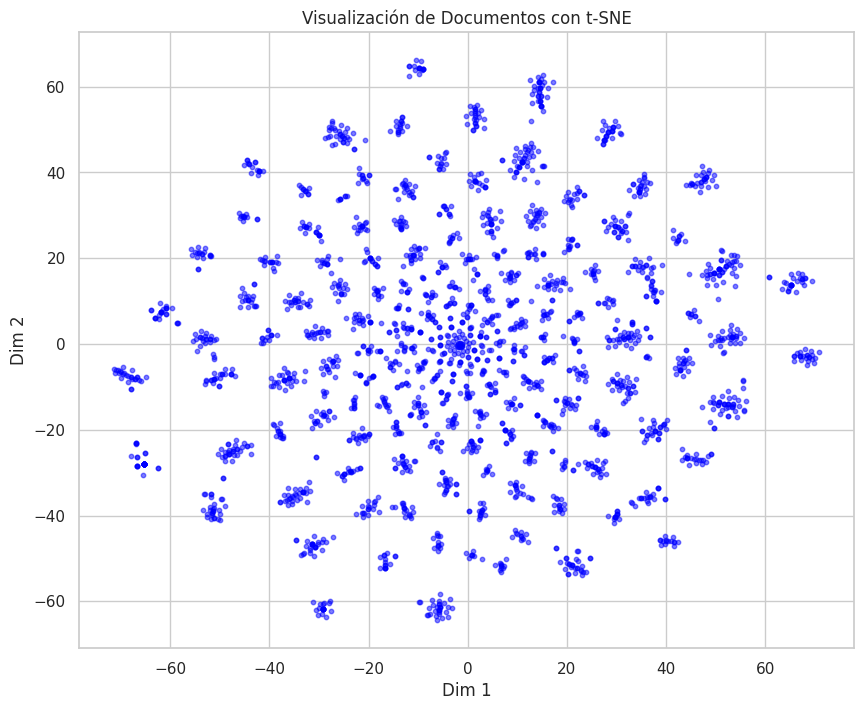

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Función para obtener la distribución de tópicos de un documento
def get_document_topics(hdp_model, corpus):
    document_topics = []
    for doc in corpus:
        # Calcular la probabilidad de cada tópico en el documento
        topic_distribution = hdp_model.inference([doc])[0]  # Solo tomar el primer valor de la tupla
        document_topics.append(topic_distribution)  # Guardamos la distribución del documento
    return document_topics

# Obtener la distribución de tópicos para cada documento
document_topics = get_document_topics(hdp_model, corpus)

# Convertir los resultados en un formato de matriz de probabilidad de tópicos
topic_matrix = np.array(document_topics)

# Reducción de dimensionalidad con t-SNE
tsne = TSNE(n_components=2, random_state=0)
reduced_embeddings = tsne.fit_transform(topic_matrix)

# Visualización de los documentos en el espacio reducido
plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], s=10, c='blue', alpha=0.5)
plt.title("Visualización de Documentos con t-SNE")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()


## HDP PARA AGUILA

In [ ]:

np.random.seed(2345)
# Tokenización
def preprocess(text):
    return simple_preprocess(text, deacc=True)  # 'deacc=True' elimina los acentos

# Aplicar tokenización
filtered_posts = new_post[new_post['account_name'].isin(['cervezaaguila'])]
filtered_posts['processed_content'] = filtered_posts['cleaned_content'].apply(preprocess)

# Crear el diccionario
dictionary = Dictionary(filtered_posts['processed_content'])
dictionary.filter_extremes(no_below=10, no_above=0.1)

# Crear la representación en bolsa de palabras
corpus = [dictionary.doc2bow(text) for text in filtered_posts['processed_content']]

# Crear lista de combinaciones de hiperparámetros a probar
hyperparameters = [
    {'alpha': 0.01, 'chunksize': 2000, 'passes': 10, 'iterations': 100},
    {'alpha': 0.1, 'chunksize': 1000, 'passes': 20, 'iterations': 200},
    {'alpha': 1, 'chunksize': 5000, 'passes': 30, 'iterations': 300},
    {'alpha': 0.1, 'chunksize': 2000, 'passes': 10, 'iterations': 200},
    {'alpha': 0.5, 'chunksize': 1000, 'passes': 20, 'iterations': 100}
]

# Número de tópicos a probar (especificar un rango de 1 a N)
topic_range = [5, 10, 15, 20, 25, 30]

# Evaluar todas las combinaciones de hiperparámetros y números de tópicos
best_coherence = -float('inf')
best_model = None
best_params = None
best_num_topics = None

for params in hyperparameters:
    for num_topics in topic_range:
        # Entrenar el modelo HDP con los parámetros actuales
        hdp_model = HdpModel(corpus=corpus, id2word=dictionary, chunksize=params['chunksize'], alpha=params['alpha'])

        # Calcular la coherencia del modelo HDP usando la métrica 'c_v'
        coherence_model = CoherenceModel(model=hdp_model, corpus=corpus, dictionary=dictionary, texts=filtered_posts['processed_content'].tolist(), coherence='c_v')
        coherence_score = coherence_model.get_coherence()

        print(f"Coherencia con alpha={params['alpha']}, chunksize={params['chunksize']}, passes={params['passes']}, iterations={params['iterations']}, num_topics={num_topics}: {coherence_score}")

        # Guardar el mejor modelo y parámetros si la coherencia es mayor
        if coherence_score > best_coherence:
            best_coherence = coherence_score
            best_model = hdp_model
            best_params = params
            best_num_topics = num_topics

# Imprimir los mejores parámetros, número de tópicos y la coherencia
print(f"\nMejores parámetros: {best_params}")
print(f"Mejor número de tópicos: {best_num_topics}")
print(f"Mejor coherencia: {best_coherence}")

# Guardar el mejor modelo
best_model.save("best_hdp_model.model")
print("Modelo HDP guardado.")

# Mostrar las palabras más representativas para cada tópico (hasta el número de tópicos que desees)
for topic_id, topic in best_model.show_topics(num_topics=best_num_topics, num_words=10, formatted=False):
    print(f"\nTópico {topic_id}:")
    words = [word[0] for word in topic]  # extraer solo las palabras
    print(", ".join(words))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Coherencia con alpha=0.01, chunksize=2000, passes=10, iterations=100, num_topics=5: 0.6237811702764672


Coherencia con alpha=0.01, chunksize=2000, passes=10, iterations=100, num_topics=10: 0.6227931263656189
Coherencia con alpha=0.01, chunksize=2000, passes=10, iterations=100, num_topics=15: 0.6296333110145635
Coherencia con alpha=0.01, chunksize=2000, passes=10, iterations=100, num_topics=20: 0.6344809012535135
Coherencia con alpha=0.01, chunksize=2000, passes=10, iterations=100, num_topics=25: 0.6228470127378032
Coherencia con alpha=0.01, chunksize=2000, passes=10, iterations=100, num_topics=30: 0.6298723459814775
Coherencia con alpha=0.1, chunksize=1000, passes=20, iterations=200, num_topics=5: 0.6298608465532152
Coherencia con alpha=0.1, chunksize=1000, passes=20, iterations=200, num_topics=10: 0.6306752367512463
Coherencia con alpha=0.1, chunksize=1000, passes=20, iterations=200, num_topics=15: 0.6246414334570238
Coherencia con alpha=0.1, chunksize=1000, passes=20, iterations=200, num_topics=20: 0.6243066902778901
Coherencia con alpha=0.1, chunksize=1000, passes=20, iterations=200, 

Coherencia con alpha=0.1, chunksize=2000, passes=10, iterations=200, num_topics=30: 0.6304534416583554
Coherencia con alpha=0.5, chunksize=1000, passes=20, iterations=100, num_topics=5: 0.6292408480042082
Coherencia con alpha=0.5, chunksize=1000, passes=20, iterations=100, num_topics=10: 0.6311087207864877
Coherencia con alpha=0.5, chunksize=1000, passes=20, iterations=100, num_topics=15: 0.6293915278927347
Coherencia con alpha=0.5, chunksize=1000, passes=20, iterations=100, num_topics=20: 0.6264323926856843
Coherencia con alpha=0.5, chunksize=1000, passes=20, iterations=100, num_topics=25: 0.622907424346185
Coherencia con alpha=0.5, chunksize=1000, passes=20, iterations=100, num_topics=30: 0.6354755269900242

Mejores parámetros: {'alpha': 0.1, 'chunksize': 2000, 'passes': 10, 'iterations': 200}
Mejor número de tópicos: 25
Mejor coherencia: 0.6355209505353103
Modelo HDP guardado.

Tópico 0:
unas, dobles, puntos, nueva, amigo, celebramos, pal, alfanumericos, hinchas, calor

Tópico 1:
ga

In [ ]:
import numpy as np

def calculate_topic_entropy(hdp_model, num_topics):
    # Obtener las distribuciones de palabras para cada tópico
    topic_word_dist = hdp_model.get_topics()

    # Lista para almacenar las entropías de cada tópico
    entropies = []

    # Calcular la entropía para cada tópico
    for topic_id in range(num_topics):
        # Obtener la distribución de palabras para el tópico
        topic_dist = topic_word_dist[topic_id]

        # Evitar log(0) sumando un pequeño valor (1e-10) en las probabilidades
        entropy = -np.sum(topic_dist * np.log(topic_dist + 1e-10))
        entropies.append(entropy)

    return entropies

# Calcular la entropía de los tópicos generados
topic_entropies = calculate_topic_entropy(best_model, best_num_topics)

# Imprimir la entropía de cada tópico
for idx, entropy in enumerate(topic_entropies):
    print(f"Entropía del Tópico {idx}: {entropy}")


Entropía del Tópico 0: 5.126541862316141
Entropía del Tópico 1: 5.156951212454876
Entropía del Tópico 2: 5.064852286733916
Entropía del Tópico 3: 5.1795903487721535
Entropía del Tópico 4: 5.092999644625138
Entropía del Tópico 5: 5.1351039960803195
Entropía del Tópico 6: 5.097661027048906
Entropía del Tópico 7: 5.117580165544659
Entropía del Tópico 8: 5.129604920119252
Entropía del Tópico 9: 5.144229138286913
Entropía del Tópico 10: 5.124895912673852
Entropía del Tópico 11: 5.130017787288926
Entropía del Tópico 12: 5.06510146318955
Entropía del Tópico 13: 5.175832254871414
Entropía del Tópico 14: 5.0850673441902785
Entropía del Tópico 15: 5.088600660275935
Entropía del Tópico 16: 5.156348430180091
Entropía del Tópico 17: 5.142526965727489
Entropía del Tópico 18: 5.0929500135039945
Entropía del Tópico 19: 5.1554927624627584
Entropía del Tópico 20: 5.170055654881337
Entropía del Tópico 21: 5.134512649912663
Entropía del Tópico 22: 5.123724501080151
Entropía del Tópico 23: 5.13886119640914

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Función para calcular la diversidad global de HDP de manera similar a BERTopic
def compute_normalized_diversity(model, num_topics=10, top_n_words=10):
    all_words = set()  # Usamos un conjunto para evitar duplicados
    total_words = 0

    for topic_id, topic in model.show_topics(num_topics=num_topics, num_words=top_n_words, formatted=False):
        # Extraer las palabras del tópico
        words = [word_prob[0] for word_prob in topic]
        all_words.update(words)  # Añadir las palabras al conjunto
        total_words += len(words)  # Contar el total de palabras

    # Calcular la diversidad normalizada (proporción de palabras únicas)
    diversity = len(all_words) / total_words if total_words > 0 else 0  # Evitar división por cero
    return diversity

# Calcular la diversidad normalizada
normalized_diversity = compute_normalized_diversity(best_model, num_topics=20, top_n_words=10)

print(f"Diversidad normalizada: {normalized_diversity:.4f}")


Diversidad normalizada: 0.7300


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## HDP PARA POKER

In [ ]:
np.random.seed(2345)
# Tokenización
def preprocess(text):
    return simple_preprocess(text, deacc=True)  # 'deacc=True' elimina los acentos

# Aplicar tokenización
filtered_posts = new_post[new_post['account_name'].isin(['CervezaPoker','cervezapoker'])]
filtered_posts['processed_content'] = filtered_posts['cleaned_content'].apply(preprocess)

# Crear el diccionario
dictionary = Dictionary(filtered_posts['processed_content'])
dictionary.filter_extremes(no_below=10, no_above=0.1)

# Crear la representación en bolsa de palabras
corpus = [dictionary.doc2bow(text) for text in filtered_posts['processed_content']]

# Crear lista de combinaciones de hiperparámetros a probar
hyperparameters = [
    {'alpha': 0.01, 'chunksize': 2000, 'passes': 10, 'iterations': 100},
    {'alpha': 0.1, 'chunksize': 1000, 'passes': 20, 'iterations': 200},
    {'alpha': 1, 'chunksize': 5000, 'passes': 30, 'iterations': 300},
    {'alpha': 0.1, 'chunksize': 2000, 'passes': 10, 'iterations': 200},
    {'alpha': 0.5, 'chunksize': 1000, 'passes': 20, 'iterations': 100}
]

# Número de tópicos a probar (especificar un rango de 1 a N)
topic_range = [5, 10, 15, 20, 25, 30]

# Evaluar todas las combinaciones de hiperparámetros y números de tópicos
best_coherence = -float('inf')
best_model = None
best_params = None
best_num_topics = None

for params in hyperparameters:
    for num_topics in topic_range:
        # Entrenar el modelo HDP con los parámetros actuales
        hdp_model = HdpModel(corpus=corpus, id2word=dictionary, chunksize=params['chunksize'], alpha=params['alpha'])

        # Calcular la coherencia del modelo HDP usando la métrica 'c_v'
        coherence_model = CoherenceModel(model=hdp_model, corpus=corpus, dictionary=dictionary, texts=filtered_posts['processed_content'].tolist(), coherence='c_v')
        coherence_score = coherence_model.get_coherence()

        print(f"Coherencia con alpha={params['alpha']}, chunksize={params['chunksize']}, passes={params['passes']}, iterations={params['iterations']}, num_topics={num_topics}: {coherence_score}")

        # Guardar el mejor modelo y parámetros si la coherencia es mayor
        if coherence_score > best_coherence:
            best_coherence = coherence_score
            best_model = hdp_model
            best_params = params
            best_num_topics = num_topics

# Imprimir los mejores parámetros, número de tópicos y la coherencia
print(f"\nMejores parámetros: {best_params}")
print(f"Mejor número de tópicos: {best_num_topics}")
print(f"Mejor coherencia: {best_coherence}")

# Guardar el mejor modelo
best_model.save("best_hdp_model.model")
print("Modelo HDP guardado.")

# Mostrar las palabras más representativas para cada tópico (hasta el número de tópicos que desees)
for topic_id, topic in best_model.show_topics(num_topics=best_num_topics, num_words=10, formatted=False):
    print(f"\nTópico {topic_id}:")
    words = [word[0] for word in topic]  # extraer solo las palabras
    print(", ".join(words))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Coherencia con alpha=0.01, chunksize=2000, passes=10, iterations=100, num_topics=5: 0.4715344093291114
Coherencia con alpha=0.01, chunksize=2000, passes=10, iterations=100, num_topics=10: 0.47820534762721545
Coherencia con alpha=0.01, chunksize=2000, passes=10, iterations=100, num_topics=15: 0.47819049981426653
Coherencia con alpha=0.01, chunksize=2000, passes=10, iterations=100, num_topics=20: 0.47630992447621273
Coherencia con alpha=0.01, chunksize=2000, passes=10, iterations=100, num_topics=25: 0.47864909997007715
Coherencia con alpha=0.01, chunksize=2000, passes=10, iterations=100, num_topics=30: 0.47098818381021684
Coherencia con alpha=0.1, chunksize=1000, passes=20, iterations=200, num_topics=5: 0.4713124333080297
Coherencia con alpha=0.1, chunksize=1000, passes=20, iterations=200, num_topics=10: 0.4702820181234201
Coherencia con alpha=0.1, chunksize=1000, passes=20, iterations=200, num_topics=15: 0.46898395704034157
Coherencia con alpha=0.1, chunksize=1000, passes=20, iterations

In [ ]:
import numpy as np

def calculate_topic_entropy(hdp_model, num_topics):
    # Obtener las distribuciones de palabras para cada tópico
    topic_word_dist = hdp_model.get_topics()

    # Lista para almacenar las entropías de cada tópico
    entropies = []

    # Calcular la entropía para cada tópico
    for topic_id in range(num_topics):
        # Obtener la distribución de palabras para el tópico
        topic_dist = topic_word_dist[topic_id]

        # Evitar log(0) sumando un pequeño valor (1e-10) en las probabilidades
        entropy = -np.sum(topic_dist * np.log(topic_dist + 1e-10))
        entropies.append(entropy)

    return entropies

# Calcular la entropía de los tópicos generados
topic_entropies = calculate_topic_entropy(best_model, best_num_topics)

# Imprimir la entropía de cada tópico
for idx, entropy in enumerate(topic_entropies):
    print(f"Entropía del Tópico {idx}: {entropy}")


Entropía del Tópico 0: 3.5170472235549455
Entropía del Tópico 1: 3.5912971535985294
Entropía del Tópico 2: 3.598099710898409
Entropía del Tópico 3: 3.5140690711693594
Entropía del Tópico 4: 3.5425523042640323
Entropía del Tópico 5: 3.5271494277800617
Entropía del Tópico 6: 3.554002222381892
Entropía del Tópico 7: 3.4796167085122947
Entropía del Tópico 8: 3.52871257175773
Entropía del Tópico 9: 3.5901608751238543
Entropía del Tópico 10: 3.5222438309397455
Entropía del Tópico 11: 3.5022822249207524
Entropía del Tópico 12: 3.592667664805772
Entropía del Tópico 13: 3.5682460087358843
Entropía del Tópico 14: 3.396545700483734
Entropía del Tópico 15: 3.489658805173132
Entropía del Tópico 16: 3.4836023172883985
Entropía del Tópico 17: 3.659896743217918
Entropía del Tópico 18: 3.5857665905723612
Entropía del Tópico 19: 3.5646630754958255
Entropía del Tópico 20: 3.4107485443082526
Entropía del Tópico 21: 3.6548983198949445
Entropía del Tópico 22: 3.5568999118855524
Entropía del Tópico 23: 3.383

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Función para calcular la diversidad global de HDP de manera similar a BERTopic
def compute_normalized_diversity(model, num_topics=10, top_n_words=10):
    all_words = set()  # Usamos un conjunto para evitar duplicados
    total_words = 0

    for topic_id, topic in model.show_topics(num_topics=num_topics, num_words=top_n_words, formatted=False):
        # Extraer las palabras del tópico
        words = [word_prob[0] for word_prob in topic]
        all_words.update(words)  # Añadir las palabras al conjunto
        total_words += len(words)  # Contar el total de palabras

    # Calcular la diversidad normalizada (proporción de palabras únicas)
    diversity = len(all_words) / total_words if total_words > 0 else 0  # Evitar división por cero
    return diversity

# Calcular la diversidad normalizada
normalized_diversity = compute_normalized_diversity(best_model, num_topics=20, top_n_words=10)

print(f"Diversidad normalizada: {normalized_diversity:.4f}")


Diversidad normalizada: 0.2550


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## HDP CLUB COLOMBIA

In [ ]:

np.random.seed(2345)
# Tokenización
def preprocess(text):
    return simple_preprocess(text, deacc=True)  # 'deacc=True' elimina los acentos

# Aplicar tokenización
filtered_posts = new_post[new_post['account_name'].isin(['clubcolombia','Club_Colombia'])]
filtered_posts['processed_content'] = filtered_posts['cleaned_content'].apply(preprocess)

# Crear el diccionario
dictionary = Dictionary(filtered_posts['processed_content'])
dictionary.filter_extremes(no_below=10, no_above=0.1)

# Crear la representación en bolsa de palabras
corpus = [dictionary.doc2bow(text) for text in filtered_posts['processed_content']]

# Crear lista de combinaciones de hiperparámetros a probar
hyperparameters = [
    {'alpha': 0.01, 'chunksize': 2000, 'passes': 10, 'iterations': 100},
    {'alpha': 0.1, 'chunksize': 1000, 'passes': 20, 'iterations': 200},
    {'alpha': 1, 'chunksize': 5000, 'passes': 30, 'iterations': 300},
    {'alpha': 0.1, 'chunksize': 2000, 'passes': 10, 'iterations': 200},
    {'alpha': 0.5, 'chunksize': 1000, 'passes': 20, 'iterations': 100}
]

# Número de tópicos a probar (especificar un rango de 1 a N)
topic_range = [5, 10, 15, 20, 25, 30]

# Evaluar todas las combinaciones de hiperparámetros y números de tópicos
best_coherence = -float('inf')
best_model = None
best_params = None
best_num_topics = None

for params in hyperparameters:
    for num_topics in topic_range:
        # Entrenar el modelo HDP con los parámetros actuales
        hdp_model = HdpModel(corpus=corpus, id2word=dictionary, chunksize=params['chunksize'], alpha=params['alpha'])

        # Calcular la coherencia del modelo HDP usando la métrica 'c_v'
        coherence_model = CoherenceModel(model=hdp_model, corpus=corpus, dictionary=dictionary, texts=filtered_posts['processed_content'].tolist(), coherence='c_v')
        coherence_score = coherence_model.get_coherence()

        print(f"Coherencia con alpha={params['alpha']}, chunksize={params['chunksize']}, passes={params['passes']}, iterations={params['iterations']}, num_topics={num_topics}: {coherence_score}")

        # Guardar el mejor modelo y parámetros si la coherencia es mayor
        if coherence_score > best_coherence:
            best_coherence = coherence_score
            best_model = hdp_model
            best_params = params
            best_num_topics = num_topics

# Imprimir los mejores parámetros, número de tópicos y la coherencia
print(f"\nMejores parámetros: {best_params}")
print(f"Mejor número de tópicos: {best_num_topics}")
print(f"Mejor coherencia: {best_coherence}")

# Guardar el mejor modelo
best_model.save("best_hdp_model.model")
print("Modelo HDP guardado.")

# Mostrar las palabras más representativas para cada tópico (hasta el número de tópicos que desees)
for topic_id, topic in best_model.show_topics(num_topics=best_num_topics, num_words=10, formatted=False):
    print(f"\nTópico {topic_id}:")
    words = [word[0] for word in topic]  # extraer solo las palabras
    print(", ".join(words))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Coherencia con alpha=0.01, chunksize=2000, passes=10, iterations=100, num_topics=5: 0.31180711649865056
Coherencia con alpha=0.01, chunksize=2000, passes=10, iterations=100, num_topics=10: 0.3118071164986505
Coherencia con alpha=0.01, chunksize=2000, passes=10, iterations=100, num_topics=15: 0.3118071164986505
Coherencia con alpha=0.01, chunksize=2000, passes=10, iterations=100, num_topics=20: 0.3118071164986505
Coherencia con alpha=0.01, chunksize=2000, passes=10, iterations=100, num_topics=25: 0.3118071164986505
Coherencia con alpha=0.01, chunksize=2000, passes=10, iterations=100, num_topics=30: 0.3118071164986505
Coherencia con alpha=0.1, chunksize=1000, passes=20, iterations=200, num_topics=5: 0.3118071164986505
Coherencia con alpha=0.1, chunksize=1000, passes=20, iterations=200, num_topics=10: 0.3118071164986505
Coherencia con alpha=0.1, chunksize=1000, passes=20, iterations=200, num_topics=15: 0.3118071164986505
Coherencia con alpha=0.1, chunksize=1000, passes=20, iterations=200,

In [ ]:
import numpy as np

def calculate_topic_entropy(hdp_model, num_topics):
    # Obtener las distribuciones de palabras para cada tópico
    topic_word_dist = hdp_model.get_topics()

    # Lista para almacenar las entropías de cada tópico
    entropies = []

    # Calcular la entropía para cada tópico
    for topic_id in range(num_topics):
        # Obtener la distribución de palabras para el tópico
        topic_dist = topic_word_dist[topic_id]

        # Evitar log(0) sumando un pequeño valor (1e-10) en las probabilidades
        entropy = -np.sum(topic_dist * np.log(topic_dist + 1e-10))
        entropies.append(entropy)

    return entropies

# Calcular la entropía de los tópicos generados
topic_entropies = calculate_topic_entropy(best_model, best_num_topics)

# Imprimir la entropía de cada tópico
for idx, entropy in enumerate(topic_entropies):
    print(f"Entropía del Tópico {idx}: {entropy}")


Entropía del Tópico 0: 2.3344195618389705
Entropía del Tópico 1: 2.048973551562883
Entropía del Tópico 2: 1.9054786210273447
Entropía del Tópico 3: 2.2057800908841503
Entropía del Tópico 4: 2.270926654777332


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Función para calcular la diversidad global de HDP de manera similar a BERTopic
def compute_normalized_diversity(model, num_topics=10, top_n_words=10):
    all_words = set()  # Usamos un conjunto para evitar duplicados
    total_words = 0

    for topic_id, topic in model.show_topics(num_topics=num_topics, num_words=top_n_words, formatted=False):
        # Extraer las palabras del tópico
        words = [word_prob[0] for word_prob in topic]
        all_words.update(words)  # Añadir las palabras al conjunto
        total_words += len(words)  # Contar el total de palabras

    # Calcular la diversidad normalizada (proporción de palabras únicas)
    diversity = len(all_words) / total_words if total_words > 0 else 0  # Evitar división por cero
    return diversity

# Calcular la diversidad normalizada
normalized_diversity = compute_normalized_diversity(best_model, num_topics=20, top_n_words=10)

print(f"Diversidad normalizada: {normalized_diversity:.4f}")


Diversidad normalizada: 0.0650


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## HDP PARA BAVARIA

In [ ]:

np.random.seed(2345)
# Tokenización
def preprocess(text):
    return simple_preprocess(text, deacc=True)  # 'deacc=True' elimina los acentos

# Aplicar tokenización
filtered_posts = new_post[new_post['account_name'].isin(['bavaria_colombia','BAVARIA_OFICIAL'])]
filtered_posts['processed_content'] = filtered_posts['cleaned_content'].apply(preprocess)

# Crear el diccionario
dictionary = Dictionary(filtered_posts['processed_content'])
dictionary.filter_extremes(no_below=10, no_above=0.1)

# Crear la representación en bolsa de palabras
corpus = [dictionary.doc2bow(text) for text in filtered_posts['processed_content']]

# Crear lista de combinaciones de hiperparámetros a probar
hyperparameters = [
    {'alpha': 0.01, 'chunksize': 2000, 'passes': 10, 'iterations': 100},
    {'alpha': 0.1, 'chunksize': 1000, 'passes': 20, 'iterations': 200},
    {'alpha': 1, 'chunksize': 5000, 'passes': 30, 'iterations': 300},
    {'alpha': 0.1, 'chunksize': 2000, 'passes': 10, 'iterations': 200},
    {'alpha': 0.5, 'chunksize': 1000, 'passes': 20, 'iterations': 100}
]

# Número de tópicos a probar (especificar un rango de 1 a N)
topic_range = [5, 10, 15, 20, 25, 30]

# Evaluar todas las combinaciones de hiperparámetros y números de tópicos
best_coherence = -float('inf')
best_model = None
best_params = None
best_num_topics = None

for params in hyperparameters:
    for num_topics in topic_range:
        # Entrenar el modelo HDP con los parámetros actuales
        hdp_model = HdpModel(corpus=corpus, id2word=dictionary, chunksize=params['chunksize'], alpha=params['alpha'])

        # Calcular la coherencia del modelo HDP usando la métrica 'c_v'
        coherence_model = CoherenceModel(model=hdp_model, corpus=corpus, dictionary=dictionary, texts=filtered_posts['processed_content'].tolist(), coherence='c_v')
        coherence_score = coherence_model.get_coherence()

        print(f"Coherencia con alpha={params['alpha']}, chunksize={params['chunksize']}, passes={params['passes']}, iterations={params['iterations']}, num_topics={num_topics}: {coherence_score}")

        # Guardar el mejor modelo y parámetros si la coherencia es mayor
        if coherence_score > best_coherence:
            best_coherence = coherence_score
            best_model = hdp_model
            best_params = params
            best_num_topics = num_topics

# Imprimir los mejores parámetros, número de tópicos y la coherencia
print(f"\nMejores parámetros: {best_params}")
print(f"Mejor número de tópicos: {best_num_topics}")
print(f"Mejor coherencia: {best_coherence}")

# Guardar el mejor modelo
best_model.save("best_hdp_model.model")
print("Modelo HDP guardado.")

# Mostrar las palabras más representativas para cada tópico (hasta el número de tópicos que desees)
for topic_id, topic in best_model.show_topics(num_topics=best_num_topics, num_words=10, formatted=False):
    print(f"\nTópico {topic_id}:")
    words = [word[0] for word in topic]  # extraer solo las palabras
    print(", ".join(words))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Coherencia con alpha=0.01, chunksize=2000, passes=10, iterations=100, num_topics=5: 0.6367111761489551
Coherencia con alpha=0.01, chunksize=2000, passes=10, iterations=100, num_topics=10: 0.636494623454763


Coherencia con alpha=0.01, chunksize=2000, passes=10, iterations=100, num_topics=15: 0.6297115060763394
Coherencia con alpha=0.01, chunksize=2000, passes=10, iterations=100, num_topics=20: 0.633831678455037
Coherencia con alpha=0.01, chunksize=2000, passes=10, iterations=100, num_topics=25: 0.6261163417725546
Coherencia con alpha=0.01, chunksize=2000, passes=10, iterations=100, num_topics=30: 0.6286152466441713
Coherencia con alpha=0.1, chunksize=1000, passes=20, iterations=200, num_topics=5: 0.6244522485530073
Coherencia con alpha=0.1, chunksize=1000, passes=20, iterations=200, num_topics=10: 0.6361782857034713
Coherencia con alpha=0.1, chunksize=1000, passes=20, iterations=200, num_topics=15: 0.6407311712434463
Coherencia con alpha=0.1, chunksize=1000, passes=20, iterations=200, num_topics=20: 0.6308215384299926
Coherencia con alpha=0.1, chunksize=1000, passes=20, iterations=200, num_topics=25: 0.6333856108643913
Coherencia con alpha=0.1, chunksize=1000, passes=20, iterations=200, nu

Coherencia con alpha=0.1, chunksize=2000, passes=10, iterations=200, num_topics=30: 0.6358078198268178


Coherencia con alpha=0.5, chunksize=1000, passes=20, iterations=100, num_topics=5: 0.6377969091504013


Coherencia con alpha=0.5, chunksize=1000, passes=20, iterations=100, num_topics=10: 0.63143506443026
Coherencia con alpha=0.5, chunksize=1000, passes=20, iterations=100, num_topics=15: 0.6320483461856854
Coherencia con alpha=0.5, chunksize=1000, passes=20, iterations=100, num_topics=20: 0.6309694296481123
Coherencia con alpha=0.5, chunksize=1000, passes=20, iterations=100, num_topics=25: 0.6301120301867325
Coherencia con alpha=0.5, chunksize=1000, passes=20, iterations=100, num_topics=30: 0.6339294164252545

Mejores parámetros: {'alpha': 1, 'chunksize': 5000, 'passes': 30, 'iterations': 300}
Mejor número de tópicos: 30
Mejor coherencia: 0.6417015692881399
Modelo HDP guardado.

Tópico 0:
equipo, alianza, inolvidables, orgullosos, recicladores, buscando, menos, canal, partido, sido

Tópico 1:
sabias, descubre, semana, celebramos, caribe, bogota, ahora, video, presentamos, magia

Tópico 2:
fria, estudiantes, bavariaco, canal, descubre, aplican, nuevo, brindamos, abrimos, marca

Tópico 3:


In [ ]:
import numpy as np

def calculate_topic_entropy(hdp_model, num_topics):
    # Obtener las distribuciones de palabras para cada tópico
    topic_word_dist = hdp_model.get_topics()

    # Lista para almacenar las entropías de cada tópico
    entropies = []

    # Calcular la entropía para cada tópico
    for topic_id in range(num_topics):
        # Obtener la distribución de palabras para el tópico
        topic_dist = topic_word_dist[topic_id]

        # Evitar log(0) sumando un pequeño valor (1e-10) en las probabilidades
        entropy = -np.sum(topic_dist * np.log(topic_dist + 1e-10))
        entropies.append(entropy)

    return entropies

# Calcular la entropía de los tópicos generados
topic_entropies = calculate_topic_entropy(best_model, best_num_topics)

# Imprimir la entropía de cada tópico
for idx, entropy in enumerate(topic_entropies):
    print(f"Entropía del Tópico {idx}: {entropy}")


Entropía del Tópico 0: 5.4334737132658715
Entropía del Tópico 1: 5.492158779971609
Entropía del Tópico 2: 5.43822889532475
Entropía del Tópico 3: 5.476836071802429
Entropía del Tópico 4: 5.494505842149514
Entropía del Tópico 5: 5.435103899847581
Entropía del Tópico 6: 5.449857135597089
Entropía del Tópico 7: 5.432145401045085
Entropía del Tópico 8: 5.442232977608047
Entropía del Tópico 9: 5.453150104183084
Entropía del Tópico 10: 5.485661438152513
Entropía del Tópico 11: 5.485157180923119
Entropía del Tópico 12: 5.454343865035705
Entropía del Tópico 13: 5.451330494673557
Entropía del Tópico 14: 5.428160062246551
Entropía del Tópico 15: 5.43351234652751
Entropía del Tópico 16: 5.507281663544976
Entropía del Tópico 17: 5.392866303753126
Entropía del Tópico 18: 5.434976439874571
Entropía del Tópico 19: 5.438056084282516
Entropía del Tópico 20: 5.419631949761654
Entropía del Tópico 21: 5.445860018292056
Entropía del Tópico 22: 5.501727428784671
Entropía del Tópico 23: 5.4727044788087245
En

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Función para calcular la diversidad global de HDP de manera similar a BERTopic
def compute_normalized_diversity(model, num_topics=10, top_n_words=10):
    all_words = set()  # Usamos un conjunto para evitar duplicados
    total_words = 0

    for topic_id, topic in model.show_topics(num_topics=num_topics, num_words=top_n_words, formatted=False):
        # Extraer las palabras del tópico
        words = [word_prob[0] for word_prob in topic]
        all_words.update(words)  # Añadir las palabras al conjunto
        total_words += len(words)  # Contar el total de palabras

    # Calcular la diversidad normalizada (proporción de palabras únicas)
    diversity = len(all_words) / total_words if total_words > 0 else 0  # Evitar división por cero
    return diversity

# Calcular la diversidad normalizada
normalized_diversity = compute_normalized_diversity(best_model, num_topics=20, top_n_words=10)

print(f"Diversidad normalizada: {normalized_diversity:.4f}")


Diversidad normalizada: 0.7800


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

